In [1]:
import multiprocessing as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc

In [2]:
basedir = './국토교통부_실거래가_토지/'
filenames = [f for f in os.listdir(basedir) if f.endswith('.csv')]
filenames

['토지(매매)__실거래가_20210111203755.csv',
 '토지(매매)__실거래가_20210111203839.csv',
 '토지(매매)__실거래가_20210111203931.csv',
 '토지(매매)__실거래가_20210111204029.csv',
 '토지(매매)__실거래가_20210111204114.csv',
 '토지(매매)__실거래가_20210111204202.csv',
 '토지(매매)__실거래가_20210111204250.csv',
 '토지(매매)__실거래가_20210111204328.csv',
 '토지(매매)__실거래가_20210111204423.csv',
 '토지(매매)__실거래가_20210111204513.csv',
 '토지(매매)__실거래가_20210111204605.csv',
 '토지(매매)__실거래가_20210111204654.csv',
 '토지(매매)__실거래가_20210111204802.csv',
 '토지(매매)__실거래가_20210111204844.csv',
 '토지(매매)__실거래가_20210111204925.csv']

In [3]:
f = open(basedir + filenames[0], 'r')

In [4]:
f.readline()

'"□ 본 서비스에서 제공하는 정보는 법적인 효력이 없으므로 참고용으로만 활용하시기 바랍니다."\n'

In [5]:
f.readline()

'"□ 신고정보가 실시간 변경, 해제되어 제공시점에 따라 공개건수 및 내용이 상이할 수 있는 점 참고하시기 바랍니다."\n'

In [6]:
f.readline()

'"□ 본 자료는 계약일 기준입니다. (※ 7월 계약, 8월 신고건 → 7월 거래건으로  제공)"\n'

In [7]:
f.readline()

'"□ 통계자료 활용시에는 수치가 왜곡될 수 있으니 참고자료로만 활용하시기  바라며,  외부 공개시에는 반드시 신고일 기준으로 집계되는 공식통계를 이용하여 주시기 바랍니다."\n'

In [8]:
f.readline()

'""\n'

In [9]:
f.readline()

'"* 국토교통부 실거래가 공개시스템의 궁금하신 점이나 문의사항은 콜센터 1588-0149로 연락 주시기 바랍니다."\n'

In [10]:
f.readline()

'"□ 검색조건"\n'

In [11]:
f.readline()

'"계약일자 : 20060101 ~ 20061231"\n'

In [12]:
f.readline()

'"실거래구분 : 토지(매매)"\n'

In [13]:
f.readline()

'"주소구분 : 지번주소"\n'

In [14]:
f.readline()

'"시도 : 서울특별시"\n'

In [15]:
f.readline()

'"시군구 : 전체"\n'

In [16]:
f.readline()

'"읍면동 : 전체"\n'

In [17]:
f.readline()

'"면적 : 전체"\n'

In [18]:
f.readline()

'"시군구","번지","지목","용도지역","도로조건","계약년월","계약일","계약면적(㎡)","거래금액(만원)","지분구분"\n'

In [19]:
f.readline()

'"서울특별시 구로구 오류동","2*","대","제2종일반주거지역","8m미만","200601","1","23.14","1,890"," "\n'

In [20]:
f.close()

In [22]:
chunks = pd.read_csv(basedir + filenames[0], chunksize=1, encoding='euc-kr', header=14)
prac_df = next(chunks)
prac_df

,시군구,번지,지목,용도지역,도로조건,계약년월,계약일,계약면적(㎡),거래금액(만원),지분구분
0,서울특별시 구로구 오류동,2*,대,제2종일반주거지역,8m미만,200601,1,23.14,"1,890",


In [24]:
for file in filenames:
    chunks = pd.read_csv(basedir + file, encoding='euc-kr', chunksize=1, header=14)
    df = next(chunks)
    print(prac_df.columns == df.columns)

[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]


In [25]:
dfs_list = []
for file in tqdm(filenames):
    df = pd.read_csv(basedir + file, encoding='euc-kr', header=14)
    dfs_list.append(df)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 96.13it/s]


In [26]:
concat_df = pd.concat(dfs_list).reset_index(drop=True)
print(concat_df.shape)
concat_df.head()

(110710, 10)


,시군구,번지,지목,용도지역,도로조건,계약년월,계약일,계약면적(㎡),거래금액(만원),지분구분
0,서울특별시 구로구 오류동,2*,대,제2종일반주거지역,8m미만,200601,1,23.14,"1,890",
1,서울특별시 관악구 신림동,산9*,임야,제3종일반주거지역,25m미만,200601,2,26.00,"1,432",지분
2,서울특별시 강남구 역삼동,7**,대,제3종일반주거지역,8m미만,200601,2,393.30,"267,750",
3,서울특별시 서초구 신원동,3**,전,개발제한구역,8m미만,200601,2,684.00,"53,820",
4,서울특별시 관악구 신림동,산1**,임야,제3종일반주거지역,25m미만,200601,3,24.00,"1,325",지분


In [27]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110710 entries, 0 to 110709
Data columns (total 10 columns):
시군구         110710 non-null object
번지          110710 non-null object
지목          110710 non-null object
용도지역        110685 non-null object
도로조건        110710 non-null object
계약년월        110710 non-null int64
계약일         110710 non-null int64
계약면적(㎡)     110710 non-null float64
거래금액(만원)    110710 non-null object
지분구분        110710 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 8.4+ MB


In [28]:
concat_df['계약년도'] = concat_df['계약년월'].apply(lambda x: int(str(x)[:4]))
concat_df['계약년도'].value_counts()

2007    13552
2006    11871
2008    11698
2009     8193
2017     7274
2011     6761
2015     6725
2020     6674
2010     6486
2018     6306
2019     6094
2016     5840
2014     4896
2012     4509
2013     3831
Name: 계약년도, dtype: int64

In [29]:
concat_df['용도지역'].value_counts()

제2종일반주거지역    49809
제3종일반주거지역    21074
제1종일반주거지역     9816
일반상업지역        9400
개발제한구역        7284
준주거지역         5082
자연녹지지역        2955
준공업지역         2939
제1종전용주거지역     1472
근린상업지역         353
중심상업지역         134
일반주거지역         105
제2종전용주거지역       89
용도미지정           39
유통상업지역          39
기타              34
전용주거지역          23
관리지역            21
생산녹지지역           9
계획관리지역           4
보전녹지지역           2
생산관리지역           1
일반공업지역           1
Name: 용도지역, dtype: int64

In [30]:
concat_df['도로조건'].value_counts()

8m미만     48550
-        32086
12m미만    10878
25m이상     9864
25m미만     9332
Name: 도로조건, dtype: int64

In [31]:
concat_df['지분구분'].value_counts()

      77252
지분    33458
Name: 지분구분, dtype: int64

In [32]:
concat_df['계약면적(㎡)'].describe()

count    110710.000000
mean        192.318469
std        2375.719652
min           1.000000
25%          10.000000
50%          33.000000
75%          99.000000
max      514867.000000
Name: 계약면적(㎡), dtype: float64

In [35]:
concat_df['구'] = concat_df['시군구'].apply(lambda x: x.split(' ')[1])
concat_df['동'] = concat_df['시군구'].apply(lambda x: x.split(' ')[2])

In [38]:
concat_df.drop(columns=['번지'], inplace=True)

In [39]:
concat_df.head()

,시군구,지목,용도지역,도로조건,계약년월,계약일,계약면적(㎡),거래금액(만원),지분구분,계약년도,구,동
0,서울특별시 구로구 오류동,대,제2종일반주거지역,8m미만,200601,1,23.14,"1,890",,2006,구로구,오류동
1,서울특별시 관악구 신림동,임야,제3종일반주거지역,25m미만,200601,2,26.00,"1,432",지분,2006,관악구,신림동
2,서울특별시 강남구 역삼동,대,제3종일반주거지역,8m미만,200601,2,393.30,"267,750",,2006,강남구,역삼동
3,서울특별시 서초구 신원동,전,개발제한구역,8m미만,200601,2,684.00,"53,820",,2006,서초구,신원동
4,서울특별시 관악구 신림동,임야,제3종일반주거지역,25m미만,200601,3,24.00,"1,325",지분,2006,관악구,신림동


In [41]:
concat_df['계약월'] = concat_df['계약년월'].apply(lambda x: int(str(x)[-2:]))
concat_df.drop(columns=['계약년월'], inplace=True)

In [42]:
concat_df.drop(columns=['시군구'], inplace=True)
concat_df.head()

,지목,용도지역,도로조건,계약일,계약면적(㎡),거래금액(만원),지분구분,계약년도,구,동,계약월
0,대,제2종일반주거지역,8m미만,1,23.14,"1,890",,2006,구로구,오류동,1
1,임야,제3종일반주거지역,25m미만,2,26.00,"1,432",지분,2006,관악구,신림동,1
2,대,제3종일반주거지역,8m미만,2,393.30,"267,750",,2006,강남구,역삼동,1
3,전,개발제한구역,8m미만,2,684.00,"53,820",,2006,서초구,신원동,1
4,임야,제3종일반주거지역,25m미만,3,24.00,"1,325",지분,2006,관악구,신림동,1


In [50]:
def accumulated_days(x):
    # x is a month in number
    
    month_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    
    accum = 0
    for i in range(0,x-1):
        accum += month_days[i]
        
    return accum

In [51]:
def time_linear(df):
    df = df.copy()
    
    df['time_linear'] = (df['계약년도'] - 2006) + (df['계약월'].apply(accumulated_days) + (df['계약일'] - 1))/365    
    
    return df

In [55]:
concat_df = time_linear(concat_df)
concat_df.head()

,지목,용도지역,도로조건,계약일,계약면적(㎡),거래금액(만원),지분구분,계약년도,구,동,계약월,time_linear
0,대,제2종일반주거지역,8m미만,1,23.14,"1,890",,2006,구로구,오류동,1,0.000000
1,임야,제3종일반주거지역,25m미만,2,26.00,"1,432",지분,2006,관악구,신림동,1,0.002740
2,대,제3종일반주거지역,8m미만,2,393.30,"267,750",,2006,강남구,역삼동,1,0.002740
3,전,개발제한구역,8m미만,2,684.00,"53,820",,2006,서초구,신원동,1,0.002740
4,임야,제3종일반주거지역,25m미만,3,24.00,"1,325",지분,2006,관악구,신림동,1,0.005479


In [56]:
concat_df['동'].value_counts()

미아동       2940
상도동       2694
신길동       2627
아현동       2621
신림동       2242
신당동       1827
사당동       1775
북아현동      1640
봉천동       1514
홍은동       1514
수유동       1385
흑석동       1379
하월곡동      1370
전농동       1364
응암동       1347
용두동       1313
도봉동       1304
장위동       1252
불광동       1231
정릉동       1212
길음동       1174
상계동       1105
남가좌동       983
홍제동        963
옥수동        962
구로동        958
방배동        925
화곡동        920
성수동1가      882
답십리동       864
북가좌동       834
천호동        821
하왕십리동      809
내곡동        803
평창동        791
종암동        788
면목동        781
서초동        745
금호동2가      708
성북동        656
궁동         633
행당동        631
오류동        624
한남동        623
암사동        623
노량진동       620
신정동        587
시흥동        586
수색동        583
제기동        578
석관동        557
월계동        551
방화동        543
고척동        543
신영동        541
공덕동        538
녹번동        529
중곡동        527
휘경동        526
현저동        507
우이동        491
신대방동       484
돈암동        479
본동         475
세곡동        473
개봉동        469
황학동       

In [57]:
def month_cos(x):
    # x is a month in number
    
    return np.cos(((x-1)/12)*2*np.pi)

def month_sin(x):
    # x is a month in number
    
    return np.sin(((x-1)/12)*2*np.pi)

In [58]:
concat_df['month_cos'] = concat_df['계약월'].apply(month_cos)
concat_df['month_sin'] = concat_df['계약월'].apply(month_sin)

In [59]:
concat_df.drop(columns=['계약일', '계약년도', '계약월'], inplace=True)

In [60]:
concat_df.head()

,지목,용도지역,도로조건,계약면적(㎡),거래금액(만원),지분구분,구,동,time_linear,month_cos,month_sin
0,대,제2종일반주거지역,8m미만,23.14,"1,890",,구로구,오류동,0.000000,1.0,0.0
1,임야,제3종일반주거지역,25m미만,26.00,"1,432",지분,관악구,신림동,0.002740,1.0,0.0
2,대,제3종일반주거지역,8m미만,393.30,"267,750",,강남구,역삼동,0.002740,1.0,0.0
3,전,개발제한구역,8m미만,684.00,"53,820",,서초구,신원동,0.002740,1.0,0.0
4,임야,제3종일반주거지역,25m미만,24.00,"1,325",지분,관악구,신림동,0.005479,1.0,0.0


In [163]:
def get_dong(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        for i in range(1,10):
            splitted = x.split('{}'.format(i))
            if len(splitted) > 1:
                return splitted[0]
        return x

In [164]:
concat_df['동2'] = concat_df['동'].apply(get_dong)
concat_df['동2'].unique()

array(['오류동', '신림동', '역삼동', '신원동', '응암동', '세곡동', '내곡동', '봉천동', '삼성동',
       '미아동', '용두동', '상도동', '종암동', '천호동', '홍은동', '도곡동', '문정동', '숭인동',
       '홍제동', '하월곡동', '동자동', '황학동', '논현동', '군자동', '가락동', '월계동', '신길동',
       '암사동', '전농동', '신천동', '구산동', '구로동', '산림동', '성수동', '신공덕동', '영등포동',
       '길음동', '을지로', '구의동', '정릉동', '한강로', '독산동', '효창동', '자양동', '아현동',
       '잠실동', '방화동', '행촌동', '현저동', '역촌동', '북가좌동', '휘경동', '대치동', '개봉동',
       '화곡동', '갈현동', '쌍문동', '장안동', '개포동', '율현동', '보문동', '상계동', '불광동',
       '길동', '사직동', '궁동', '신월동', '고척동', '오곡동', '대조동', '신수동', '제기동', '반포동',
       '평창동', '시흥동', '서초동', '사당동', '북아현동', '수유동', '방배동', '가양동', '개화동',
       '상봉동', '마천동', '보광동', '대방동', '청담동', '신당동', '삼선동', '창동', '신정동',
       '명일동', '하왕십리동', '석관동', '한남동', '항동', '오쇠동', '계동', '만리동', '합정동',
       '쌍림동', '주교동', '망우동', '석촌동', '송파동', '문배동', '광장동', '양재동', '필동',
       '공항동', '청량리동', '이촌동', '수색동', '흥인동', '대흥동', '천왕동', '도봉동', '공덕동',
       '무악동', '연희동', '면목동', '금호동', '동작동', '남가좌동', '상일동', '혜화동', '신사동',
       '갈월

In [167]:
concat_df = concat_df.drop(columns=['동'])

In [168]:
concat_df = concat_df.drop(columns=['동_mapped'])

In [165]:
cat_cols = ['지목', '용도지역', '도로조건', '지분구분', '구', '동', '동2']
for col in cat_cols:
    col_map_df = pd.DataFrame({'category':concat_df[col].unique(), 'map':[i for i in range(len(concat_df[col].unique()))]})
    col_map_df.to_csv(basedir + '{}_map.csv'.format(col), index=False)
    col_map = {}
    for i in range(col_map_df.shape[0]):
        col_map[col_map_df['category'][i]] = col_map_df['map'][i]
    concat_df[col+'_mapped'] = concat_df[col].map(col_map)

In [166]:
concat_df.head()

,지목,용도지역,도로조건,계약면적(㎡),거래금액(만원),지분구분,구,동,time_linear,month_cos,month_sin,지목_mapped,용도지역_mapped,도로조건_mapped,지분구분_mapped,구_mapped,동_mapped,면적당가격,동2,동2_mapped
0,대,제2종일반주거지역,8m미만,23.14,1890.0,,구로구,오류동,0.000000,1.0,0.0,0,0,0,0,0,0,81.676750,오류동,0
1,임야,제3종일반주거지역,25m미만,26.00,1432.0,지분,관악구,신림동,0.002740,1.0,0.0,1,1,1,1,1,1,55.076923,신림동,1
2,대,제3종일반주거지역,8m미만,393.30,267750.0,,강남구,역삼동,0.002740,1.0,0.0,0,1,0,0,2,2,680.778032,역삼동,2
3,전,개발제한구역,8m미만,684.00,53820.0,,서초구,신원동,0.002740,1.0,0.0,2,2,0,0,3,3,78.684211,신원동,3
4,임야,제3종일반주거지역,25m미만,24.00,1325.0,지분,관악구,신림동,0.005479,1.0,0.0,1,1,1,1,1,1,55.208333,신림동,1


In [72]:
concat_df['거래금액(만원)'] = concat_df['거래금액(만원)'].apply(lambda x: float(x.replace(',', '')))

In [88]:
concat_df.head()

,지목,용도지역,도로조건,계약면적(㎡),거래금액(만원),지분구분,구,동,time_linear,month_cos,month_sin,지목_mapped,용도지역_mapped,도로조건_mapped,지분구분_mapped,구_mapped,동_mapped
0,대,제2종일반주거지역,8m미만,23.14,1890.0,,구로구,오류동,0.000000,1.0,0.0,0,0,0,0,0,0
1,임야,제3종일반주거지역,25m미만,26.00,1432.0,지분,관악구,신림동,0.002740,1.0,0.0,1,1,1,1,1,1
2,대,제3종일반주거지역,8m미만,393.30,267750.0,,강남구,역삼동,0.002740,1.0,0.0,0,1,0,0,2,2
3,전,개발제한구역,8m미만,684.00,53820.0,,서초구,신원동,0.002740,1.0,0.0,2,2,0,0,3,3
4,임야,제3종일반주거지역,25m미만,24.00,1325.0,지분,관악구,신림동,0.005479,1.0,0.0,1,1,1,1,1,1


In [92]:
concat_df['면적당가격'] = concat_df['거래금액(만원)'] / concat_df['계약면적(㎡)']

In [93]:
concat_df['면적당가격'].describe()

count    110710.000000
mean        466.693366
std         738.341759
min           0.011494
25%         133.065808
50%         282.954093
75%         493.820593
max       40909.090909
Name: 면적당가격, dtype: float64

<AxesSubplot:>

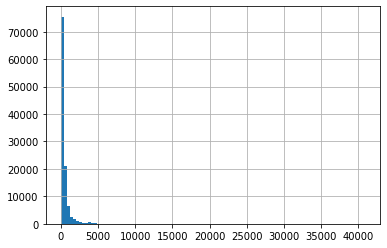

In [95]:
concat_df['면적당가격'].hist(bins=100)

<AxesSubplot:>

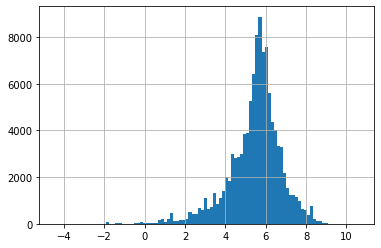

In [96]:
concat_df['면적당가격'].apply(np.log).hist(bins=100)

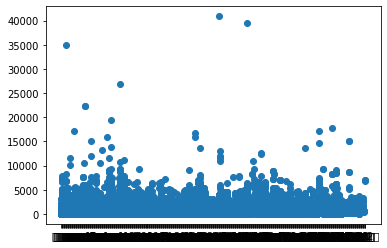

In [99]:
plt.scatter(concat_df['동'], concat_df['면적당가격'])

오류동
(624, 18)


count     624.000000
mean      399.631409
std       387.887064
min         2.322673
25%       179.644266
50%       286.405530
75%       468.769936
max      3058.103976
Name: 면적당가격, dtype: float64

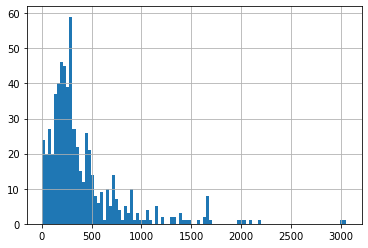

신림동
(2242, 18)


count    2242.000000
mean      211.813170
std       270.894668
min         0.037345
25%        50.847458
50%        90.252151
75%       306.556150
max      4847.176471
Name: 면적당가격, dtype: float64

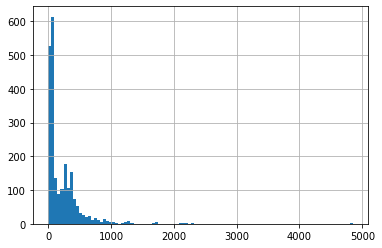

역삼동
(441, 18)


count     441.000000
mean     1185.048095
std      1225.460151
min        12.610340
25%       333.622184
50%       722.558140
75%      1603.435934
max      7889.546351
Name: 면적당가격, dtype: float64

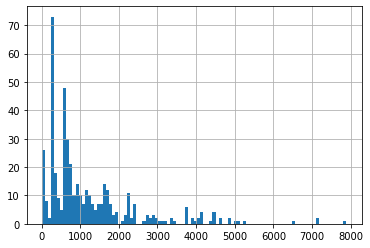

신원동
(180, 18)


count    180.000000
mean     122.923048
std      135.060169
min        3.361739
25%       42.239103
50%       73.402701
75%      115.416667
max      655.492958
Name: 면적당가격, dtype: float64

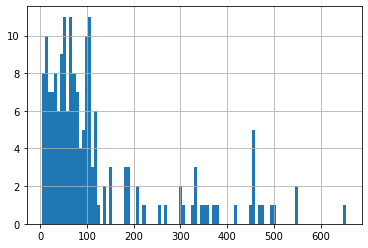

응암동
(1347, 18)


count    1347.000000
mean      336.380574
std       311.225596
min         1.262077
25%       177.758838
50%       240.915842
75%       387.315265
max      3333.333333
Name: 면적당가격, dtype: float64

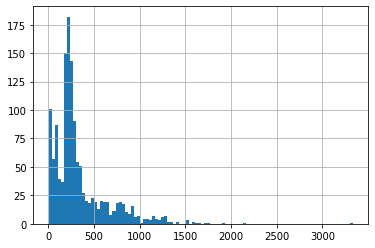

세곡동
(473, 18)


count     473.000000
mean      141.881382
std       182.125495
min         5.050505
25%        46.884642
50%        64.516129
75%       121.136767
max      1122.270225
Name: 면적당가격, dtype: float64

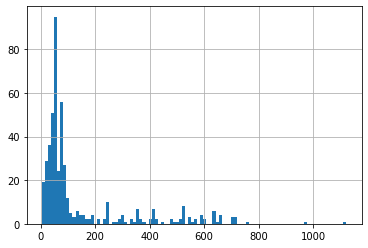

내곡동
(803, 18)


count    803.000000
mean      98.876407
std       95.226074
min        3.777796
25%       30.317613
50%       55.945504
75%      143.000000
max      640.000000
Name: 면적당가격, dtype: float64

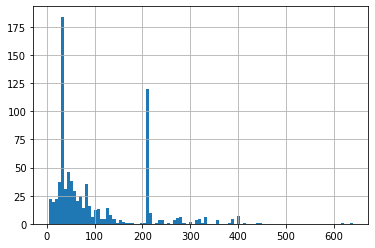

봉천동
(1514, 18)


count    1514.000000
mean      323.416324
std       296.586670
min         0.943396
25%       165.403112
50%       227.483370
75%       358.281250
max      2329.931973
Name: 면적당가격, dtype: float64

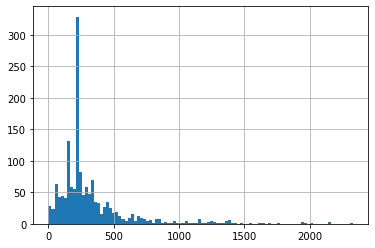

삼성동
(179, 18)


count      179.000000
mean      1818.805432
std       2899.103298
min          0.993838
25%        611.433720
50%       1136.363636
75%       2043.010654
max      35029.331046
Name: 면적당가격, dtype: float64

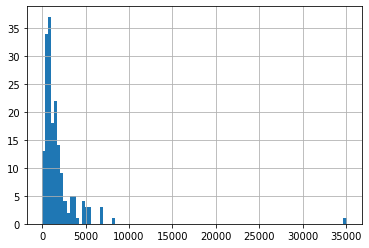

미아동
(2940, 18)


count    2940.000000
mean      242.654247
std       236.130073
min         0.988142
25%       124.598611
50%       180.000000
75%       285.714286
max      5000.000000
Name: 면적당가격, dtype: float64

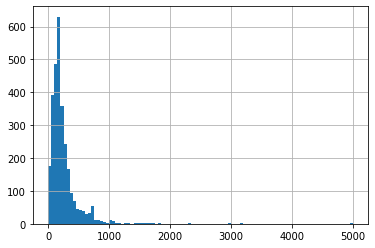

용두동
(1313, 18)


count    1313.000000
mean      396.622469
std       306.711154
min         1.204819
25%       257.493188
50%       302.558398
75%       434.000000
max      4103.915663
Name: 면적당가격, dtype: float64

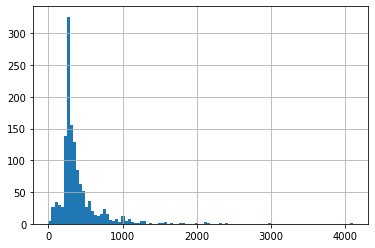

상도동
(2694, 18)


count    2694.000000
mean      335.659304
std       320.411515
min         3.597122
25%       169.514167
50%       228.512508
75%       452.445874
max      5358.620690
Name: 면적당가격, dtype: float64

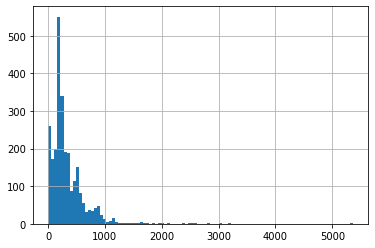

종암동
(788, 18)


count     788.000000
mean      248.079855
std       163.160804
min        10.000000
25%       149.162815
50%       222.500000
75%       332.493703
max      1833.333333
Name: 면적당가격, dtype: float64

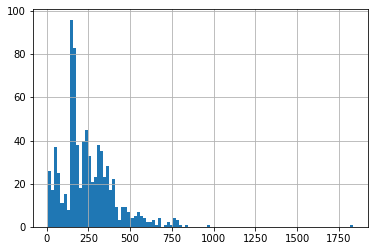

천호동
(821, 18)


count      821.000000
mean       458.270054
std        669.971509
min          0.134953
25%        120.000000
50%        320.500000
75%        571.548863
max      11515.750000
Name: 면적당가격, dtype: float64

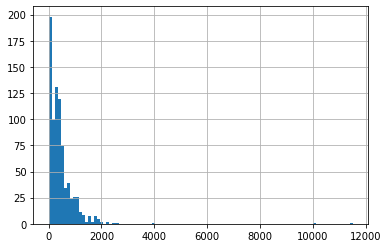

홍은동
(1514, 18)


count    1514.000000
mean      212.886170
std       143.068858
min         0.657462
25%       101.032048
50%       195.000000
75%       277.348214
max      2540.000000
Name: 면적당가격, dtype: float64

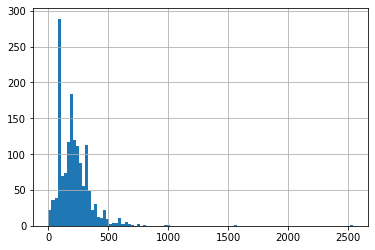

도곡동
(115, 18)


count     115.000000
mean      691.771893
std       673.937268
min         3.406923
25%       226.969697
50%       598.484848
75%       945.301209
max      3996.978226
Name: 면적당가격, dtype: float64

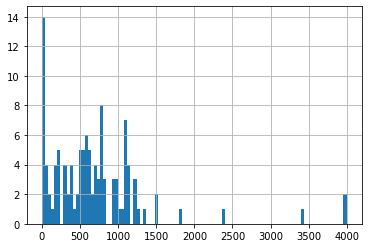

문정동
(32, 18)


count      32.000000
mean      580.504475
std       600.295787
min        15.060000
25%       149.235072
50%       466.889821
75%       663.030981
max      2297.468354
Name: 면적당가격, dtype: float64

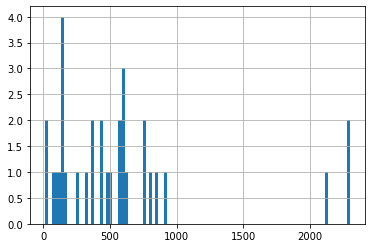

숭인동
(323, 18)


count     323.000000
mean      445.574373
std       428.584653
min        22.222222
25%       171.878788
50%       285.714286
75%       601.724138
max      3097.865169
Name: 면적당가격, dtype: float64

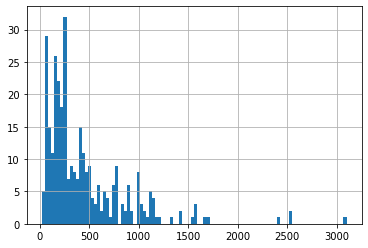

홍제동
(963, 18)


count     963.000000
mean      300.103730
std       257.017727
min         0.107527
25%       184.818627
50%       268.750000
75%       335.611111
max      3535.320869
Name: 면적당가격, dtype: float64

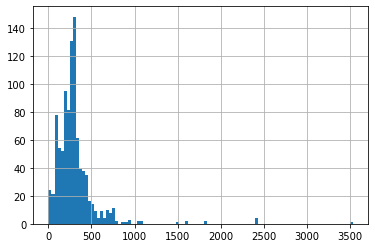

하월곡동
(1370, 18)


count     1370.000000
mean       297.695595
std        577.522520
min          2.000000
25%         83.445766
50%        129.163235
75%        374.307945
max      17078.000000
Name: 면적당가격, dtype: float64

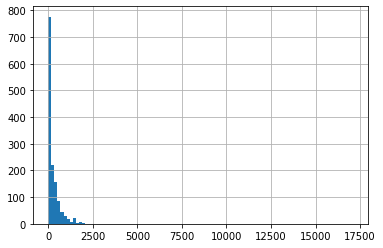

동자동
(303, 18)


count     303.000000
mean     1389.944487
std       674.796141
min       205.000000
25%       884.751412
50%      1312.411576
75%      1705.027147
max      3797.247899
Name: 면적당가격, dtype: float64

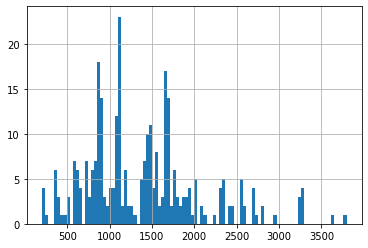

황학동
(469, 18)


count     469.000000
mean      804.428944
std       899.147681
min        58.333333
25%       303.030303
50%       475.000000
75%       860.215054
max      5664.556962
Name: 면적당가격, dtype: float64

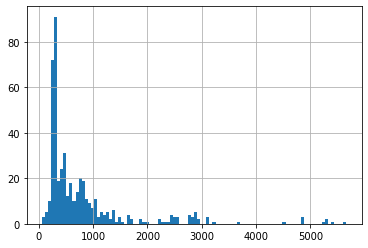

논현동
(209, 18)


count     209.000000
mean     1093.739142
std      1003.631723
min        57.121097
25%       443.969466
50%       776.053215
75%      1427.551749
max      5455.785406
Name: 면적당가격, dtype: float64

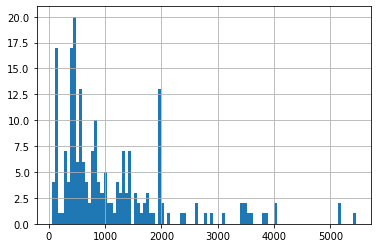

군자동
(80, 18)


count      80.000000
mean      412.605609
std       336.633081
min        33.333333
25%       194.548495
50%       302.532905
75%       534.735351
max      1433.806072
Name: 면적당가격, dtype: float64

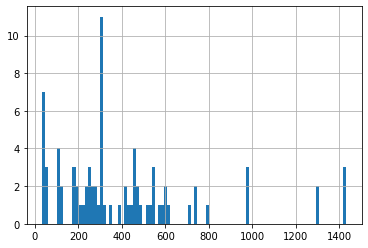

가락동
(130, 18)


count     130.000000
mean      819.487351
std       533.165586
min        18.172691
25%       669.512512
50%       723.869926
75%       811.274943
max      3862.284859
Name: 면적당가격, dtype: float64

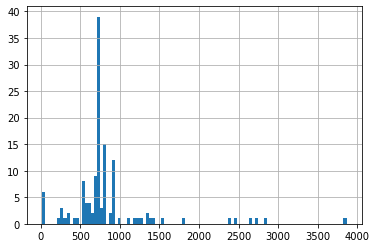

월계동
(551, 18)


count     551.000000
mean      197.020664
std       170.396211
min         0.245241
25%        48.275862
50%       187.969925
75%       275.000000
max      1215.658658
Name: 면적당가격, dtype: float64

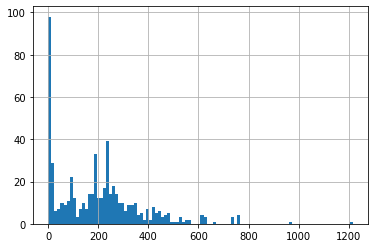

신길동
(2627, 18)


count    2627.000000
mean      385.727380
std       275.686359
min         5.000000
25%       270.000000
50%       352.941176
75%       412.000000
max      3649.052269
Name: 면적당가격, dtype: float64

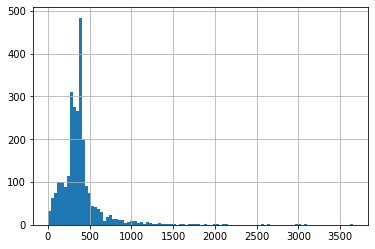

암사동
(623, 18)


count     623.000000
mean      289.926929
std       291.000759
min         5.208333
25%        60.462827
50%       142.424242
75%       590.852263
max      1598.173516
Name: 면적당가격, dtype: float64

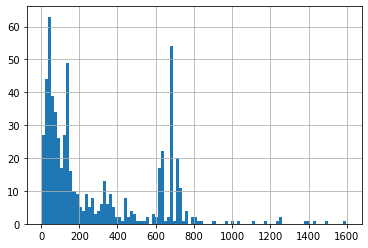

전농동
(1364, 18)


count    1364.000000
mean      369.503028
std       362.360667
min         2.840909
25%       202.000000
50%       280.325000
75%       412.187500
max      4311.416421
Name: 면적당가격, dtype: float64

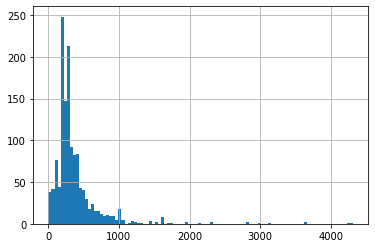

신천동
(35, 18)


count      35.000000
mean     2735.542534
std      1550.804638
min       286.915888
25%       812.154651
50%      3583.061889
75%      4019.979035
max      4415.243101
Name: 면적당가격, dtype: float64

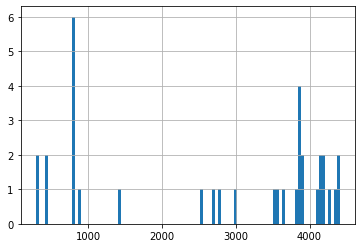

구산동
(257, 18)


count    257.000000
mean     129.166319
std      139.285835
min        1.200480
25%       20.873786
50%       20.909091
75%      239.000000
max      575.079872
Name: 면적당가격, dtype: float64

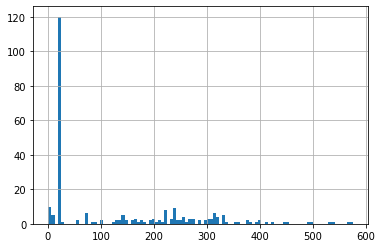

구로동
(958, 18)


count     958.000000
mean      333.325951
std       250.748779
min         0.454545
25%       160.384615
50%       288.349498
75%       423.044534
max      2608.695652
Name: 면적당가격, dtype: float64

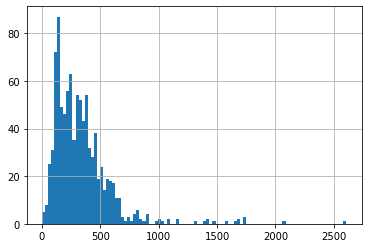

산림동
(144, 18)


count     144.000000
mean     1748.749053
std       855.981089
min       146.153846
25%      1072.843823
50%      1849.205450
75%      2260.887097
max      5504.587156
Name: 면적당가격, dtype: float64

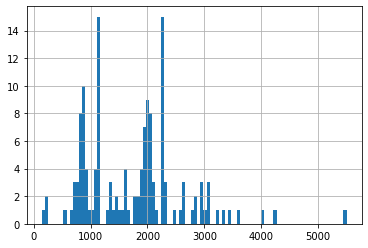

성수동1가
(882, 18)


count     882.000000
mean      867.271483
std       882.478641
min        18.333333
25%       346.824687
50%       810.285714
75%       948.149494
max      7700.047619
Name: 면적당가격, dtype: float64

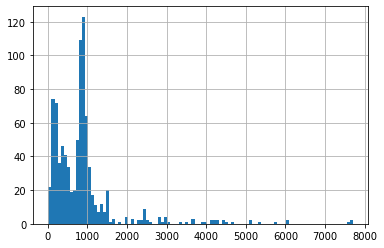

신공덕동
(451, 18)


count      451.000000
mean       804.037031
std        867.624844
min          3.029141
25%        337.500000
50%        560.000000
75%        989.352294
max      10500.000000
Name: 면적당가격, dtype: float64

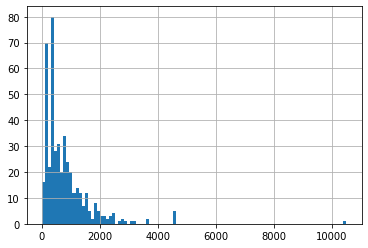

영등포동7가
(438, 18)


count     438.000000
mean      474.382103
std       219.627994
min        69.879518
25%       385.000000
50%       413.000000
75%       538.461538
max      2371.193979
Name: 면적당가격, dtype: float64

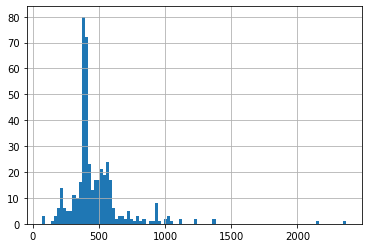

길음동
(1174, 18)


count     1174.000000
mean       415.922425
std        996.031553
min         27.000000
25%        190.000000
50%        260.000000
75%        428.557359
max      22257.575758
Name: 면적당가격, dtype: float64

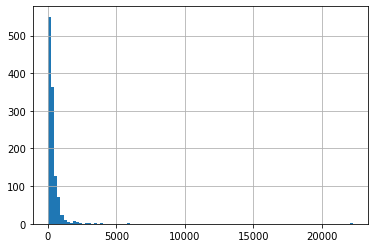

을지로6가
(92, 18)


count      92.000000
mean     1622.791277
std       712.294935
min       270.607735
25%      1036.127974
50%      1725.000000
75%      1980.833333
max      3307.607497
Name: 면적당가격, dtype: float64

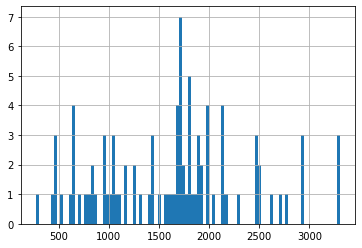

구의동
(295, 18)


count     295.000000
mean      359.192465
std       295.946124
min         3.610108
25%       170.981520
50%       315.416880
75%       440.129252
max      2677.419355
Name: 면적당가격, dtype: float64

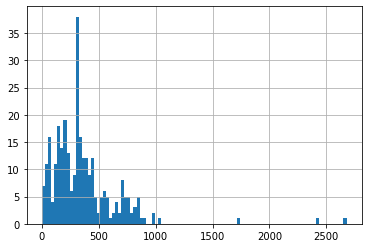

정릉동
(1212, 18)


count    1212.000000
mean      211.377850
std       172.980230
min         0.118343
25%       107.267532
50%       170.714286
75%       262.993056
max      3211.782477
Name: 면적당가격, dtype: float64

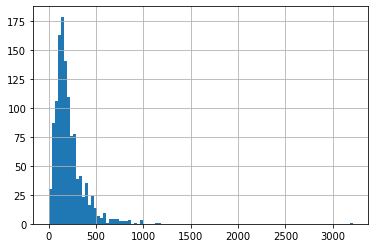

한강로3가
(259, 18)


count     259.000000
mean     1614.981690
std       850.180897
min        79.545455
25%       985.348268
50%      1531.645570
75%      2079.823643
max      5741.935484
Name: 면적당가격, dtype: float64

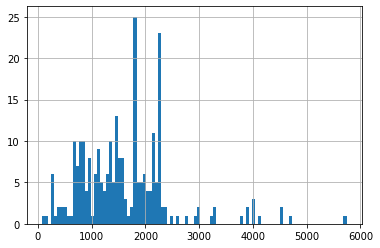

독산동
(351, 18)


count     351.000000
mean      271.995688
std       207.989438
min         2.969562
25%        93.042226
50%       221.674877
75%       401.520369
max      1163.968254
Name: 면적당가격, dtype: float64

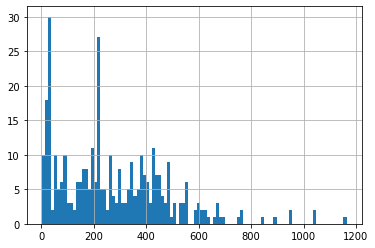

효창동
(357, 18)


count     357.000000
mean      475.919405
std       274.618432
min         0.243902
25%       329.002414
50%       417.500000
75%       508.461538
max      2138.493151
Name: 면적당가격, dtype: float64

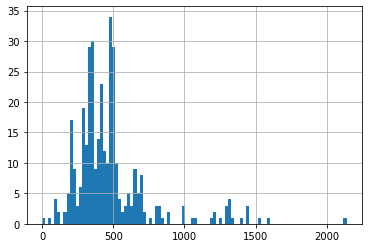

자양동
(371, 18)


count     371.000000
mean      422.559200
std       403.159110
min         7.680492
25%       118.840426
50%       342.511628
75%       589.729820
max      2739.130435
Name: 면적당가격, dtype: float64

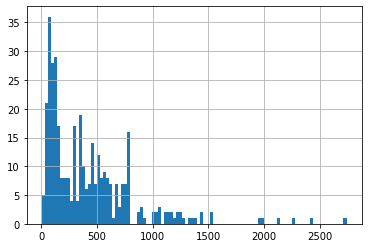

아현동
(2621, 18)


count    2621.000000
mean      508.600557
std       400.626272
min         0.124193
25%       321.515152
50%       405.094340
75%       568.475452
max      6650.000000
Name: 면적당가격, dtype: float64

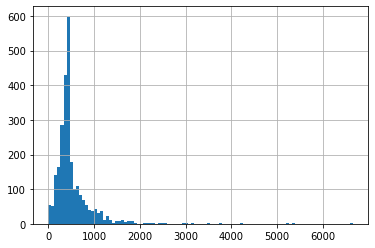

잠실동
(110, 18)


count      110.000000
mean      1561.848525
std       1914.130446
min        255.326017
25%        757.575758
50%       1047.724316
75%       1825.281998
max      15050.167224
Name: 면적당가격, dtype: float64

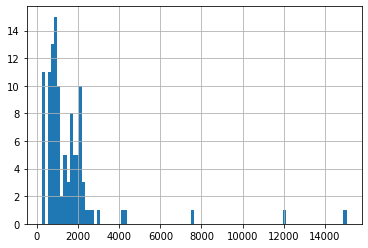

방화동
(543, 18)


count     543.000000
mean      293.652948
std       262.702674
min         0.612370
25%       110.555556
50%       242.857143
75%       397.543771
max      2745.945946
Name: 면적당가격, dtype: float64

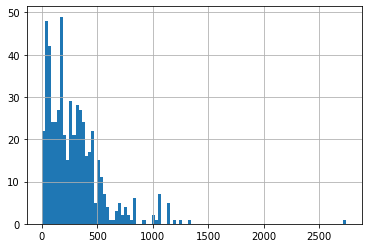

행촌동
(132, 18)


count     132.000000
mean      337.106910
std       280.185852
min        14.388489
25%       151.242354
50%       207.815337
75%       550.865899
max      1400.986031
Name: 면적당가격, dtype: float64

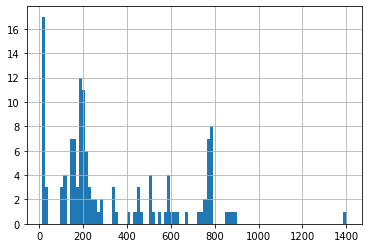

현저동
(507, 18)


count    507.000000
mean     126.498641
std       79.073361
min        4.850105
25%       95.914789
50%      102.400000
75%      125.832250
max      557.988166
Name: 면적당가격, dtype: float64

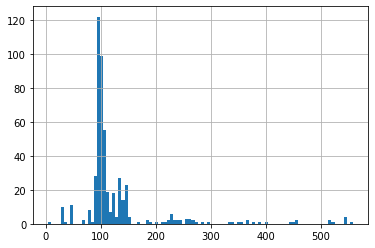

역촌동
(126, 18)


count    126.000000
mean     255.365608
std      130.121717
min       11.990408
25%      187.016509
50%      269.005512
75%      328.361385
max      722.713864
Name: 면적당가격, dtype: float64

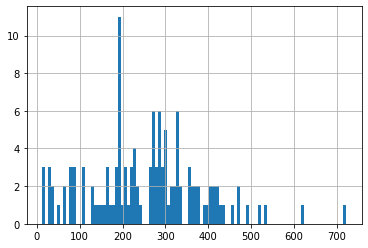

북가좌동
(834, 18)


count     834.000000
mean      259.510669
std       208.711213
min        14.981244
25%       142.222222
50%       228.037855
75%       277.730769
max      2195.225916
Name: 면적당가격, dtype: float64

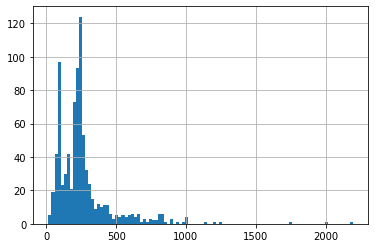

휘경동
(526, 18)


count     526.000000
mean      291.088835
std       238.066310
min         9.364027
25%       135.145131
50%       259.237993
75%       376.281250
max      2654.561507
Name: 면적당가격, dtype: float64

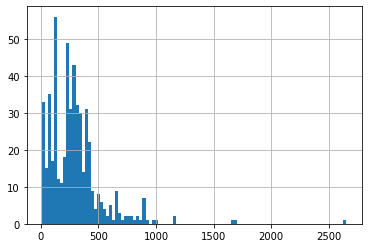

대치동
(186, 18)


count     186.000000
mean     1728.891470
std      1439.309919
min        35.414302
25%       853.381249
50%      1120.300543
75%      2009.812681
max      7756.311475
Name: 면적당가격, dtype: float64

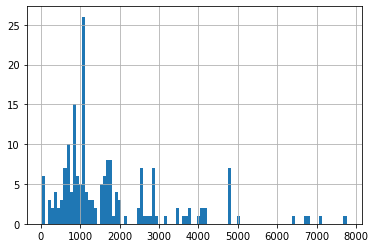

개봉동
(469, 18)


count     469.000000
mean      265.208209
std       205.007295
min         0.041615
25%       121.898089
50%       243.337196
75%       353.866976
max      1916.666667
Name: 면적당가격, dtype: float64

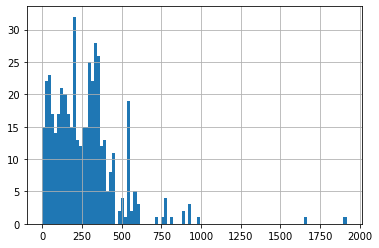

화곡동
(920, 18)


count     920.000000
mean      703.595020
std       831.990644
min         2.079002
25%       160.893603
50%       366.698779
75%       703.252393
max      3475.925926
Name: 면적당가격, dtype: float64

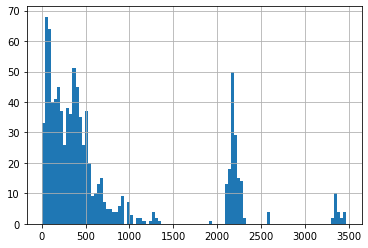

갈현동
(396, 18)


count     396.000000
mean      191.255034
std       214.812347
min         0.787402
25%        49.019536
50%       133.673058
75%       285.461538
max      2882.352941
Name: 면적당가격, dtype: float64

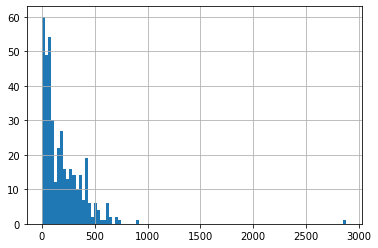

쌍문동
(461, 18)


count    461.000000
mean     205.562025
std      119.349573
min        5.400000
25%      117.647059
50%      203.030303
75%      282.680000
max      703.517588
Name: 면적당가격, dtype: float64

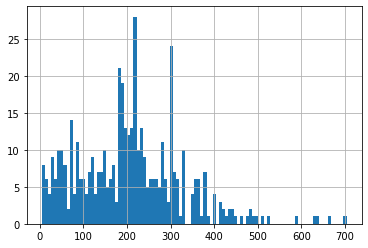

장안동
(421, 18)


count     421.000000
mean      372.517918
std       192.384749
min         9.202454
25%       281.853282
50%       393.192308
75%       428.536645
max      2048.566004
Name: 면적당가격, dtype: float64

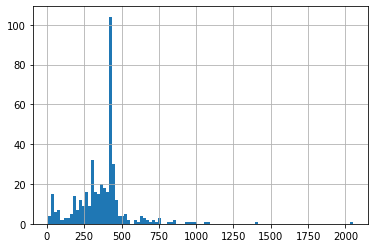

개포동
(135, 18)


count      135.000000
mean      1884.049339
std       1579.771107
min          3.715499
25%        572.962382
50%       1707.490889
75%       3287.611583
max      10598.503741
Name: 면적당가격, dtype: float64

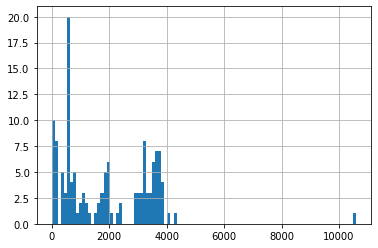

율현동
(131, 18)


count    131.000000
mean     113.569833
std      107.196993
min       16.637355
25%       63.200188
50%       78.660750
75%      108.012583
max      698.324022
Name: 면적당가격, dtype: float64

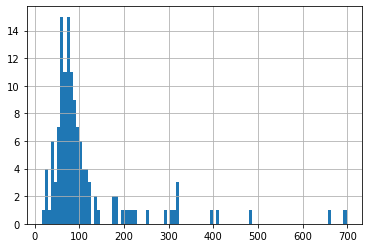

보문동1가
(44, 18)


count      44.000000
mean      509.742863
std       490.433579
min       135.746606
25%       294.042505
50%       349.087792
75%       453.390699
max      2254.901961
Name: 면적당가격, dtype: float64

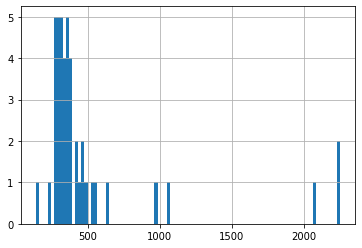

상계동
(1105, 18)


count     1105.000000
mean       253.698492
std        466.348033
min          0.242944
25%         78.125000
50%        211.842105
75%        303.448276
max      13200.000000
Name: 면적당가격, dtype: float64

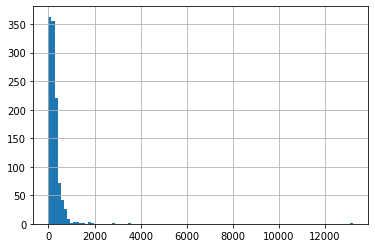

불광동
(1231, 18)


count    1231.000000
mean      322.524985
std       227.946133
min         0.769231
25%       180.000000
50%       268.573422
75%       437.597980
max      2250.000000
Name: 면적당가격, dtype: float64

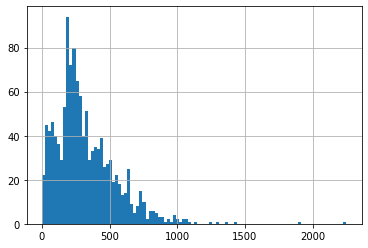

길동
(335, 18)


count     335.000000
mean      211.735618
std       318.122712
min         2.652365
25%        56.305556
50%       120.515152
75%       154.674465
max      2174.348697
Name: 면적당가격, dtype: float64

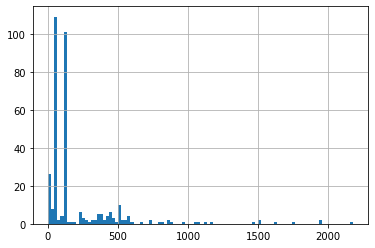

사직동
(117, 18)


count     117.000000
mean      562.095067
std       659.006868
min         4.716981
25%       279.831933
50%       388.053691
75%       582.362729
max      5560.906298
Name: 면적당가격, dtype: float64

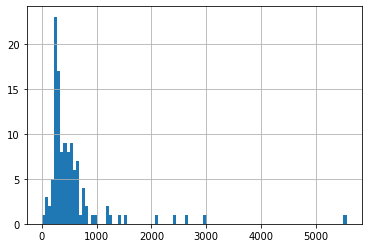

궁동
(633, 18)


count    633.000000
mean      94.790816
std      102.097445
min        3.477051
25%       20.909091
50%       57.151515
75%      122.696897
max      521.658986
Name: 면적당가격, dtype: float64

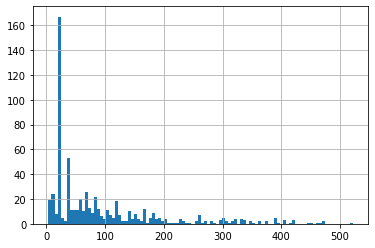

신월동
(450, 18)


count    450.000000
mean     226.286370
std      142.076163
min        5.450165
25%      135.739882
50%      199.143474
75%      304.553090
max      973.932970
Name: 면적당가격, dtype: float64

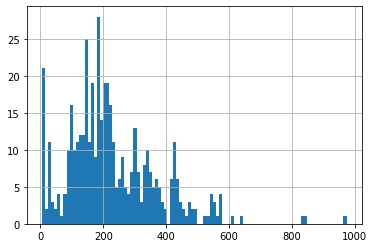

고척동
(543, 18)


count     543.000000
mean      269.781871
std       181.849333
min        15.750000
25%       160.492537
50%       230.769231
75%       333.568729
max      1266.666667
Name: 면적당가격, dtype: float64

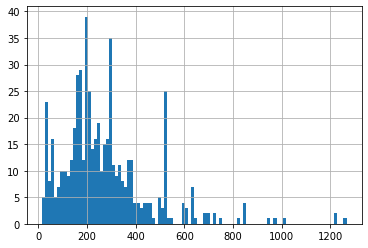

오곡동
(242, 18)


count    242.000000
mean      21.418010
std       10.702780
min        7.142857
25%       15.202748
50%       19.502428
75%       23.970495
max      126.666667
Name: 면적당가격, dtype: float64

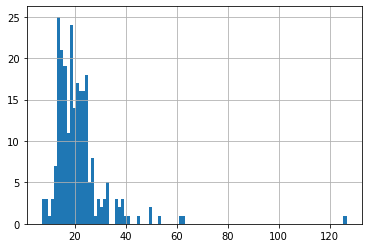

대조동
(364, 18)


count      364.000000
mean       522.527103
std        995.937973
min          4.063260
25%        217.489130
50%        312.391087
75%        604.286058
max      15987.240000
Name: 면적당가격, dtype: float64

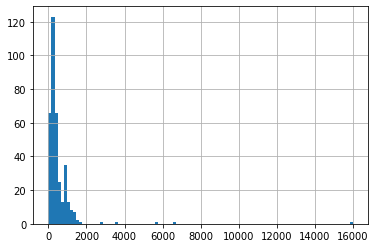

신수동
(282, 18)


count     282.000000
mean      402.426080
std       268.464816
min        21.182266
25%       239.597826
50%       335.089744
75%       525.835793
max      2216.384181
Name: 면적당가격, dtype: float64

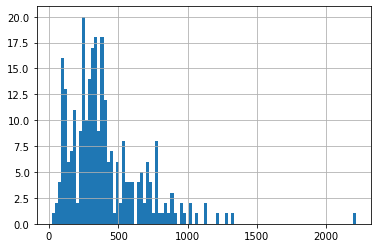

제기동
(578, 18)


count     578.000000
mean      306.389307
std       224.415406
min         0.719424
25%       171.255952
50%       262.456943
75%       399.166667
max      2888.372093
Name: 면적당가격, dtype: float64

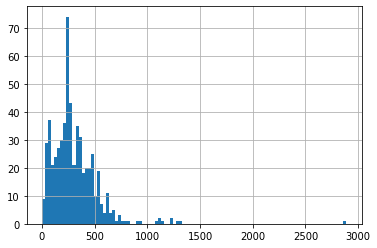

반포동
(203, 18)


count      203.000000
mean      1736.580941
std       2221.921713
min          3.853565
25%        327.242142
50%        741.884894
75%       2293.708623
max      11616.316171
Name: 면적당가격, dtype: float64

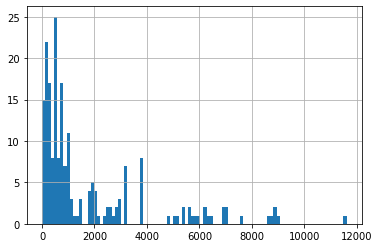

평창동
(791, 18)


count    791.000000
mean     157.575338
std      138.861902
min        0.089286
25%       42.652375
50%      132.382892
75%      243.000000
max      956.521739
Name: 면적당가격, dtype: float64

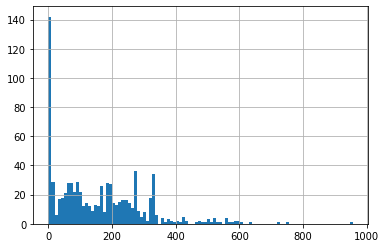

시흥동
(586, 18)


count     586.000000
mean      242.163580
std       218.106084
min         0.921375
25%        55.312500
50%       212.636210
75%       336.068683
max      1210.000000
Name: 면적당가격, dtype: float64

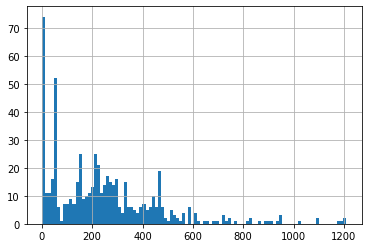

서초동
(745, 18)


count      745.000000
mean      1290.866544
std       1299.434658
min          0.209205
25%        745.967742
50%       1056.774395
75%       1512.358783
max      19448.946515
Name: 면적당가격, dtype: float64

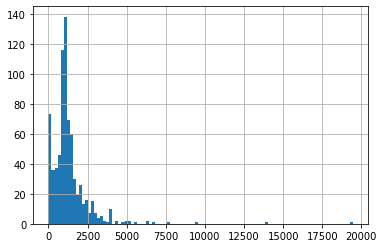

사당동
(1775, 18)


count    1775.000000
mean      228.596612
std       361.214938
min         0.047847
25%        33.732501
50%       109.401527
75%       289.411255
max      7500.000000
Name: 면적당가격, dtype: float64

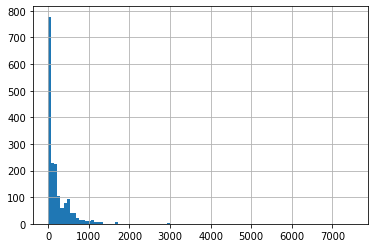

북아현동
(1640, 18)


count    1640.000000
mean      495.800243
std       494.235098
min        17.647059
25%       299.500000
50%       390.833451
75%       553.000000
max      5487.394958
Name: 면적당가격, dtype: float64

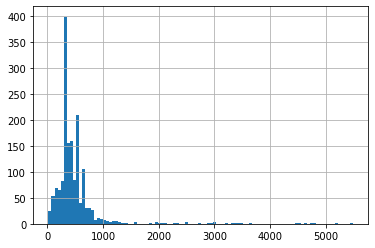

수유동
(1385, 18)


count    1385.000000
mean      185.599203
std       171.871266
min         0.011494
25%        62.500000
50%       142.076503
75%       267.000000
max      2173.913043
Name: 면적당가격, dtype: float64

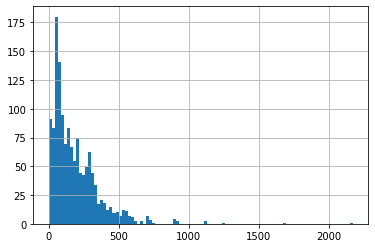

방배동
(925, 18)


count     925.000000
mean      435.495725
std       418.889428
min         2.589332
25%       105.686965
50%       370.792926
75%       602.713790
max      3932.322685
Name: 면적당가격, dtype: float64

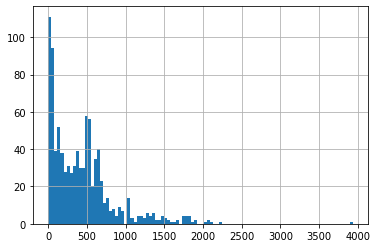

가양동
(183, 18)


count     183.000000
mean      562.352059
std       379.071930
min         1.443001
25%       266.134011
50%       443.159530
75%      1039.460014
max      1530.000000
Name: 면적당가격, dtype: float64

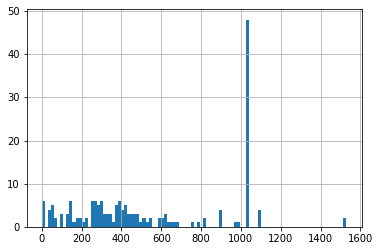

개화동
(264, 18)


count    264.000000
mean      44.569848
std       44.193548
min        3.020408
25%       18.114381
50%       30.386204
75%       51.430251
max      289.473684
Name: 면적당가격, dtype: float64

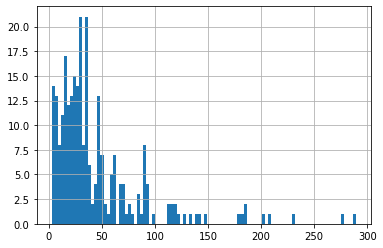

한강로1가
(50, 18)


count      50.000000
mean     1186.688607
std       604.298661
min       213.030303
25%       672.200911
50%      1178.881608
75%      1455.918470
max      2666.666667
Name: 면적당가격, dtype: float64

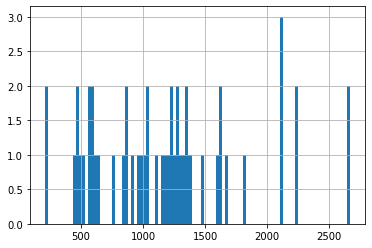

상봉동
(373, 18)


count     373.000000
mean      421.036383
std       381.293656
min        10.563380
25%       190.476190
50%       338.333333
75%       509.956275
max      3500.548246
Name: 면적당가격, dtype: float64

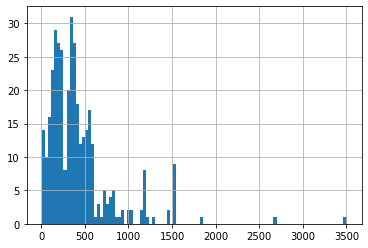

마천동
(269, 18)


count     269.000000
mean      210.803168
std       251.763962
min        15.267176
25%        73.500000
50%        74.242424
75%       285.714286
max      1441.176471
Name: 면적당가격, dtype: float64

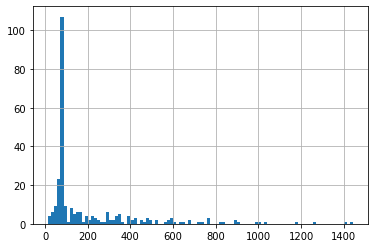

보광동
(291, 18)


count     291.000000
mean      506.399222
std       409.400467
min        41.666667
25%       251.344086
50%       375.000000
75%       642.207002
max      3076.923077
Name: 면적당가격, dtype: float64

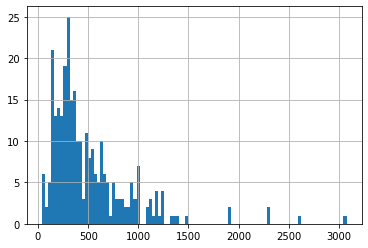

대방동
(281, 18)


count     281.000000
mean      347.282582
std       261.912517
min         0.041511
25%       165.753425
50%       276.956522
75%       482.843750
max      1731.537916
Name: 면적당가격, dtype: float64

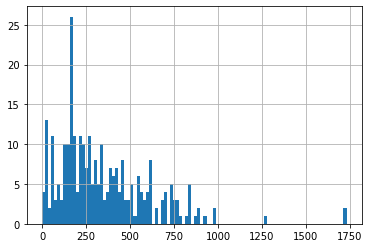

청담동
(209, 18)


count     209.000000
mean     1154.705596
std      1091.690097
min        21.839080
25%       553.001058
50%       813.008130
75%      1512.859304
max      7519.058296
Name: 면적당가격, dtype: float64

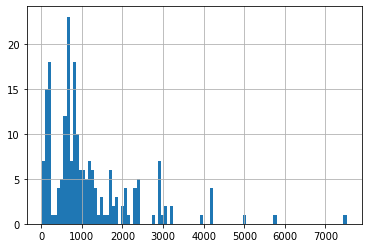

신당동
(1827, 18)


count     1827.000000
mean       518.683566
std       1039.698010
min          3.181818
25%        262.000000
50%        293.638677
75%        408.690609
max      26857.142857
Name: 면적당가격, dtype: float64

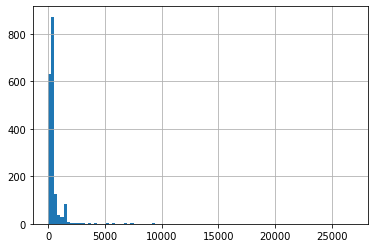

삼선동1가
(73, 18)


count      73.000000
mean      350.191733
std       264.734345
min        36.231884
25%       189.000000
50%       249.333333
75%       534.464286
max      1104.681746
Name: 면적당가격, dtype: float64

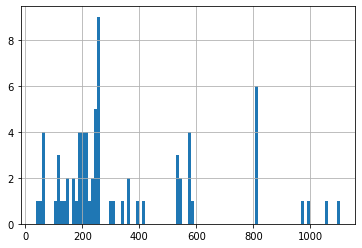

창동
(228, 18)


count    228.000000
mean     216.108634
std      171.779117
min        2.909091
25%       54.482759
50%      199.079939
75%      314.896795
max      829.187396
Name: 면적당가격, dtype: float64

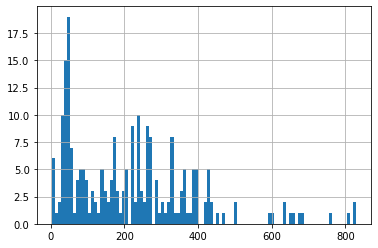

신정동
(587, 18)


count     587.000000
mean      325.256807
std       345.519902
min         2.217295
25%       169.945649
50%       288.236726
75%       412.500000
max      6189.735614
Name: 면적당가격, dtype: float64

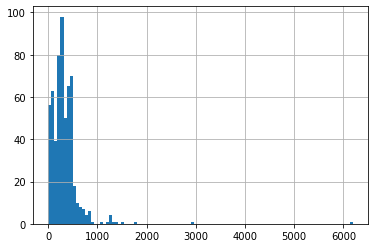

명일동
(292, 18)


count    292.000000
mean      72.474701
std       96.110709
min       10.101010
25%       26.275904
50%       72.077922
75%       80.181818
max      794.319295
Name: 면적당가격, dtype: float64

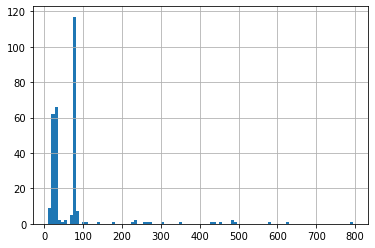

하왕십리동
(809, 18)


count     809.000000
mean      413.021298
std       250.400505
min         0.909091
25%       292.000000
50%       377.000000
75%       470.394737
max      4713.200000
Name: 면적당가격, dtype: float64

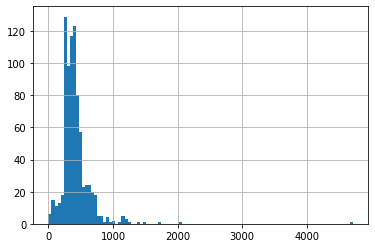

석관동
(557, 18)


count     557.000000
mean      204.583264
std       196.029401
min        11.111111
25%        70.459519
50%       135.000000
75%       286.875000
max      1484.375000
Name: 면적당가격, dtype: float64

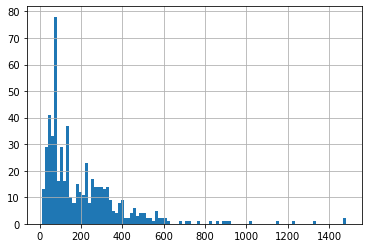

한남동
(623, 18)


count      623.000000
mean       837.237794
std       1028.260128
min         19.021423
25%        318.403080
50%        501.666667
75%        950.666667
max      11175.151515
Name: 면적당가격, dtype: float64

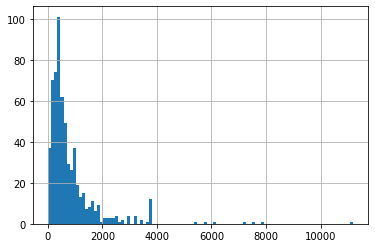

항동
(404, 18)


count     404.000000
mean       47.977823
std       110.833932
min         0.660689
25%        15.923567
50%        21.528525
75%        42.372881
max      1866.028708
Name: 면적당가격, dtype: float64

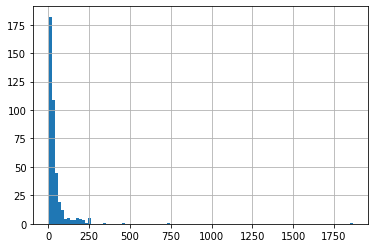

오쇠동
(55, 18)


count     55.000000
mean      23.705208
std       15.974143
min        2.583979
25%       15.120840
50%       21.708683
75%       30.206044
max      121.100917
Name: 면적당가격, dtype: float64

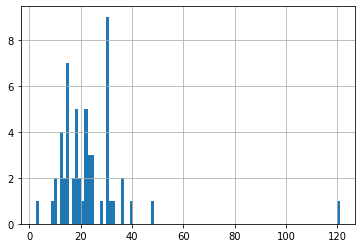

계동
(28, 18)


count      28.000000
mean      519.150019
std       340.928685
min       151.515152
25%       216.346824
50%       398.682488
75%       765.278361
max      1210.000000
Name: 면적당가격, dtype: float64

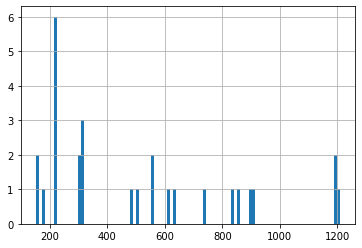

만리동2가
(344, 18)


count     344.000000
mean      451.871492
std       284.318943
min        55.586437
25%       294.264770
50%       394.366106
75%       605.925786
max      3609.112710
Name: 면적당가격, dtype: float64

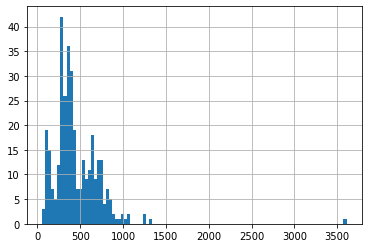

합정동
(212, 18)


count     212.000000
mean      774.446601
std       787.028530
min        14.864865
25%       329.421053
50%       504.633897
75%       921.987099
max      4777.070064
Name: 면적당가격, dtype: float64

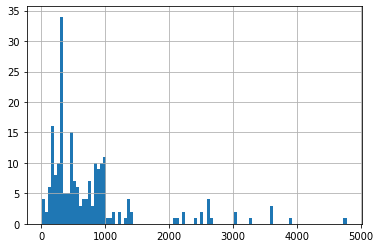

쌍림동
(85, 18)


count      85.000000
mean     1404.661996
std      1070.769213
min        77.120823
25%       647.950311
50%      1222.444076
75%      1943.583385
max      6685.314685
Name: 면적당가격, dtype: float64

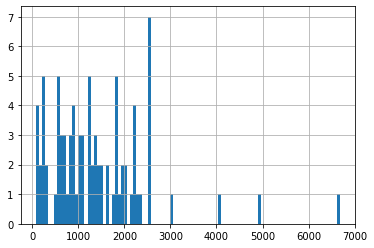

주교동
(53, 18)


count      53.000000
mean      923.522526
std       691.844825
min       234.782609
25%       449.293967
50%       749.519231
75%      1145.348837
max      3633.027523
Name: 면적당가격, dtype: float64

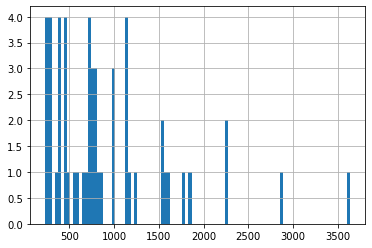

망우동
(353, 18)


count     353.000000
mean      170.191446
std       171.205181
min         0.025000
25%        53.009434
50%       114.000000
75%       222.222222
max      1235.477009
Name: 면적당가격, dtype: float64

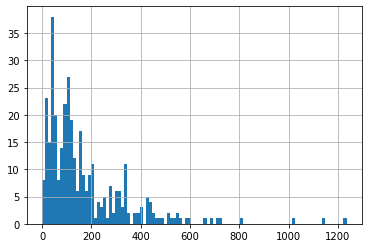

석촌동
(36, 18)


count      36.000000
mean      745.899631
std       331.900583
min       225.035211
25%       545.000680
50%       688.897324
75%       907.563025
max      1408.799226
Name: 면적당가격, dtype: float64

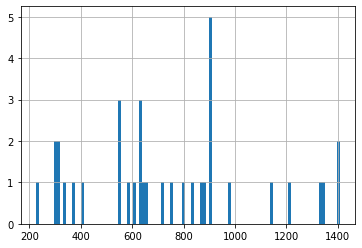

송파동
(52, 18)


count      52.000000
mean      731.994598
std       330.123344
min       310.355987
25%       412.497998
50%       787.907533
75%       921.695247
max      1798.561151
Name: 면적당가격, dtype: float64

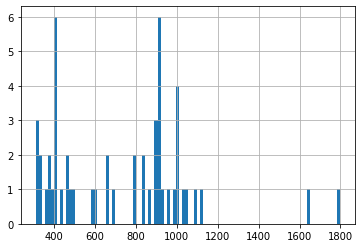

문배동
(93, 18)


count      93.000000
mean      922.959970
std       434.822977
min        18.018018
25%       650.100000
50%       904.200820
75%      1067.763158
max      2111.044776
Name: 면적당가격, dtype: float64

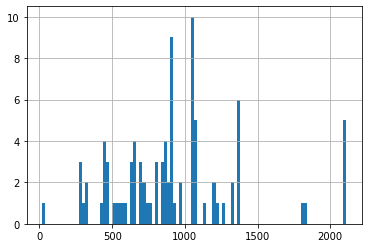

광장동
(105, 18)


count     105.000000
mean      451.174297
std       292.625101
min        11.013216
25%       239.907550
50%       478.260870
75%       593.803419
max      1453.802711
Name: 면적당가격, dtype: float64

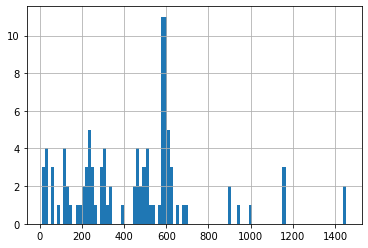

양재동
(131, 18)


count     131.000000
mean      590.223421
std       612.910975
min         3.627570
25%        51.037818
50%       451.165097
75%       902.619093
max      2713.178295
Name: 면적당가격, dtype: float64

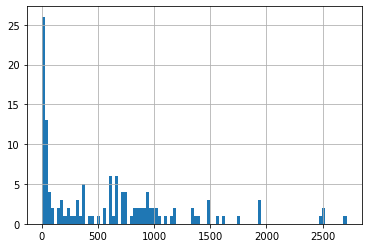

성수동2가
(286, 18)


count     286.000000
mean      563.045215
std       574.827152
min        56.074766
25%       200.000000
50%       482.600268
75%       681.531704
max      6189.213086
Name: 면적당가격, dtype: float64

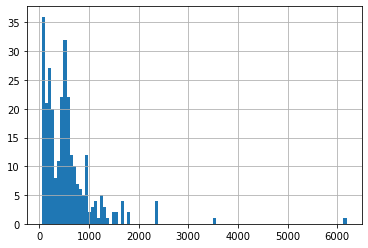

필동2가
(48, 18)


count      48.000000
mean      734.497687
std       660.622517
min         6.756757
25%       410.000000
50%       610.510540
75%       724.055785
max      4545.446429
Name: 면적당가격, dtype: float64

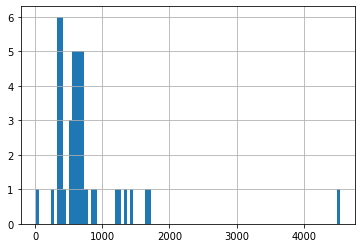

공항동
(263, 18)


count     263.000000
mean      289.877119
std       273.563943
min         1.428571
25%       116.515837
50%       269.230769
75%       398.923077
max      2118.000000
Name: 면적당가격, dtype: float64

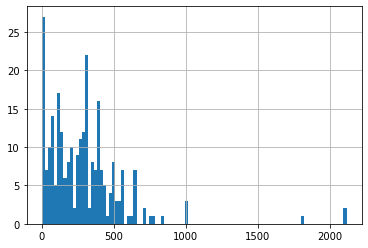

청량리동
(182, 18)


count     182.000000
mean      385.014929
std       281.757388
min         8.305648
25%       234.741544
50%       315.117823
75%       405.921670
max      1608.888889
Name: 면적당가격, dtype: float64

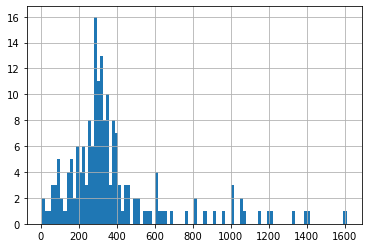

이촌동
(158, 18)


count     158.000000
mean      326.533903
std       640.151879
min         0.016949
25%         0.151286
50%         0.302572
75%       431.407940
max      2523.046092
Name: 면적당가격, dtype: float64

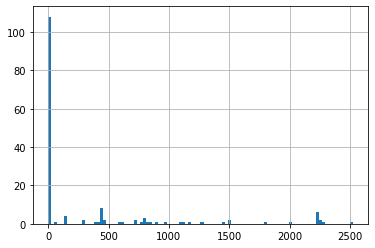

수색동
(583, 18)


count     583.000000
mean      462.562599
std       663.257348
min         0.102145
25%       119.537440
50%       276.156250
75%       418.506098
max      6630.490196
Name: 면적당가격, dtype: float64

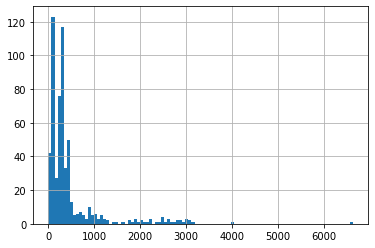

흥인동
(103, 18)


count     103.000000
mean     1022.504027
std       872.471582
min       173.684211
25%       333.434650
50%       647.058824
75%      1686.282541
max      5248.480243
Name: 면적당가격, dtype: float64

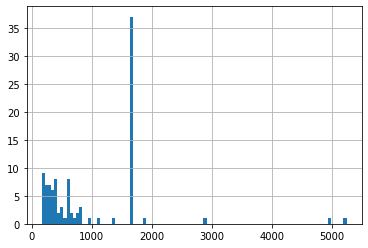

보문동6가
(362, 18)


count     362.000000
mean      231.113753
std       109.018072
min        42.979943
25%       154.500000
50%       250.446612
75%       271.767857
max      1138.250000
Name: 면적당가격, dtype: float64

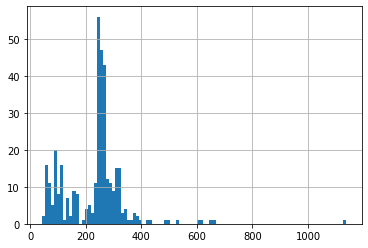

대흥동
(415, 18)


count     415.000000
mean      610.702424
std       686.761530
min        55.813953
25%       342.428571
50%       425.000000
75%       584.523810
max      9295.324675
Name: 면적당가격, dtype: float64

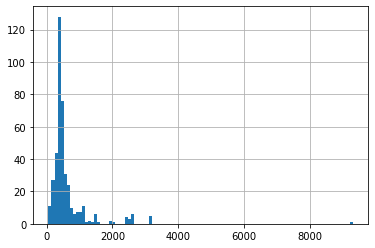

천왕동
(70, 18)


count     70.000000
mean      97.200203
std       97.239185
min        5.752017
25%       56.473214
50%       82.131710
75%       99.517842
max      616.016427
Name: 면적당가격, dtype: float64

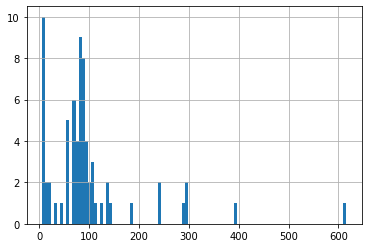

도봉동
(1304, 18)


count    1304.000000
mean       69.694731
std       143.496698
min         0.329997
25%         2.511346
50%         3.909091
75%        53.639124
max      1284.838915
Name: 면적당가격, dtype: float64

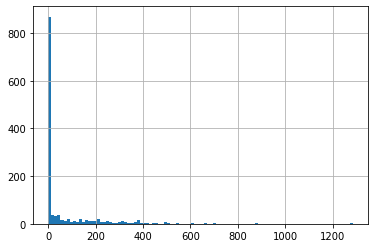

공덕동
(538, 18)


count     538.000000
mean      738.790516
std       631.012667
min        17.543860
25%       300.000000
50%       565.444444
75%       930.769231
max      4552.000000
Name: 면적당가격, dtype: float64

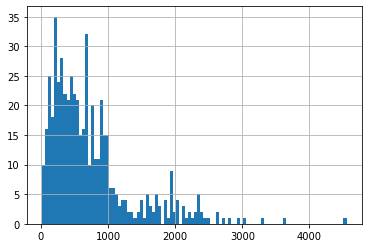

무악동
(160, 18)


count     160.000000
mean      495.968925
std       411.100615
min         0.075358
25%       288.497064
50%       464.988250
75%       580.161158
max      4345.000000
Name: 면적당가격, dtype: float64

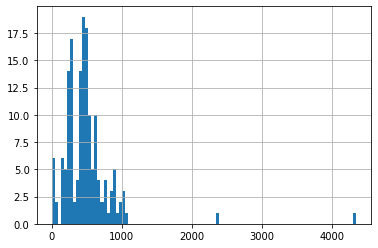

연희동
(341, 18)


count    341.000000
mean     239.111464
std      181.432641
min        6.340586
25%       78.947368
50%      203.030303
75%      333.255814
max      911.974623
Name: 면적당가격, dtype: float64

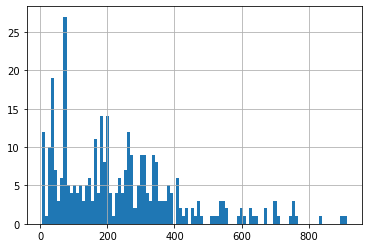

면목동
(781, 18)


count     781.000000
mean      250.556028
std       232.712913
min         0.153846
25%       104.000000
50%       215.693095
75%       357.618836
max      3773.584906
Name: 면적당가격, dtype: float64

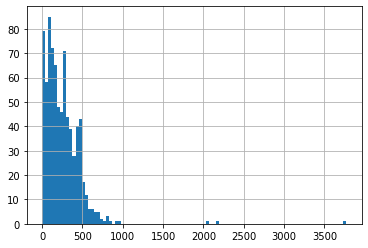

금호동4가
(379, 18)


count     379.000000
mean      437.024003
std       336.647947
min        43.998365
25%       239.836116
50%       345.500000
75%       510.406855
max      2656.826568
Name: 면적당가격, dtype: float64

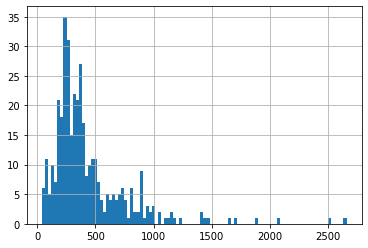

금호동3가
(338, 18)


count     338.000000
mean      336.707796
std       163.050968
min        35.211268
25%       258.282757
50%       273.000000
75%       357.970087
max      1308.411215
Name: 면적당가격, dtype: float64

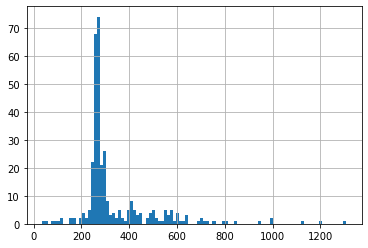

동작동
(319, 18)


count     319.000000
mean      220.406428
std       230.651723
min         1.916933
25%       115.121247
50%       140.000000
75%       269.265823
max      1449.275362
Name: 면적당가격, dtype: float64

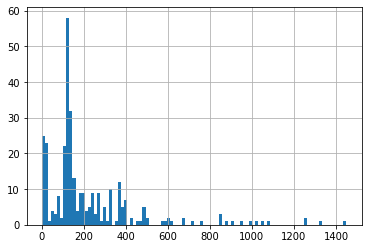

남가좌동
(983, 18)


count     983.000000
mean      349.846752
std       318.293727
min         8.695652
25%       141.176471
50%       265.473684
75%       438.596491
max      2990.000000
Name: 면적당가격, dtype: float64

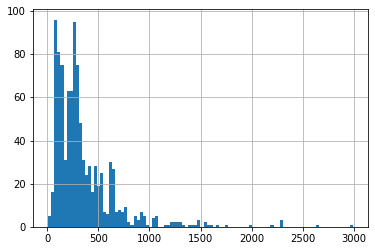

상일동
(188, 18)


count     188.000000
mean      547.938926
std       450.250192
min        10.125615
25%        90.642756
50%       737.016790
75%       839.024636
max      2754.116979
Name: 면적당가격, dtype: float64

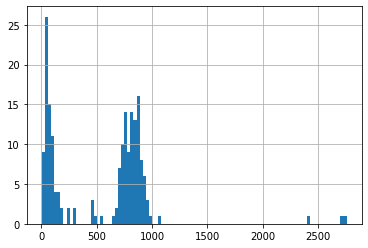

영등포동6가
(84, 18)


count      84.000000
mean      688.194710
std       514.626424
min       116.279070
25%       336.342836
50%       539.646465
75%       878.787879
max      2345.695364
Name: 면적당가격, dtype: float64

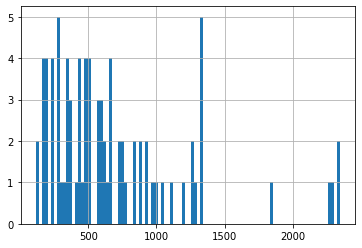

혜화동
(45, 18)


count      45.000000
mean      475.061476
std       460.364405
min         5.882353
25%       286.220255
50%       387.931034
75%       476.000000
max      2496.993865
Name: 면적당가격, dtype: float64

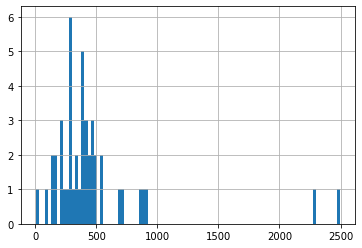

신사동
(301, 18)


count     301.000000
mean      571.024953
std       892.176947
min         0.084694
25%        75.757576
50%       220.800000
75%       478.117647
max      5072.463768
Name: 면적당가격, dtype: float64

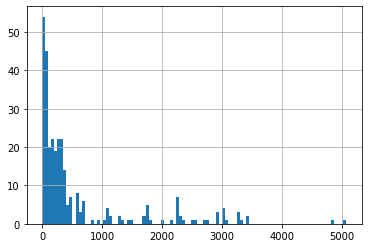

갈월동
(75, 18)


count      75.000000
mean      639.921600
std       636.553591
min       156.830376
25%       271.227836
50%       382.332155
75%       711.004492
max      3688.712121
Name: 면적당가격, dtype: float64

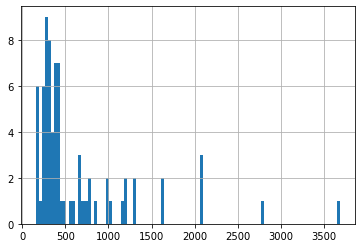

노량진동
(620, 18)


count     620.000000
mean      410.654475
std       452.333105
min         0.250000
25%       141.966712
50%       284.223356
75%       489.000000
max      4444.444444
Name: 면적당가격, dtype: float64

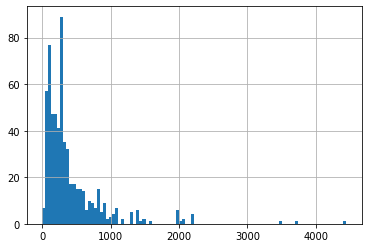

흑석동
(1379, 18)


count    1379.000000
mean      478.228606
std       566.807071
min         5.333333
25%       264.143375
50%       328.907923
75%       488.755814
max      5013.077594
Name: 면적당가격, dtype: float64

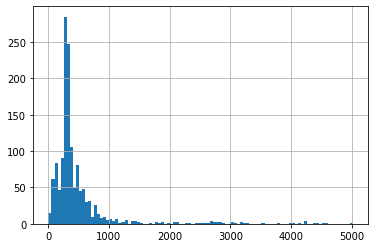

회기동
(126, 18)


count     126.000000
mean      370.378276
std       290.540536
min        10.000000
25%       156.359524
50%       281.607143
75%       447.408027
max      1639.344262
Name: 면적당가격, dtype: float64

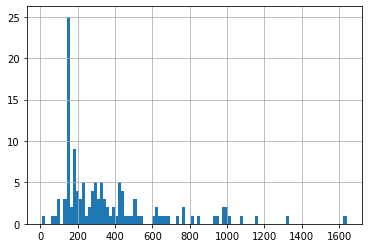

염리동
(385, 18)


count     385.000000
mean      552.955679
std       491.298583
min         8.573388
25%       319.000000
50%       372.287918
75%       510.293103
max      2921.348315
Name: 면적당가격, dtype: float64

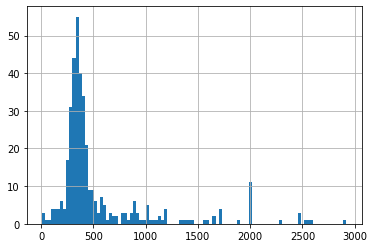

이태원동
(412, 18)


count     412.000000
mean      806.870394
std       884.218672
min        10.101010
25%       270.641304
50%       530.382555
75%      1000.000000
max      6342.425514
Name: 면적당가격, dtype: float64

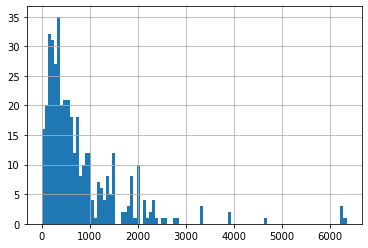

냉천동
(142, 18)


count     142.000000
mean      374.834018
std       395.234384
min        56.507592
25%       183.811090
50%       267.829374
75%       344.942308
max      2343.786408
Name: 면적당가격, dtype: float64

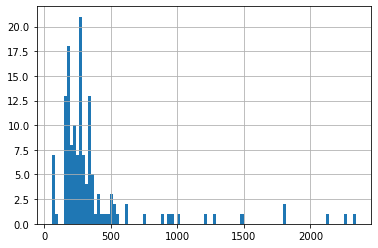

녹번동
(529, 18)


count     529.000000
mean      242.585649
std       140.243286
min         6.695157
25%       190.474935
50%       226.769231
75%       270.848057
max      1455.079286
Name: 면적당가격, dtype: float64

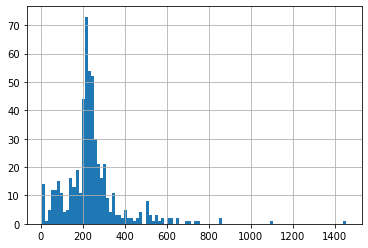

고덕동
(271, 18)


count     271.000000
mean      257.375780
std       468.639463
min         2.419929
25%        28.521062
50%        45.386905
75%       200.378417
max      3516.053250
Name: 면적당가격, dtype: float64

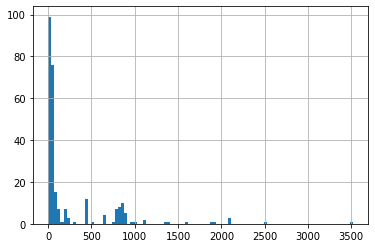

우면동
(172, 18)


count    172.000000
mean     196.359313
std      186.652550
min        1.178699
25%       61.893944
50%      124.402250
75%      306.000000
max      840.336134
Name: 면적당가격, dtype: float64

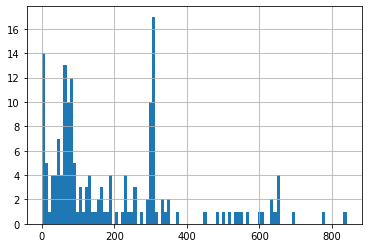

신영동
(541, 18)


count    541.000000
mean      87.502986
std       72.478329
min        0.077942
25%       29.949089
50%       84.086957
75%      106.060606
max      600.000000
Name: 면적당가격, dtype: float64

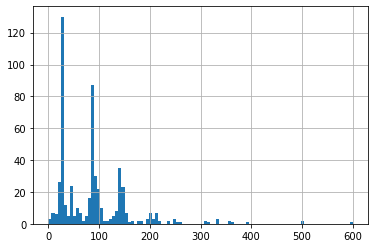

가산동
(301, 18)


count     301.000000
mean      376.930569
std       234.517161
min         9.425071
25%       213.270142
50%       360.850222
75%       452.970297
max      1136.000000
Name: 면적당가격, dtype: float64

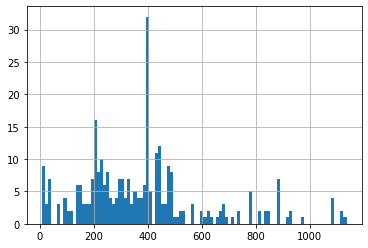

방학동
(341, 18)


count    341.000000
mean     124.105526
std      154.800526
min        0.539413
25%        9.087054
50%       51.877133
75%      209.677419
max      902.061856
Name: 면적당가격, dtype: float64

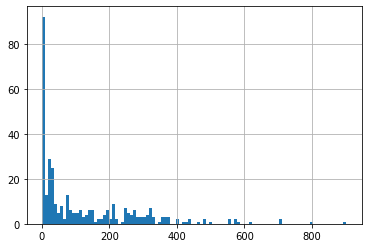

서빙고동
(140, 18)


count     140.000000
mean      553.688328
std       292.379007
min        17.761989
25%       398.591549
50%       516.271410
75%       615.384615
max      2142.857143
Name: 면적당가격, dtype: float64

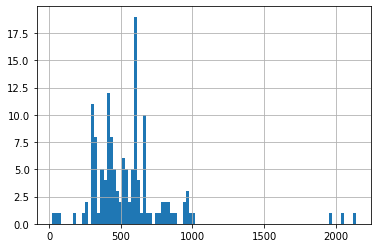

염창동
(130, 18)


count     130.000000
mean      365.401981
std       266.519393
min        11.895161
25%       227.190113
50%       324.379923
75%       446.849466
max      2369.700000
Name: 면적당가격, dtype: float64

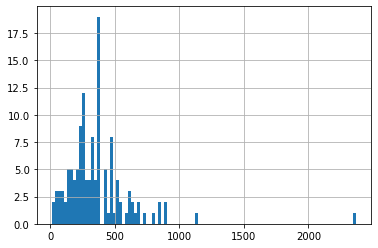

용산동5가
(85, 18)


count      85.000000
mean      950.214366
std       995.285278
min       150.000000
25%       329.533679
50%       683.974359
75%      1348.405797
max      6352.941176
Name: 면적당가격, dtype: float64

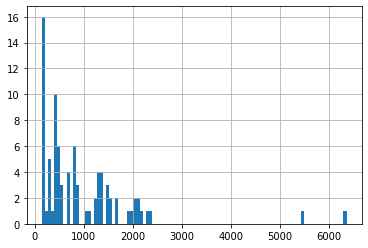

명륜1가
(30, 18)


count     30.000000
mean     277.069636
std      180.713106
min       24.154589
25%      109.130094
50%      287.798717
75%      419.000577
max      614.896989
Name: 면적당가격, dtype: float64

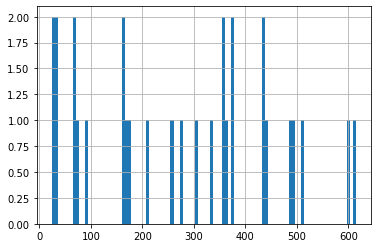

방이동
(143, 18)


count     143.000000
mean      550.244719
std       863.838319
min        29.327653
25%        72.442740
50%       216.530850
75%       625.904260
max      5897.490886
Name: 면적당가격, dtype: float64

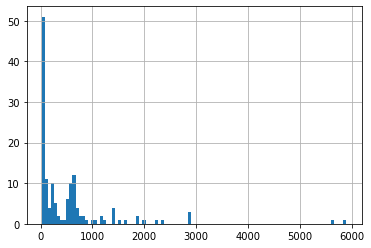

중곡동
(527, 18)


count     527.000000
mean      136.614677
std       190.663661
min         0.649070
25%        10.871319
50%        27.636719
75%       207.952016
max      1000.000000
Name: 면적당가격, dtype: float64

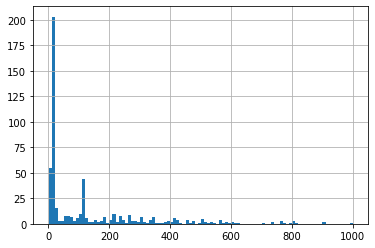

충무로2가
(25, 18)


count      25.000000
mean     3333.772973
std      1588.362259
min       651.226158
25%      2243.217054
50%      3348.368018
75%      3961.272727
max      6690.284698
Name: 면적당가격, dtype: float64

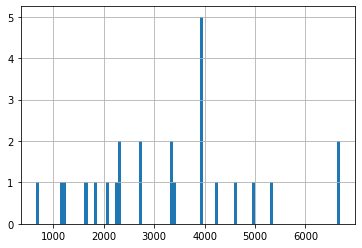

필동3가
(28, 18)


count      28.000000
mean      595.865794
std       261.820866
min       228.571429
25%       409.925722
50%       638.186032
75%       677.008403
max      1295.535714
Name: 면적당가격, dtype: float64

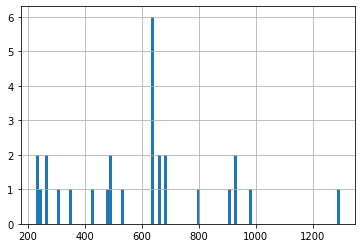

묵동
(206, 18)


count    206.000000
mean     258.235265
std      150.664353
min        5.615274
25%      161.789723
50%      249.595745
75%      328.259494
max      800.000000
Name: 면적당가격, dtype: float64

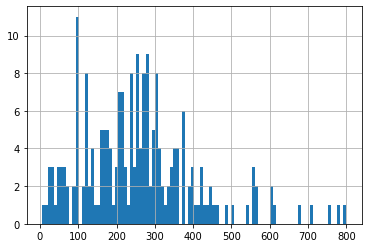

당산동4가
(131, 18)


count     131.000000
mean      536.547829
std       368.135387
min        12.976059
25%       302.472077
50%       463.215259
75%       644.630329
max      2112.751159
Name: 면적당가격, dtype: float64

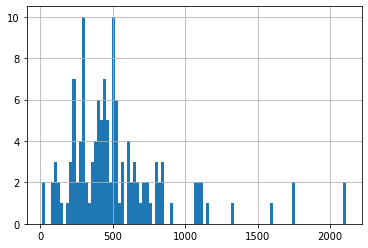

우이동
(491, 18)


count    491.000000
mean      86.094974
std      101.284337
min        1.000000
25%       12.090909
50%       58.179329
75%      113.571429
max      866.666667
Name: 면적당가격, dtype: float64

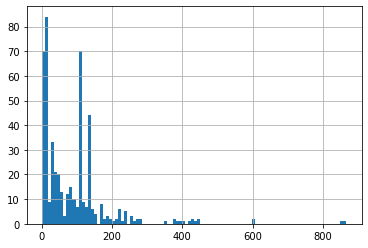

잠원동
(72, 18)


count      72.000000
mean      961.070175
std       800.535325
min         0.625000
25%       477.835794
50%       717.540106
75%      1300.577372
max      4893.268780
Name: 면적당가격, dtype: float64

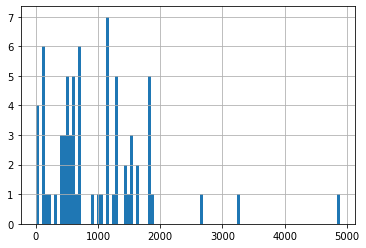

용강동
(148, 18)


count     148.000000
mean      419.240665
std       602.547147
min        18.000000
25%       309.916667
50%       349.254069
75%       383.028169
max      7142.857143
Name: 면적당가격, dtype: float64

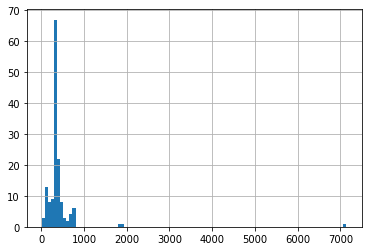

강일동
(217, 18)


count    217.000000
mean      91.430714
std      120.988379
min       15.115607
25%       39.314516
50%       51.380597
75%       78.212291
max      867.593414
Name: 면적당가격, dtype: float64

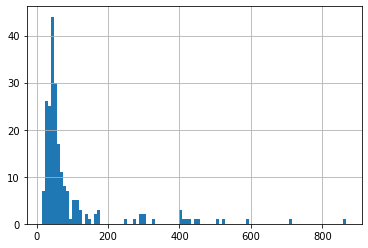

둔촌동
(256, 18)


count     256.000000
mean      292.403779
std       533.100696
min         0.078740
25%        45.454545
50%        86.876602
75%       276.039280
max      2528.169014
Name: 면적당가격, dtype: float64

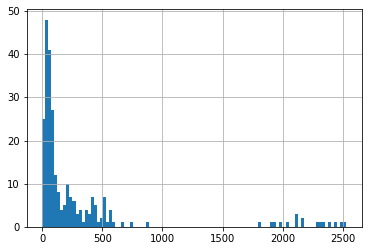

성북동
(656, 18)


count     656.000000
mean      223.739693
std       183.864594
min         5.615003
25%        82.914740
50%       179.017857
75%       305.513950
max      1690.909091
Name: 면적당가격, dtype: float64

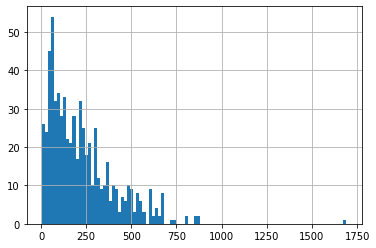

동빙고동
(110, 18)


count     110.000000
mean      528.768224
std       328.305622
min        56.022409
25%       275.694444
50%       467.406624
75%       745.024155
max      1454.545455
Name: 면적당가격, dtype: float64

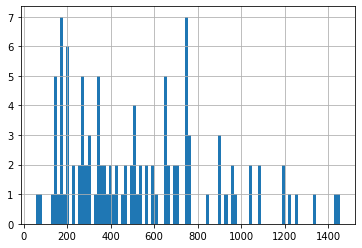

당주동
(50, 18)


count      50.000000
mean     2090.514880
std       836.376533
min       500.000000
25%      1472.569647
50%      2048.015873
75%      2577.455973
max      5133.802817
Name: 면적당가격, dtype: float64

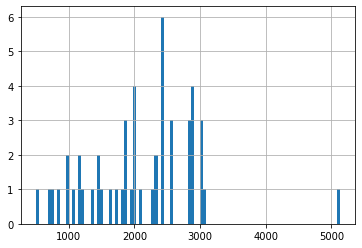

답십리동
(864, 18)


count     864.000000
mean      322.074949
std       217.741713
min         0.069444
25%       190.796970
50%       307.427419
75%       388.222222
max      3602.110490
Name: 면적당가격, dtype: float64

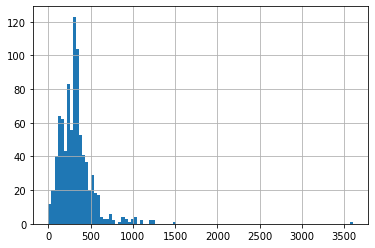

장위동
(1252, 18)


count    1252.000000
mean      256.474514
std       321.484909
min         7.692308
25%       109.375000
50%       167.976608
75%       281.963965
max      4347.801418
Name: 면적당가격, dtype: float64

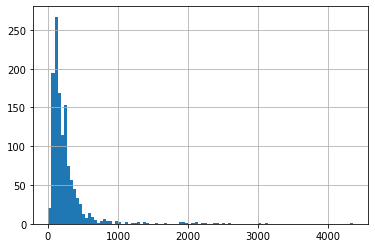

신도림동
(278, 18)


count     278.000000
mean      417.514246
std       329.964902
min        12.416107
25%       189.627193
50%       348.055347
75%       541.166667
max      2722.507246
Name: 면적당가격, dtype: float64

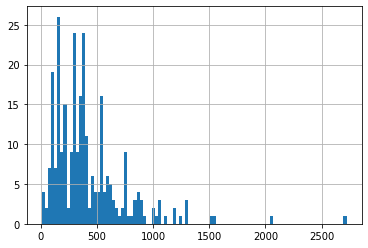

증산동
(177, 18)


count     177.000000
mean      951.869646
std      1073.755644
min         4.411394
25%       140.986908
50%       406.315789
75%      1725.098677
max      4981.535407
Name: 면적당가격, dtype: float64

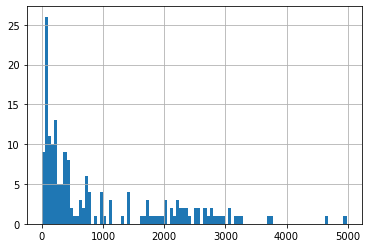

삼선동2가
(225, 18)


count     225.000000
mean      251.670666
std       220.994485
min         3.958515
25%       129.918367
50%       165.000000
75%       313.911386
max      1675.285171
Name: 면적당가격, dtype: float64

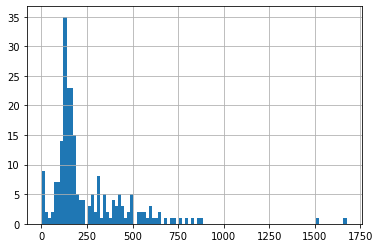

원지동
(194, 18)


count    194.000000
mean      52.387532
std       43.308000
min        0.921132
25%       29.543572
50%       45.246295
75%       60.499357
max      300.000000
Name: 면적당가격, dtype: float64

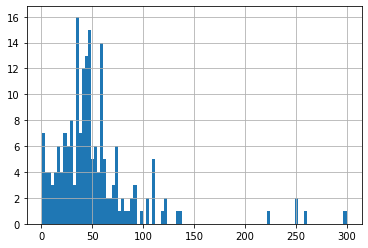

서계동
(84, 18)


count      84.000000
mean      611.187174
std       533.624832
min        63.157895
25%       315.633797
50%       520.056806
75%       748.026370
max      2937.500000
Name: 면적당가격, dtype: float64

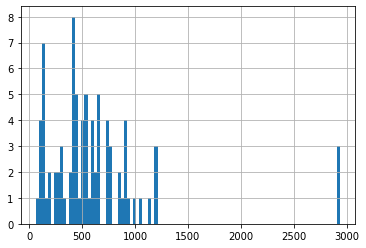

용문동
(280, 18)


count     280.000000
mean      275.082385
std       382.653815
min         2.167505
25%       166.218727
50%       172.000000
75%       185.133675
max      4620.000000
Name: 면적당가격, dtype: float64

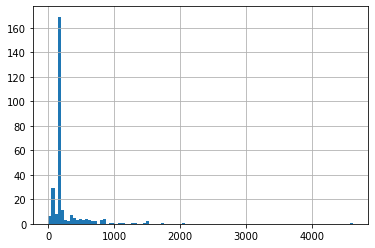

외발산동
(103, 18)


count    103.000000
mean      97.426100
std       63.047613
min       20.988930
25%       53.500088
50%       82.700331
75%      132.240437
max      333.333333
Name: 면적당가격, dtype: float64

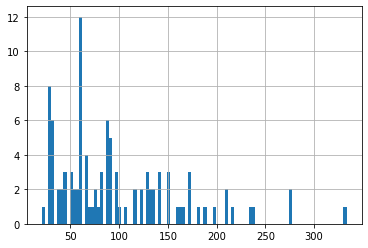

화동
(20, 18)


count      20.000000
mean      625.777059
std       574.367269
min         5.952381
25%       255.757576
50%       500.376471
75%       693.458199
max      2009.731938
Name: 면적당가격, dtype: float64

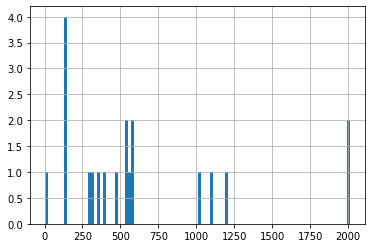

당산동
(35, 18)


count      35.000000
mean      573.833719
std       337.854468
min        90.009001
25%       301.878052
50%       498.550725
75%       808.245992
max      1246.146747
Name: 면적당가격, dtype: float64

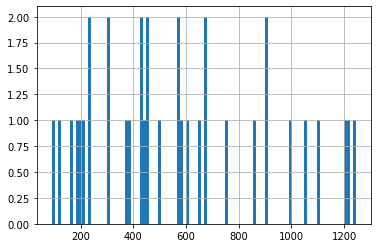

옥인동
(75, 18)


count      75.000000
mean      498.992335
std       213.550436
min       150.000000
25%       344.025168
50%       498.442368
75%       582.022738
max      1148.255814
Name: 면적당가격, dtype: float64

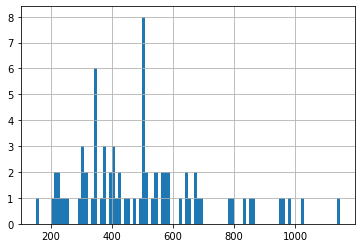

창신동
(224, 18)


count     224.000000
mean      593.225301
std       563.772498
min        31.746032
25%       202.116402
50%       407.422891
75%       891.525035
max      4157.575758
Name: 면적당가격, dtype: float64

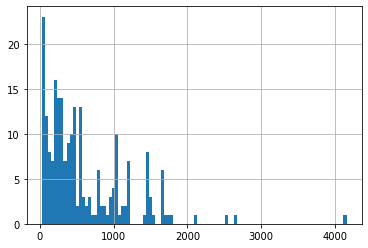

원효로1가
(131, 18)


count     131.000000
mean      708.949979
std       475.213007
min        48.790154
25%       417.748443
50%       550.000000
75%       996.196118
max      2787.770175
Name: 면적당가격, dtype: float64

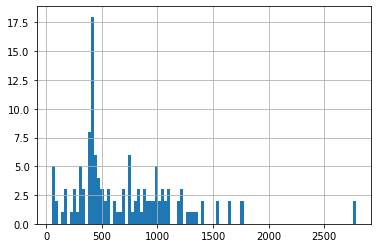

과해동
(80, 18)


count    80.000000
mean     18.829303
std       4.175745
min       9.069212
25%      15.862103
50%      18.541693
75%      21.173278
max      30.248120
Name: 면적당가격, dtype: float64

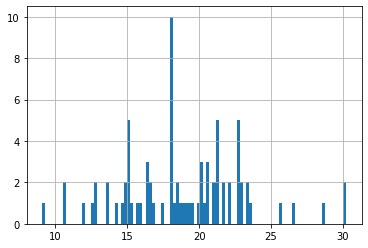

공릉동
(272, 18)


count    272.000000
mean     243.604607
std      173.429012
min        1.965409
25%       99.390244
50%      218.000000
75%      354.128153
max      853.591954
Name: 면적당가격, dtype: float64

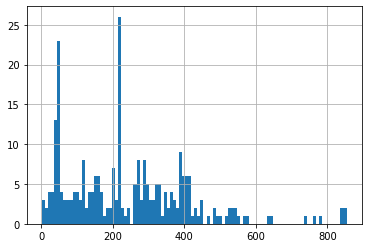

대림동
(366, 18)


count     366.000000
mean      368.961571
std       269.203361
min         7.692308
25%       182.455387
50%       305.050505
75%       483.486559
max      1606.425703
Name: 면적당가격, dtype: float64

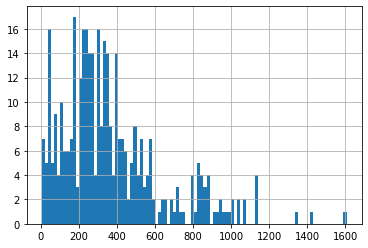

양평동2가
(36, 18)


count     36.000000
mean     331.692226
std      235.471851
min       12.131148
25%      107.255961
50%      288.024390
75%      470.249520
max      907.288737
Name: 면적당가격, dtype: float64

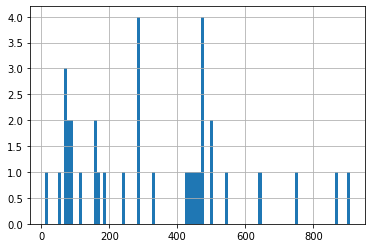

남현동
(149, 18)


count     149.000000
mean      371.970940
std       297.972504
min         4.036046
25%       230.950000
50%       341.800000
75%       483.941606
max      1923.076923
Name: 면적당가격, dtype: float64

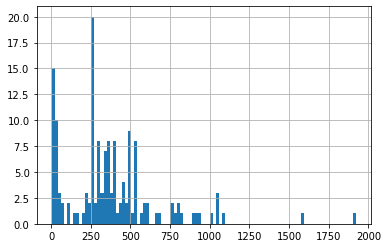

목동
(420, 18)


count     420.000000
mean      311.404210
std       262.742636
min         3.252033
25%       123.570073
50%       267.360154
75%       439.561440
max      2857.142857
Name: 면적당가격, dtype: float64

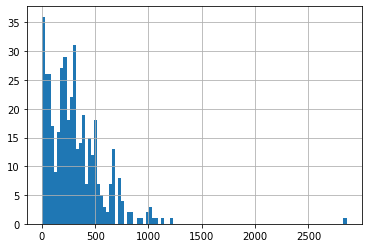

충신동
(89, 18)


count      89.000000
mean      332.606472
std       278.554931
min        23.255814
25%       137.931034
50%       267.929717
75%       451.977401
max      1372.828283
Name: 면적당가격, dtype: float64

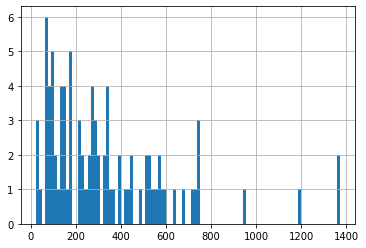

행당동
(631, 18)


count     631.000000
mean      378.524219
std       355.324304
min         4.347826
25%       185.418033
50%       313.000000
75%       421.000000
max      3695.652174
Name: 면적당가격, dtype: float64

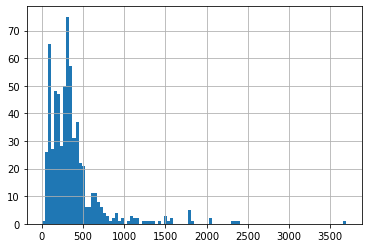

성내동
(256, 18)


count     256.000000
mean      644.290022
std       745.595498
min         5.204461
25%       217.229109
50%       425.388739
75%       732.630952
max      4835.367258
Name: 면적당가격, dtype: float64

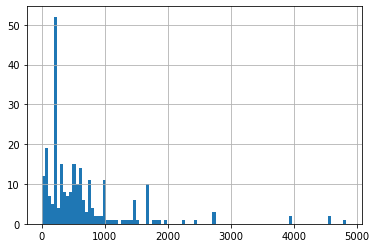

명륜2가
(40, 18)


count      40.000000
mean      716.794813
std       935.920372
min        12.121212
25%       319.522398
50%       398.043882
75%       734.604153
max      5051.250000
Name: 면적당가격, dtype: float64

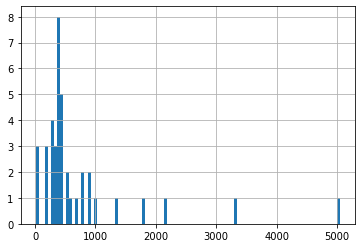

당산동1가
(163, 18)


count     163.000000
mean      446.650953
std       276.652802
min        49.342105
25%       231.781413
50%       386.046512
75%       616.770490
max      1216.533514
Name: 면적당가격, dtype: float64

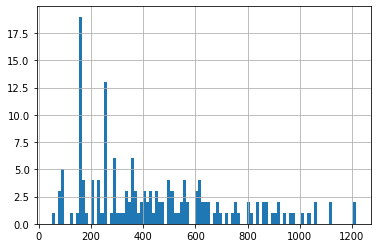

금호동1가
(271, 18)


count     271.000000
mean      357.081092
std       368.637404
min        14.705882
25%       190.586932
50%       266.538462
75%       375.750000
max      3296.565657
Name: 면적당가격, dtype: float64

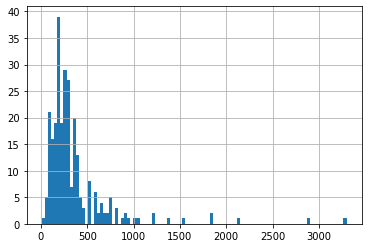

가리봉동
(97, 18)


count      97.000000
mean      308.939187
std       208.620101
min        55.555556
25%       139.000000
50%       264.900662
75%       423.888889
max      1088.480801
Name: 면적당가격, dtype: float64

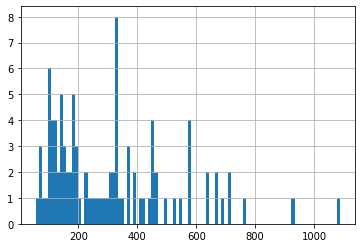

부암동
(420, 18)


count    420.000000
mean     119.123607
std      132.913435
min        0.764543
25%       26.820894
50%       62.957012
75%      163.879665
max      656.526316
Name: 면적당가격, dtype: float64

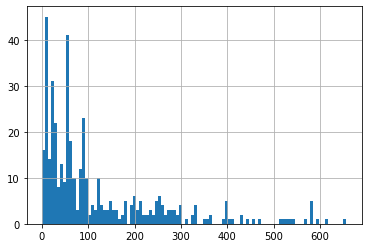

청파동2가
(47, 18)


count      47.000000
mean      469.368285
std       358.321367
min        34.482759
25%       228.617345
50%       399.000000
75%       511.312587
max      1812.500000
Name: 면적당가격, dtype: float64

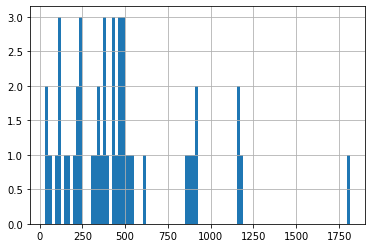

거여동
(349, 18)


count     349.000000
mean      780.474833
std       824.704680
min         1.071429
25%       343.434343
50%       533.269231
75%      1019.827916
max      9077.955272
Name: 면적당가격, dtype: float64

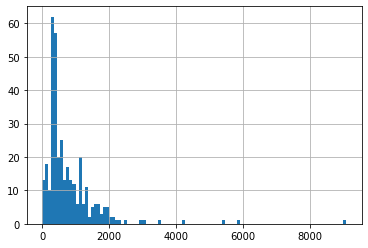

미근동
(74, 18)


count      74.000000
mean     1853.046357
std      1320.746703
min       115.585106
25%       428.869279
50%      2181.514477
75%      2821.126910
max      4942.852113
Name: 면적당가격, dtype: float64

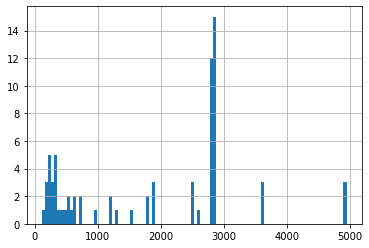

염곡동
(143, 18)


count    143.000000
mean     136.746461
std      151.169078
min        8.611111
25%       47.748588
50%       73.121533
75%      137.796686
max      707.397260
Name: 면적당가격, dtype: float64

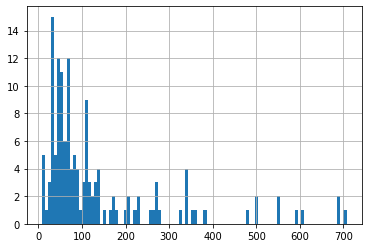

망원동
(158, 18)


count     158.000000
mean      369.966123
std       283.556319
min        30.030030
25%       207.344978
50%       317.769411
75%       426.302611
max      1728.907331
Name: 면적당가격, dtype: float64

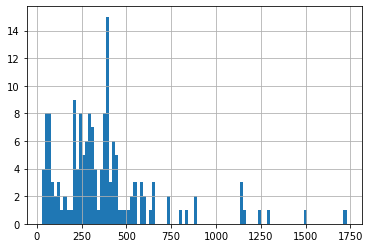

삼선동4가
(26, 18)


count      26.000000
mean      575.232549
std       219.132525
min       224.774775
25%       423.974170
50%       518.072966
75%       769.032875
max      1121.914734
Name: 면적당가격, dtype: float64

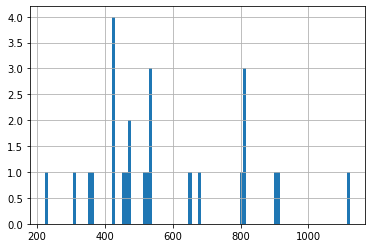

마장동
(182, 18)


count    182.000000
mean     306.287595
std      182.658529
min        1.261034
25%      218.033641
50%      268.184483
75%      383.380062
max      946.234201
Name: 면적당가격, dtype: float64

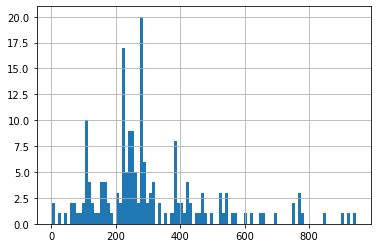

오금동
(119, 18)


count     119.000000
mean      379.678862
std       372.081712
min         3.846535
25%        90.441621
50%       175.994753
75%       641.025641
max      2517.543860
Name: 면적당가격, dtype: float64

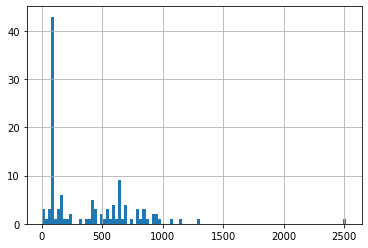

청운동
(85, 18)


count     85.000000
mean     352.121666
std      184.686425
min       27.766092
25%      211.214953
50%      337.428571
75%      466.413902
max      988.822012
Name: 면적당가격, dtype: float64

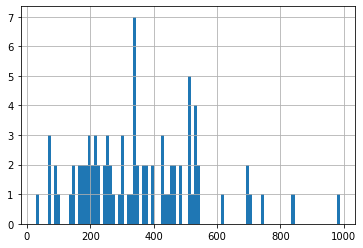

신대방동
(484, 18)


count     484.000000
mean      375.984745
std       329.492437
min         2.564103
25%       132.894737
50%       302.889344
75%       507.134884
max      2352.941176
Name: 면적당가격, dtype: float64

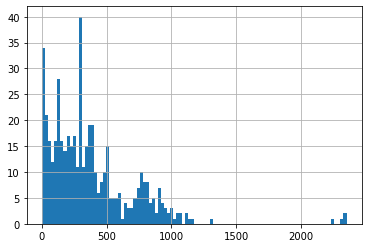

도선동
(130, 18)


count      130.000000
mean      1370.920199
std       2205.308350
min         75.933333
25%        354.319469
50%        558.646136
75%       1765.227060
max      16823.529412
Name: 면적당가격, dtype: float64

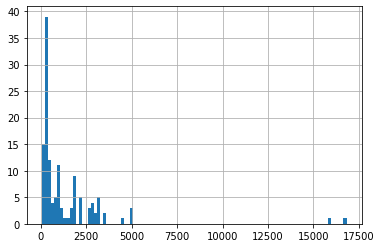

충정로2가
(69, 18)


count      69.000000
mean     1140.251712
std      1440.795414
min        62.916358
25%       275.955056
50%       543.373494
75%       975.975976
max      4942.854578
Name: 면적당가격, dtype: float64

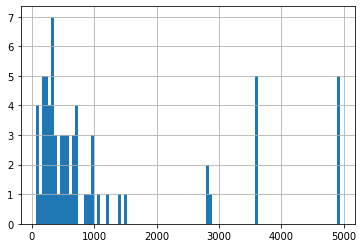

하계동
(136, 18)


count    136.000000
mean     142.441480
std      141.641203
min        3.176044
25%       10.860139
50%       81.208791
75%      272.078704
max      517.000000
Name: 면적당가격, dtype: float64

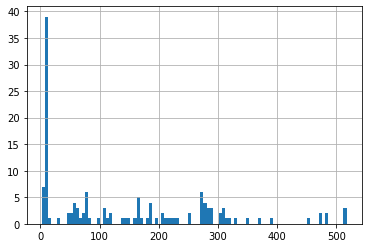

송정동
(62, 18)


count      62.000000
mean      327.083991
std       254.913060
min        37.904394
25%       171.763889
50%       263.629630
75%       410.670505
max      1500.000000
Name: 면적당가격, dtype: float64

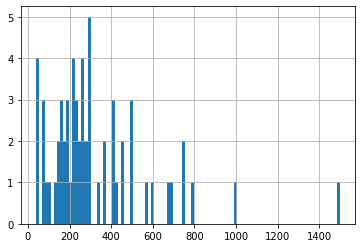

장충동2가
(77, 18)


count      77.000000
mean      559.361807
std       645.323274
min        63.225000
25%       182.648546
50%       388.000000
75%       628.742515
max      3790.000000
Name: 면적당가격, dtype: float64

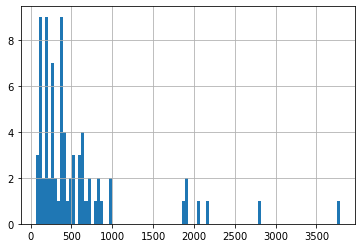

명동2가
(10, 18)


count      10.000000
mean     3748.372245
std      2306.546363
min        42.067308
25%      2347.527473
50%      3446.965951
75%      5908.949432
max      6976.744186
Name: 면적당가격, dtype: float64

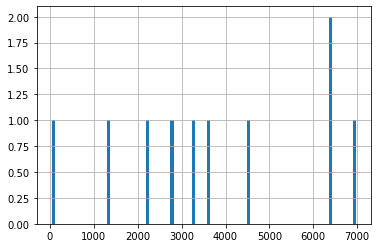

도화동
(105, 18)


count     105.000000
mean      820.172927
std       784.145086
min        24.647887
25%       294.687500
50%       605.882353
75%      1230.000000
max      6384.411765
Name: 면적당가격, dtype: float64

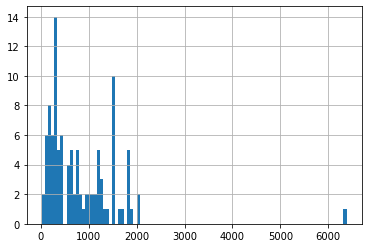

번동
(289, 18)


count    289.000000
mean     123.669670
std      178.161055
min        1.315789
25%       16.079551
50%       19.834973
75%      170.995671
max      829.477946
Name: 면적당가격, dtype: float64

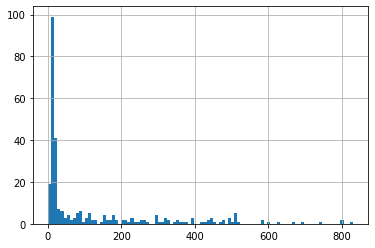

한강로2가
(323, 18)


count      323.000000
mean      1781.029175
std       1494.026652
min          0.132170
25%        768.989873
50%       1451.905626
75%       2577.486264
max      13613.861386
Name: 면적당가격, dtype: float64

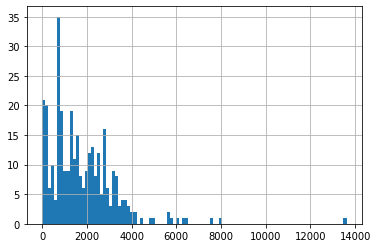

풍납동
(126, 18)


count     126.000000
mean      178.034857
std       202.202709
min        14.792899
25%        57.455977
50%        78.863519
75%       293.395051
max      1437.607821
Name: 면적당가격, dtype: float64

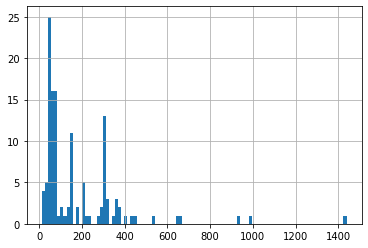

상암동
(247, 18)


count     247.000000
mean      504.885205
std       272.617618
min        37.104072
25%       317.965024
50%       422.511437
75%       634.129353
max      1625.000000
Name: 면적당가격, dtype: float64

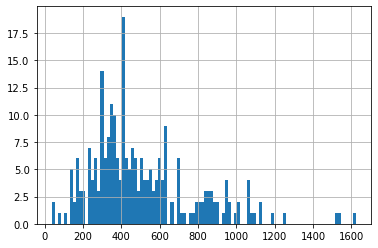

옥수동
(962, 18)


count     962.000000
mean      379.282226
std       249.472898
min        20.576132
25%       264.446874
50%       300.293007
75%       433.621961
max      2388.385827
Name: 면적당가격, dtype: float64

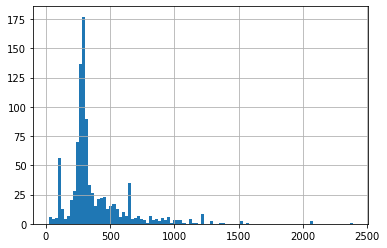

상수동
(162, 18)


count     162.000000
mean      459.295135
std       478.701935
min        19.569472
25%       220.147059
50%       393.258832
75%       539.125000
max      5300.000000
Name: 면적당가격, dtype: float64

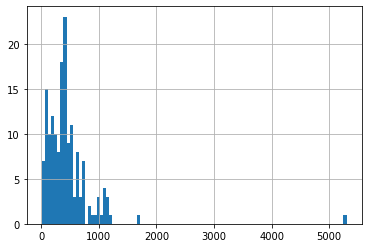

창천동
(152, 18)


count     152.000000
mean      645.038208
std       617.095904
min        57.142857
25%       291.670918
50%       452.000000
75%       485.250000
max      3000.000000
Name: 면적당가격, dtype: float64

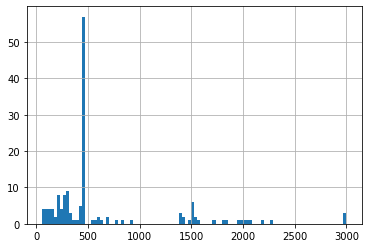

남창동
(64, 18)


count      64.000000
mean     2166.778745
std      1456.230107
min       235.714286
25%       815.217391
50%      2114.538054
75%      3117.016543
max      5376.344086
Name: 면적당가격, dtype: float64

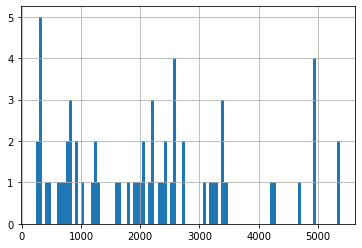

신문로2가
(249, 18)


count     249.000000
mean     1220.346350
std       834.292122
min        77.519380
25%       629.907136
50%      1091.858903
75%      1618.301587
max      4633.682720
Name: 면적당가격, dtype: float64

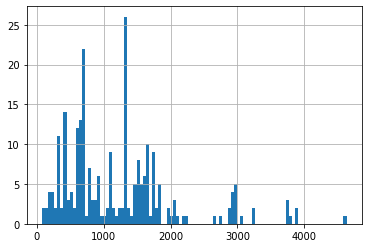

북창동
(32, 18)


count      32.000000
mean     1293.457523
std       530.370396
min       142.882353
25%       951.627486
50%      1024.498144
75%      1886.644835
max      2142.830409
Name: 면적당가격, dtype: float64

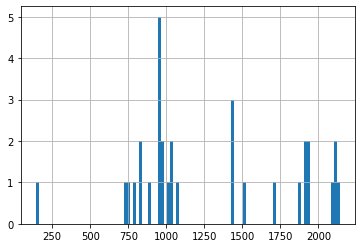

후암동
(325, 18)


count     325.000000
mean      501.281598
std       309.922651
min        75.757576
25%       294.736842
50%       414.583333
75%       614.000000
max      1886.792453
Name: 면적당가격, dtype: float64

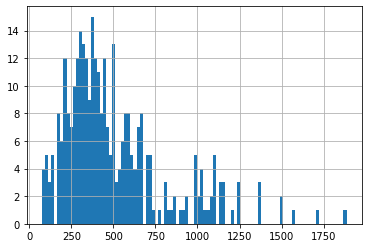

하중동
(37, 18)


count      37.000000
mean      772.551651
std       429.341899
min       169.250000
25%       522.418953
50%       656.395833
75%       808.000000
max      2303.040000
Name: 면적당가격, dtype: float64

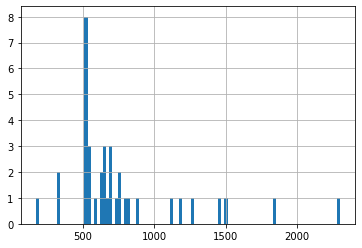

본동
(475, 18)


count     475.000000
mean      473.371051
std       383.367991
min        33.333333
25%       274.000000
50%       348.500000
75%       491.581964
max      3095.600000
Name: 면적당가격, dtype: float64

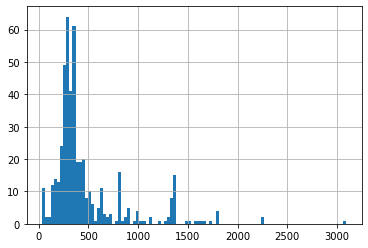

주성동
(53, 18)


count      53.000000
mean      517.287616
std       395.694303
min        91.176471
25%       240.000000
50%       375.000000
75%       749.063670
max      1666.666667
Name: 면적당가격, dtype: float64

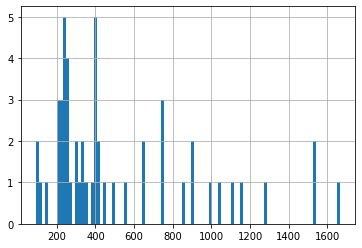

노고산동
(162, 18)


count     162.000000
mean      719.058037
std       695.377360
min        57.142857
25%       313.775129
50%       464.210453
75%       823.038901
max      2717.086835
Name: 면적당가격, dtype: float64

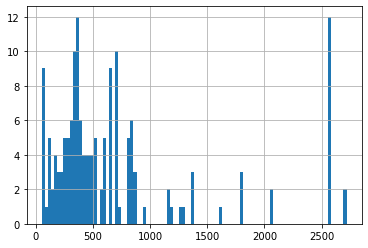

교남동
(35, 18)


count      35.000000
mean     1206.038978
std       739.957976
min       267.857143
25%       794.285714
50%       879.032258
75%      1466.648802
max      3023.255814
Name: 면적당가격, dtype: float64

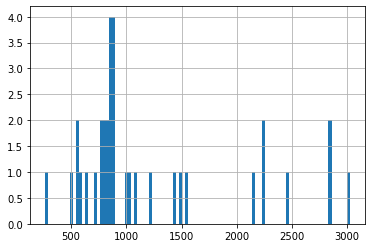

원효로3가
(49, 18)


count      49.000000
mean      867.677638
std       458.340834
min       146.279070
25%       588.235294
50%       771.000000
75%       999.295775
max      1857.894737
Name: 면적당가격, dtype: float64

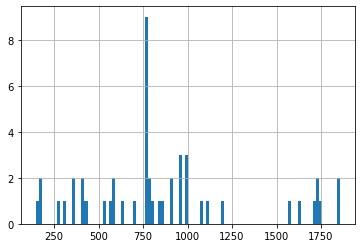

신내동
(346, 18)


count    346.000000
mean     174.362888
std      150.270447
min        6.208389
25%       71.909091
50%      136.098700
75%      233.398186
max      950.000000
Name: 면적당가격, dtype: float64

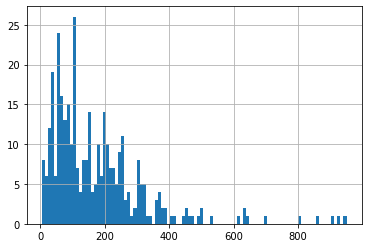

용산동3가
(17, 18)


count      17.000000
mean      867.993598
std       258.037666
min       416.666667
25%       760.975610
50%       804.878049
75%       914.202899
max      1550.387597
Name: 면적당가격, dtype: float64

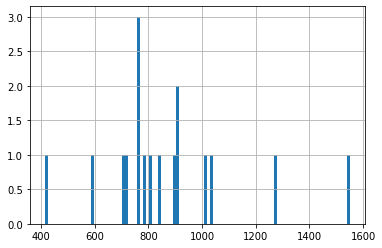

이문동
(342, 18)


count     342.000000
mean      328.022993
std       332.755684
min         1.250000
25%       117.792642
50%       255.625340
75%       441.650690
max      3156.384505
Name: 면적당가격, dtype: float64

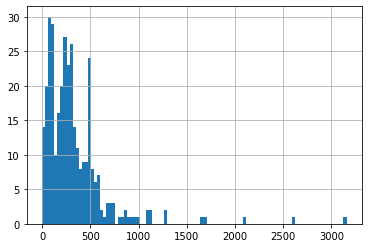

진관동
(424, 18)


count    424.000000
mean      83.603946
std      131.015728
min        0.555556
25%       10.100521
50%       52.459459
75%       83.881667
max      992.315207
Name: 면적당가격, dtype: float64

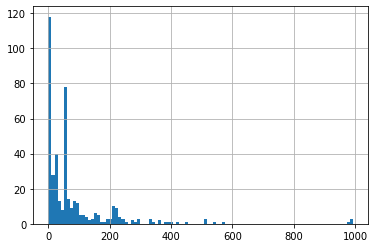

서교동
(158, 18)


count     158.000000
mean      711.022796
std       555.003431
min        12.295082
25%       295.048946
50%       567.472641
75%       934.120480
max      3030.303030
Name: 면적당가격, dtype: float64

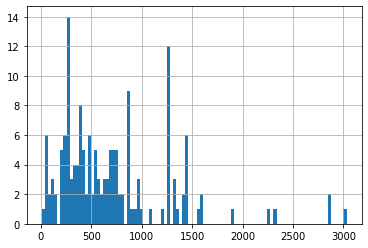

창전동
(140, 18)


count     140.000000
mean      566.093613
std       400.075015
min         4.694836
25%       273.000000
50%       497.770069
75%       849.459174
max      2022.160665
Name: 면적당가격, dtype: float64

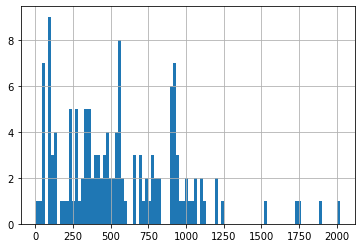

내발산동
(88, 18)


count     88.000000
mean     266.907666
std      164.940292
min       15.539452
25%      180.546258
50%      227.728524
75%      331.895195
max      937.635028
Name: 면적당가격, dtype: float64

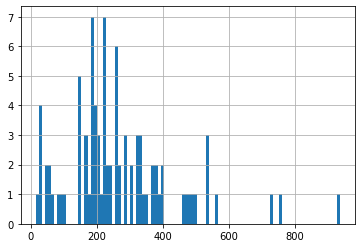

영등포동5가
(75, 18)


count      75.000000
mean     1008.158285
std       616.211027
min       269.784173
25%       571.372084
50%       862.745098
75%      1171.017990
max      2696.629213
Name: 면적당가격, dtype: float64

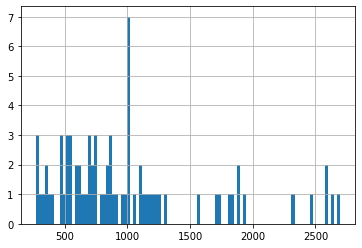

보문동7가
(12, 18)


count     12.000000
mean     195.106049
std      156.203203
min       50.505051
25%       69.696970
50%      151.977323
75%      260.975124
max      530.349650
Name: 면적당가격, dtype: float64

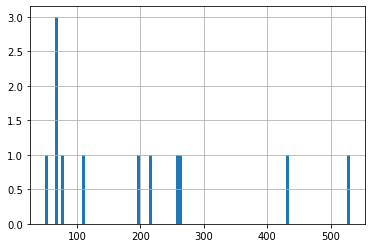

중화동
(180, 18)


count     180.000000
mean      254.656175
std       184.445018
min         0.649351
25%        96.597773
50%       233.155268
75%       370.199230
max      1127.214171
Name: 면적당가격, dtype: float64

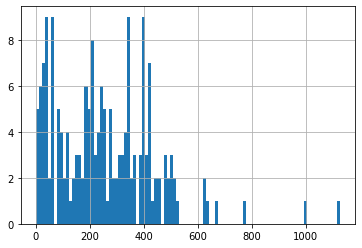

용답동
(164, 18)


count     164.000000
mean      255.130901
std       244.743995
min         8.403361
25%       140.226254
50%       149.514864
75%       281.434961
max      1300.801165
Name: 면적당가격, dtype: float64

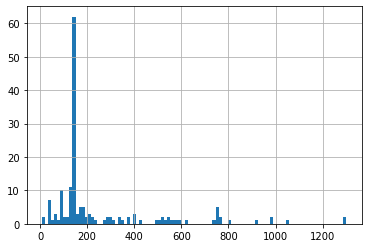

통의동
(37, 18)


count      37.000000
mean      678.028073
std       610.318134
min        39.669421
25%       280.938124
50%       563.131313
75%       869.565217
max      2639.545455
Name: 면적당가격, dtype: float64

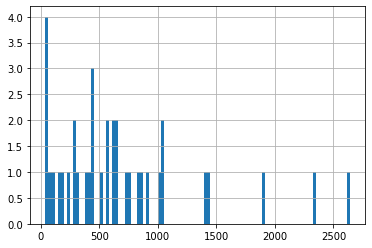

금호동2가
(708, 18)


count      708.000000
mean       401.668643
std       1537.923177
min         63.636364
25%        250.000000
50%        293.377085
75%        353.607552
max      40909.090909
Name: 면적당가격, dtype: float64

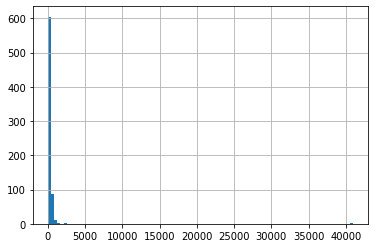

중학동
(137, 18)


count     137.000000
mean     3328.020621
std      1060.108254
min       167.785235
25%      3908.315217
50%      3908.341014
75%      3908.342939
max      3908.354978
Name: 면적당가격, dtype: float64

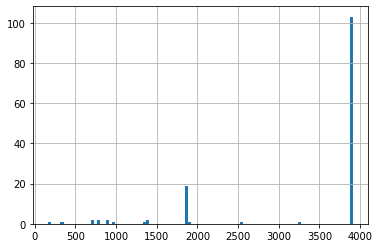

회현동1가
(146, 18)


count      146.000000
mean      1613.814476
std       2156.915689
min         64.301075
25%        455.000000
50%        824.981308
75%       1811.765294
max      13018.113208
Name: 면적당가격, dtype: float64

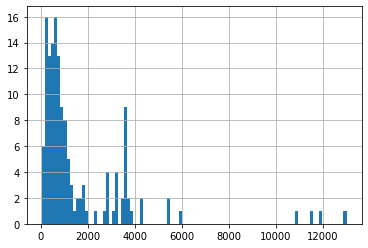

삼선동3가
(103, 18)


count     103.000000
mean      373.238183
std       294.558298
min        63.428571
25%       211.505396
50%       332.387604
75%       495.739799
max      2647.058824
Name: 면적당가격, dtype: float64

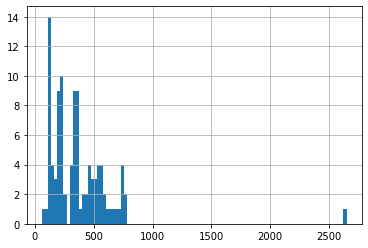

중계동
(372, 18)


count     372.000000
mean      188.639847
std       202.867639
min         0.894108
25%         7.848485
50%       162.079937
75%       270.150560
max      2000.000000
Name: 면적당가격, dtype: float64

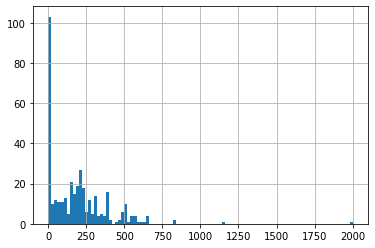

삼전동
(20, 18)


count      20.000000
mean      587.981030
std       340.183395
min       228.136882
25%       283.932408
50%       507.505050
75%       852.762848
max      1192.148694
Name: 면적당가격, dtype: float64

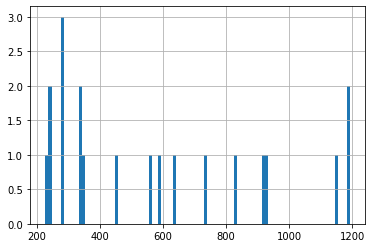

돈암동
(479, 18)


count    479.000000
mean     236.463851
std      140.050717
min        4.320988
25%      146.403055
50%      209.302326
75%      280.637681
max      920.245399
Name: 면적당가격, dtype: float64

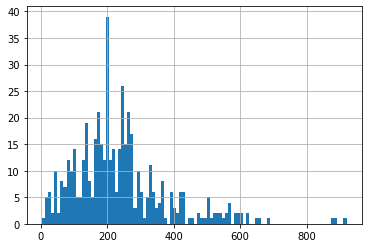

용산동2가
(87, 18)


count      87.000000
mean      437.465147
std       286.117320
min        16.051364
25%       218.351402
50%       387.972842
75%       557.669690
max      1194.285714
Name: 면적당가격, dtype: float64

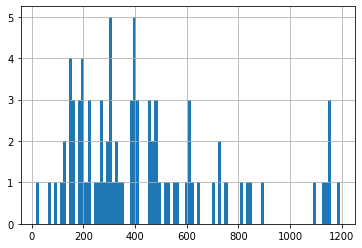

남대문로5가
(94, 18)


count      94.000000
mean     1268.018887
std       870.520500
min       443.655723
25%       619.579832
50%       898.707237
75%      1787.830745
max      4594.142705
Name: 면적당가격, dtype: float64

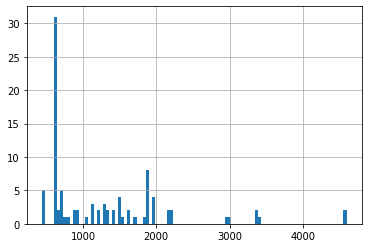

마곡동
(66, 18)


count      66.000000
mean      423.908259
std       503.049881
min        17.948718
25%       173.423077
50%       294.927536
75%       394.868848
max      2527.741007
Name: 면적당가격, dtype: float64

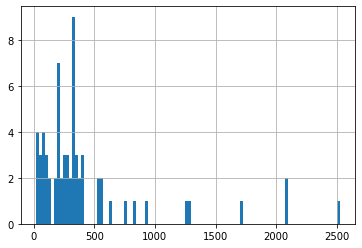

성산동
(253, 18)


count     253.000000
mean      364.695735
std       284.815889
min         9.633911
25%       140.909091
50%       332.743363
75%       506.748154
max      2000.000000
Name: 면적당가격, dtype: float64

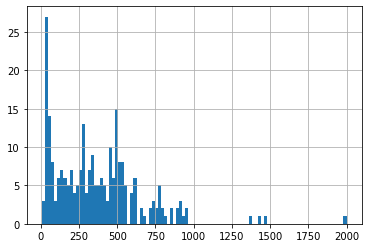

동숭동
(45, 18)


count      45.000000
mean      418.321208
std       342.126808
min        84.033613
25%       178.506375
50%       346.521739
75%       450.000000
max      1683.244070
Name: 면적당가격, dtype: float64

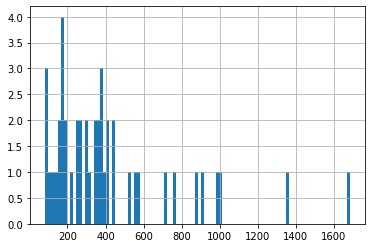

수표동
(146, 18)


count     146.000000
mean     3204.261167
std      1055.044255
min       919.516616
25%      2171.916218
50%      4052.103685
75%      4098.302161
max      4560.096286
Name: 면적당가격, dtype: float64

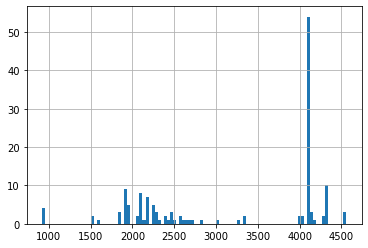

을지로4가
(121, 18)


count     121.000000
mean     1718.877655
std       768.688165
min       188.679245
25%      1214.096645
50%      1694.186047
75%      2056.548043
max      6350.769231
Name: 면적당가격, dtype: float64

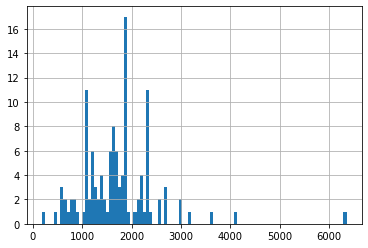

당산동6가
(63, 18)


count      63.000000
mean      461.070147
std       340.542781
min        40.192926
25%       252.100840
50%       384.615385
75%       524.633886
max      1571.091114
Name: 면적당가격, dtype: float64

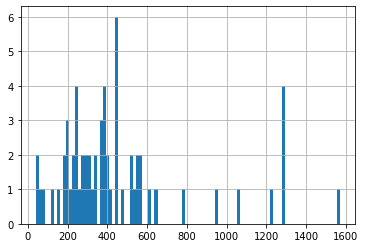

오장동
(37, 18)


count      37.000000
mean      842.709453
std       739.264567
min       100.502513
25%       401.422764
50%       600.000000
75%       697.674419
max      2798.213820
Name: 면적당가격, dtype: float64

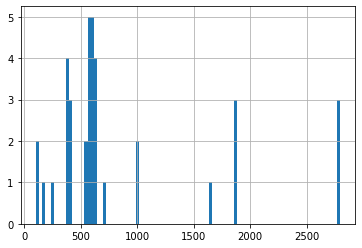

이화동
(97, 18)


count      97.000000
mean      364.484868
std       217.274534
min        29.411765
25%       194.258373
50%       340.000000
75%       421.921708
max      1269.565217
Name: 면적당가격, dtype: float64

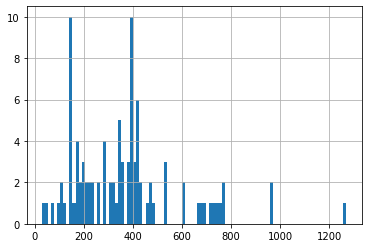

청파동1가
(50, 18)


count      50.000000
mean      401.502377
std       458.007725
min         0.400000
25%       151.312952
50%       293.750000
75%       441.526375
max      2222.222222
Name: 면적당가격, dtype: float64

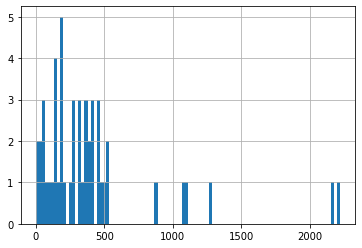

도림동
(444, 18)


count    444.000000
mean     281.278922
std      114.718357
min       22.692890
25%      256.756024
50%      296.490690
75%      314.814815
max      892.145374
Name: 면적당가격, dtype: float64

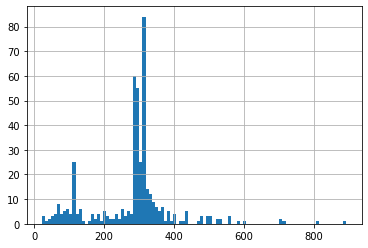

일원동
(29, 18)


count     29.000000
mean     252.016632
std      171.727015
min       17.418719
25%      135.500000
50%      288.470616
75%      330.000000
max      759.000000
Name: 면적당가격, dtype: float64

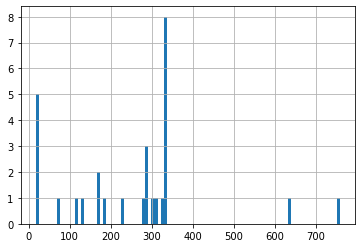

등촌동
(211, 18)


count     211.000000
mean      404.527644
std       382.793490
min         3.203759
25%        57.738907
50%       326.821938
75%       574.112287
max      1813.738101
Name: 면적당가격, dtype: float64

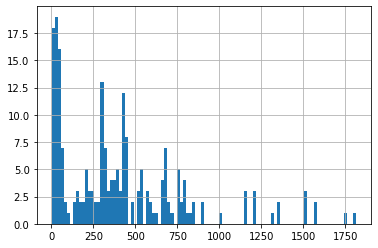

내자동
(19, 18)


count      19.000000
mean     1280.493838
std      1617.501055
min       453.686200
25%       581.126166
50%       750.050505
75%      1270.818584
max      7692.307692
Name: 면적당가격, dtype: float64

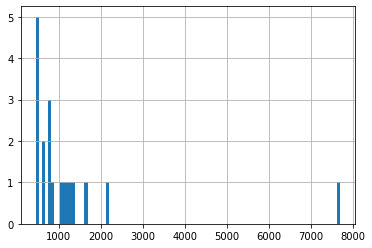

영등포동4가
(56, 18)


count      56.000000
mean      753.205970
std       477.354404
min       198.113208
25%       414.039352
50%       649.682022
75%       861.500000
max      1724.050633
Name: 면적당가격, dtype: float64

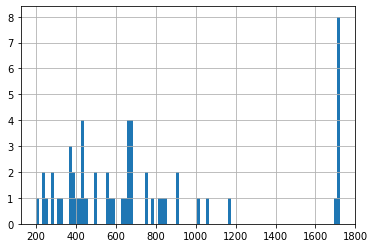

온수동
(206, 18)


count    206.000000
mean     217.851212
std      163.423151
min        3.484928
25%       59.324305
50%      234.741851
75%      315.937563
max      900.000000
Name: 면적당가격, dtype: float64

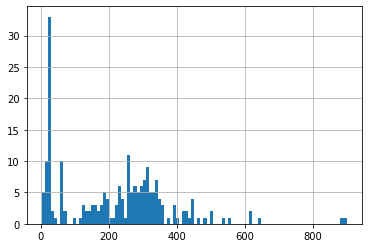

순화동
(43, 18)


count      43.000000
mean     1315.362637
std      1042.983890
min       252.000000
25%       533.391241
50%       894.874552
75%      1680.769728
max      4237.209302
Name: 면적당가격, dtype: float64

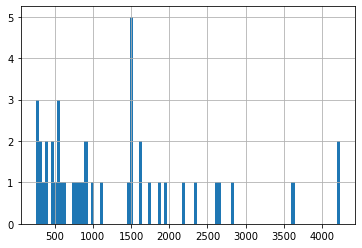

방산동
(21, 18)


count      21.000000
mean     1328.336489
std       539.843760
min       661.246612
25%       910.000000
50%      1327.868852
75%      1776.153846
max      2490.000000
Name: 면적당가격, dtype: float64

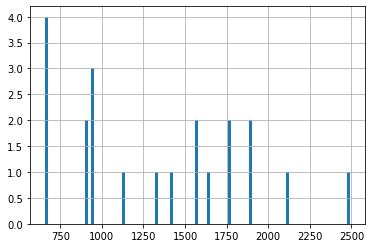

원효로2가
(50, 18)


count      50.000000
mean      691.432015
std       436.581434
min        70.206897
25%       326.482486
50%       615.601727
75%      1012.602740
max      1725.657895
Name: 면적당가격, dtype: float64

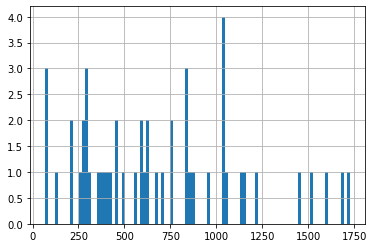

자곡동
(157, 18)


count     157.000000
mean      175.077321
std       373.022406
min         7.100059
25%        66.466980
50%        85.685484
75%       131.665569
max      3735.000000
Name: 면적당가격, dtype: float64

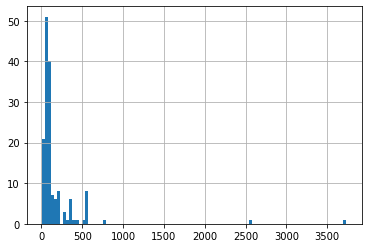

중림동
(182, 18)


count     182.000000
mean      954.238706
std       535.392887
min       178.947368
25%       598.590909
50%       910.998797
75%      1308.389108
max      2420.168067
Name: 면적당가격, dtype: float64

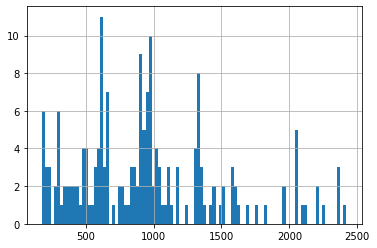

상도1동
(80, 18)


count      80.000000
mean      383.041881
std       232.051833
min         4.587156
25%       209.623397
50%       332.112218
75%       482.702973
max      1060.606061
Name: 면적당가격, dtype: float64

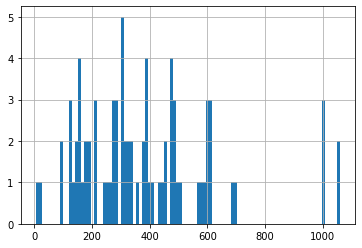

소공동
(18, 18)


count      18.000000
mean     3637.631245
std      1732.086284
min       809.000000
25%      2736.300126
50%      3005.618816
75%      4233.192083
max      7789.696510
Name: 면적당가격, dtype: float64

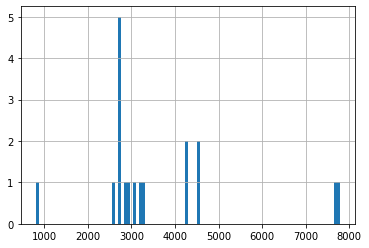

신창동
(15, 18)


count     15.000000
mean     372.572853
std      258.762675
min       74.074074
25%      132.577856
50%      397.954545
75%      581.836750
max      835.996678
Name: 면적당가격, dtype: float64

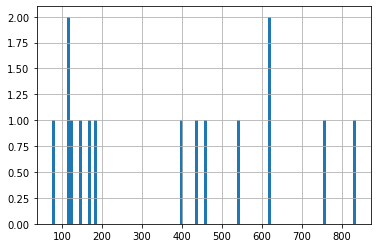

신계동
(440, 18)


count     440.000000
mean      427.336620
std       256.232531
min       115.073529
25%       374.268750
50%       385.357997
75%       410.000000
max      4775.549188
Name: 면적당가격, dtype: float64

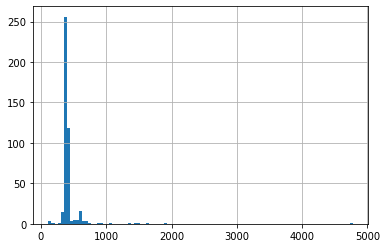

충무로4가
(89, 18)


count      89.000000
mean     1326.432993
std       447.178186
min        67.567568
25%      1110.000000
50%      1367.469880
75%      1602.803738
max      2457.794677
Name: 면적당가격, dtype: float64

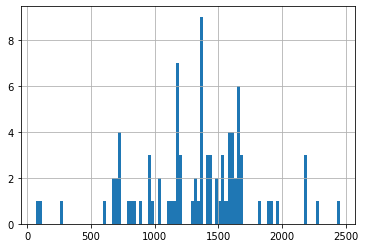

충정로3가
(166, 18)


count     166.000000
mean      932.526443
std       744.346801
min        19.230769
25%       323.750000
50%       593.190416
75%      1991.490792
max      2819.649805
Name: 면적당가격, dtype: float64

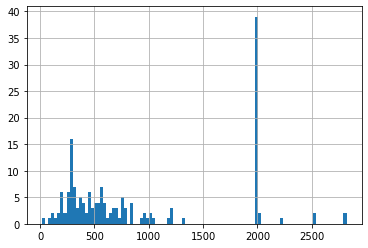

종로5가
(35, 18)


count      35.000000
mean     1695.887958
std       881.626524
min        53.995680
25%       879.553124
50%      1560.000000
75%      2374.533779
max      3410.000000
Name: 면적당가격, dtype: float64

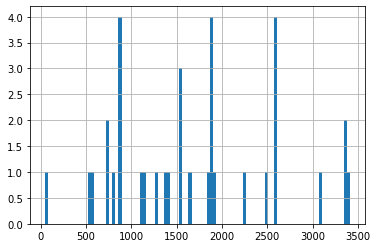

팔판동
(15, 18)


count      15.000000
mean      699.510773
std       338.805472
min       295.058824
25%       403.883173
50%       578.026316
75%       986.204380
max      1185.178571
Name: 면적당가격, dtype: float64

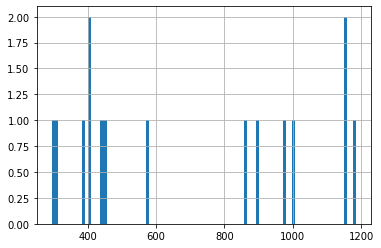

효자동
(19, 18)


count      19.000000
mean      583.574726
std       264.304010
min        90.604027
25%       432.687971
50%       612.244898
75%       791.564567
max      1066.065574
Name: 면적당가격, dtype: float64

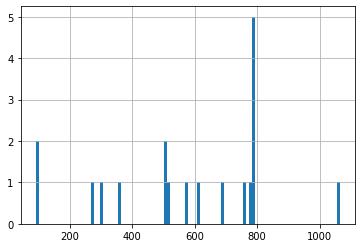

저동2가
(35, 18)


count      35.000000
mean     1880.114205
std       840.189597
min       926.019417
25%      1312.739726
50%      1824.817518
75%      2034.265152
max      4914.772727
Name: 면적당가격, dtype: float64

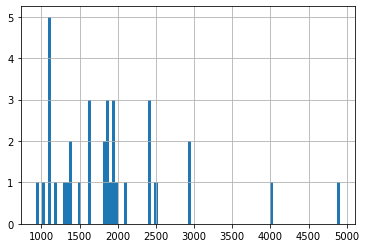

원효로4가
(45, 18)


count      45.000000
mean      490.008889
std       372.870912
min        11.261261
25%       262.467192
50%       442.994012
75%       615.019305
max      2162.162162
Name: 면적당가격, dtype: float64

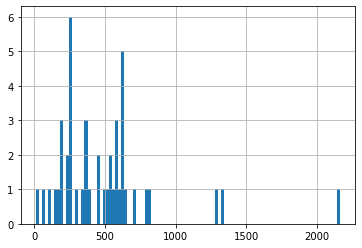

동소문동5가
(20, 18)


count      20.000000
mean      822.109353
std       369.301780
min       253.000000
25%       491.142857
50%       826.941860
75%       997.455991
max      1779.359431
Name: 면적당가격, dtype: float64

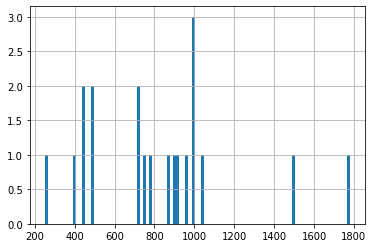

익선동
(37, 18)


count      37.000000
mean      606.468612
std       632.200254
min       100.000000
25%       223.642173
50%       319.488818
75%       804.375804
max      2268.683274
Name: 면적당가격, dtype: float64

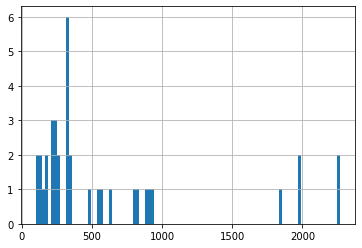

청진동
(264, 18)


count      264.000000
mean      3421.573971
std       2761.274292
min        154.966698
25%       1966.146972
50%       3427.243982
75%       4527.273420
max      39577.464789
Name: 면적당가격, dtype: float64

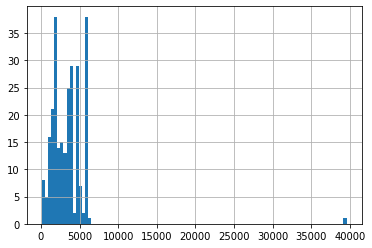

합동
(4, 18)


count      4.000000
mean     210.986903
std      107.467597
min       60.240964
25%      190.780702
50%      234.313641
75%      254.519841
max      315.079365
Name: 면적당가격, dtype: float64

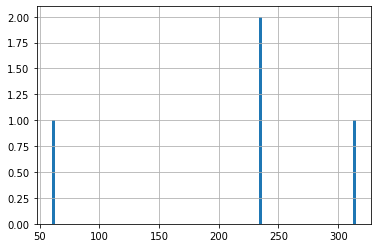

명륜3가
(71, 18)


count     71.000000
mean     250.914308
std      150.376835
min       18.072289
25%      169.315356
50%      228.758170
75%      301.506098
max      869.565217
Name: 면적당가격, dtype: float64

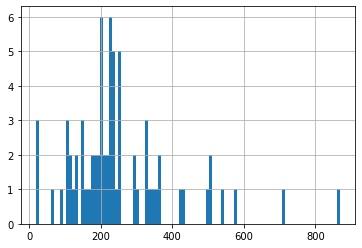

당산동5가
(25, 18)


count     25.000000
mean     376.142050
std      151.689514
min      216.049383
25%      258.934287
50%      283.226292
75%      511.419272
max      654.220779
Name: 면적당가격, dtype: float64

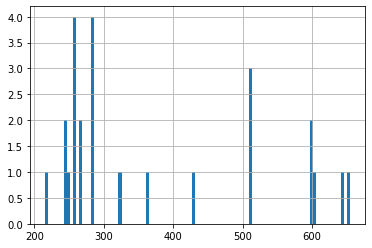

구기동
(297, 18)


count    297.000000
mean      89.609905
std      108.790455
min        1.483680
25%       20.760976
50%       30.848329
75%      116.279070
max      598.000000
Name: 면적당가격, dtype: float64

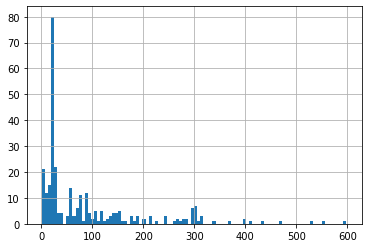

양평동6가
(12, 18)


count     12.000000
mean     359.462432
std      200.163675
min      155.216285
25%      208.591335
50%      327.164324
75%      437.762766
max      852.350839
Name: 면적당가격, dtype: float64

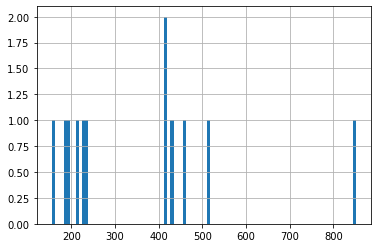

송월동
(99, 18)


count     99.000000
mean     547.588461
std      158.493308
min      197.931034
25%      434.202450
50%      548.064516
75%      673.944444
max      875.000000
Name: 면적당가격, dtype: float64

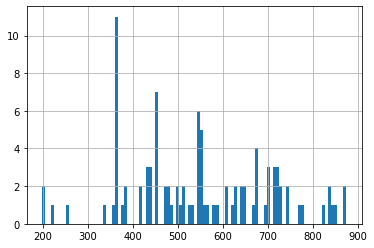

사근동
(68, 18)


count      68.000000
mean      385.203071
std       387.825347
min        44.642857
25%       199.125433
50%       345.989038
75%       442.611111
max      2990.000000
Name: 면적당가격, dtype: float64

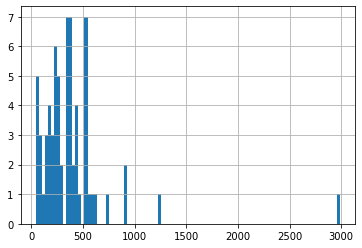

삼청동
(67, 18)


count      67.000000
mean     1045.817000
std      1386.093961
min       199.438202
25%       449.488467
50%       666.129032
75%      1233.137290
max      8335.051546
Name: 면적당가격, dtype: float64

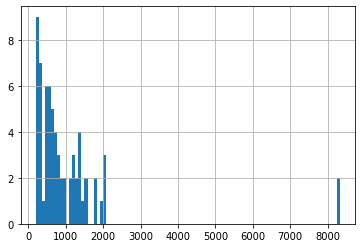

주자동
(5, 18)


count       5.000000
mean      645.560386
std       349.940471
min       390.000000
25%       390.000000
50%       390.000000
75%      1028.888889
max      1028.913043
Name: 면적당가격, dtype: float64

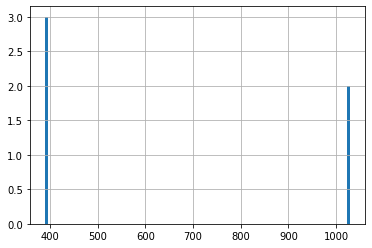

원남동
(45, 18)


count       45.000000
mean       907.621627
std       1594.641253
min        118.000000
25%        279.069767
50%        763.358779
75%       1010.000000
max      11047.506361
Name: 면적당가격, dtype: float64

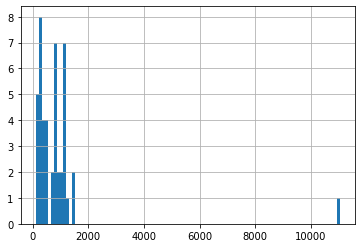

명동1가
(29, 18)


count      29.000000
mean     3270.481978
std      2135.537897
min       998.039216
25%      1687.400898
50%      2534.574468
75%      3921.357466
max      9333.333333
Name: 면적당가격, dtype: float64

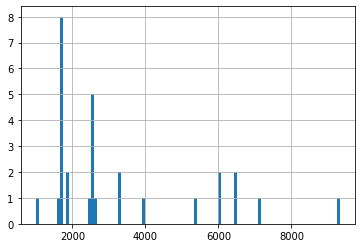

공평동
(41, 18)


count      41.000000
mean     2142.945549
std       918.768102
min       552.765957
25%      1687.289089
50%      2037.037037
75%      2722.127660
max      4426.229508
Name: 면적당가격, dtype: float64

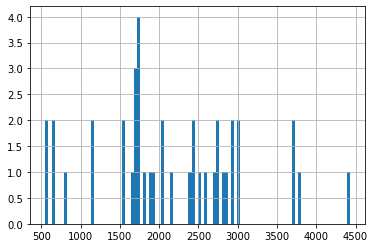

동소문동3가
(7, 18)


count      7.000000
mean     513.115910
std      243.054495
min      235.253772
25%      323.789121
50%      523.542601
75%      627.201138
max      931.034483
Name: 면적당가격, dtype: float64

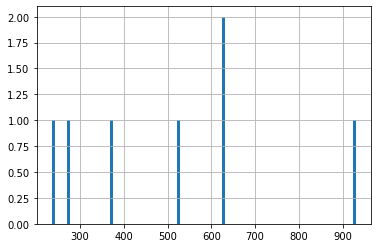

안암동2가
(52, 18)


count     52.000000
mean     306.930351
std      163.361050
min       35.353535
25%      219.086439
50%      278.273810
75%      370.794443
max      704.070407
Name: 면적당가격, dtype: float64

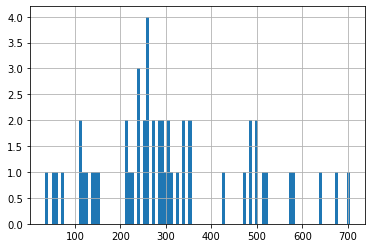

홍지동
(47, 18)


count     47.000000
mean     143.377355
std      151.357167
min       12.500000
25%       50.228938
50%       91.205212
75%      177.521008
max      730.437500
Name: 면적당가격, dtype: float64

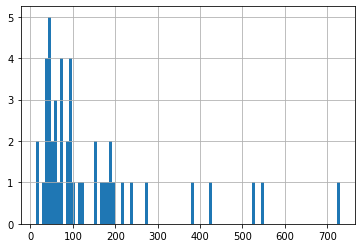

인의동
(9, 18)


count       9.000000
mean     1305.209956
std       828.775619
min       520.295203
25%       796.001048
50%       937.500000
75%      1400.000000
max      3132.212331
Name: 면적당가격, dtype: float64

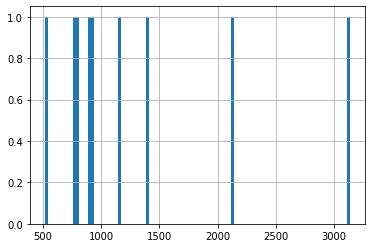

동소문동2가
(19, 18)


count      19.000000
mean      360.950296
std       335.550964
min        54.399880
25%        74.200000
50%       189.516129
75%       626.086957
max      1016.518424
Name: 면적당가격, dtype: float64

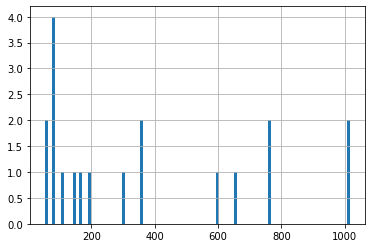

성북동1가
(24, 18)


count      24.000000
mean      481.805617
std       312.810005
min         8.547009
25%       280.087636
50%       389.350688
75%       660.781251
max      1092.920354
Name: 면적당가격, dtype: float64

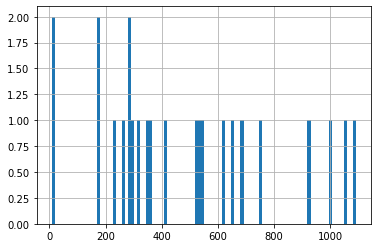

을지로2가
(193, 18)


count     193.000000
mean     2578.825872
std      1419.614819
min       233.653846
25%       898.269525
50%      2774.843299
75%      3783.426573
max      6681.159420
Name: 면적당가격, dtype: float64

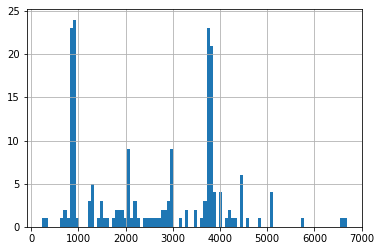

마포동
(43, 18)


count      43.000000
mean      776.448830
std       559.783435
min       133.505989
25%       290.717376
50%       622.775801
75%      1131.115908
max      2019.230769
Name: 면적당가격, dtype: float64

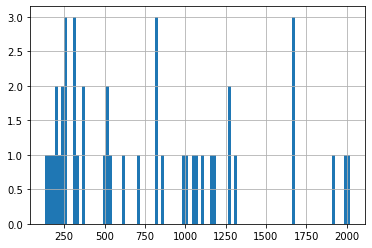

통인동
(17, 18)


count      17.000000
mean      696.393368
std       508.087100
min        36.893764
25%       328.064516
50%       532.307692
75%       790.704537
max      1581.223404
Name: 면적당가격, dtype: float64

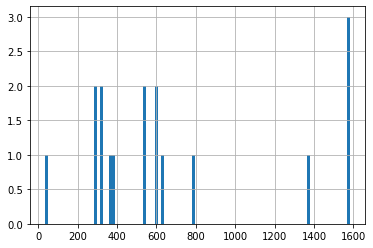

인사동
(150, 18)


count      150.000000
mean      2685.960770
std       1700.902108
min         32.786885
25%       1692.147913
50%       2739.467312
75%       3776.973684
max      12601.260126
Name: 면적당가격, dtype: float64

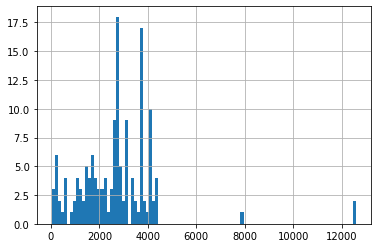

남산동2가
(26, 18)


count      26.000000
mean      548.325167
std       598.650115
min       100.000000
25%       261.878110
50%       362.318841
75%       526.494253
max      2462.380301
Name: 면적당가격, dtype: float64

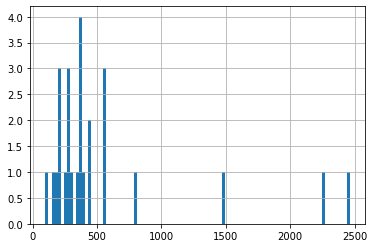

충무로5가
(9, 18)


count       9.000000
mean     1044.956875
std       342.445708
min       634.990440
25%       784.444444
50%       856.793146
75%      1300.400000
max      1499.257568
Name: 면적당가격, dtype: float64

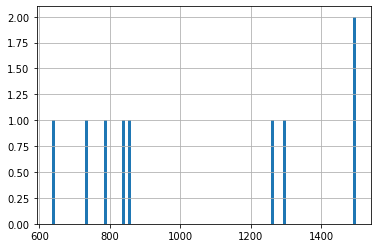

현석동
(63, 18)


count      63.000000
mean      356.210435
std       193.758543
min         3.333333
25%       258.522727
50%       328.500000
75%       365.000000
max      1038.890889
Name: 면적당가격, dtype: float64

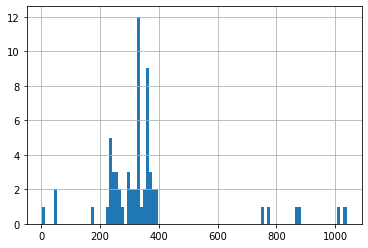

상왕십리동
(261, 18)


count     261.000000
mean      538.147756
std       211.057455
min        87.500000
25%       409.000000
50%       455.529412
75%       657.142857
max      1314.367816
Name: 면적당가격, dtype: float64

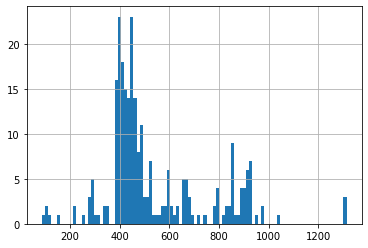

도렴동
(57, 18)


count      57.000000
mean     2606.742460
std      1584.670738
min         5.037783
25%      1806.984127
50%      2421.889401
75%      3076.923077
max      6600.665860
Name: 면적당가격, dtype: float64

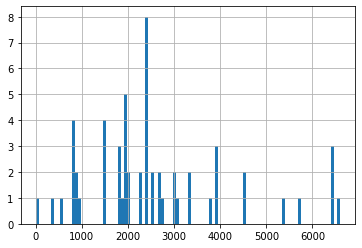

당산동3가
(50, 18)


count     50.000000
mean     420.186395
std      193.156756
min       96.339114
25%      273.502352
50%      359.031710
75%      554.293959
max      907.804878
Name: 면적당가격, dtype: float64

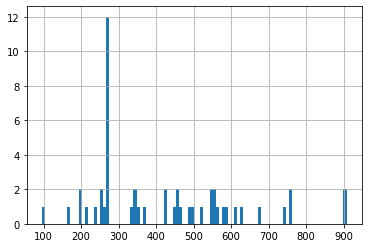

구수동
(26, 18)


count     26.000000
mean     211.697317
std      194.881252
min       25.000000
25%       76.000000
50%      150.462963
75%      320.673077
max      868.306802
Name: 면적당가격, dtype: float64

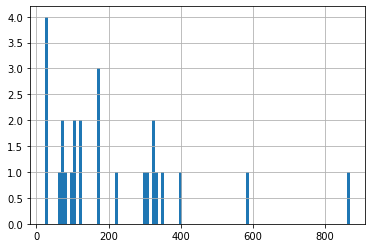

필운동
(13, 18)


count     13.000000
mean     448.064963
std      204.841169
min      168.780488
25%      302.105263
50%      420.127981
75%      597.014925
max      925.471698
Name: 면적당가격, dtype: float64

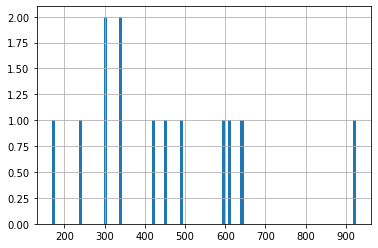

연남동
(44, 18)


count      44.000000
mean      488.567095
std       353.684568
min        10.000000
25%       236.796581
50%       404.719822
75%       605.150771
max      1655.172414
Name: 면적당가격, dtype: float64

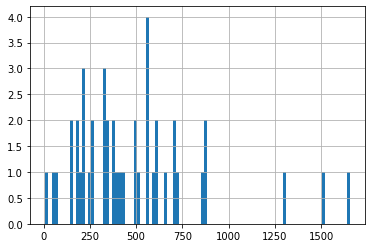

신설동
(47, 18)


count      47.000000
mean      394.494707
std       249.804662
min        49.121481
25%       220.575397
50%       347.826087
75%       526.955085
max      1000.000000
Name: 면적당가격, dtype: float64

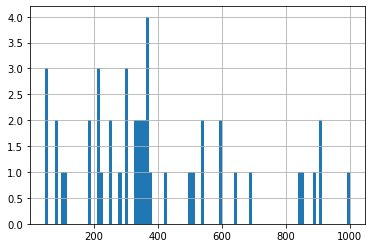

화양동
(150, 18)


count     150.000000
mean      662.284950
std       533.637924
min        18.089286
25%       245.093426
50%       578.377505
75%       982.977019
max      3333.333333
Name: 면적당가격, dtype: float64

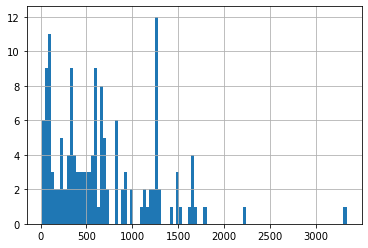

소격동
(28, 18)


count      28.000000
mean      807.897200
std       517.992694
min       151.515152
25%       489.616914
50%       700.000000
75%       825.582754
max      2232.142857
Name: 면적당가격, dtype: float64

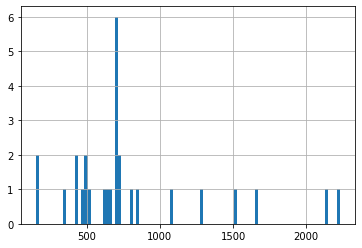

천연동
(13, 18)


count     13.000000
mean     378.334774
std      180.313433
min      133.500000
25%      183.000000
50%      393.371758
75%      508.130081
max      683.453237
Name: 면적당가격, dtype: float64

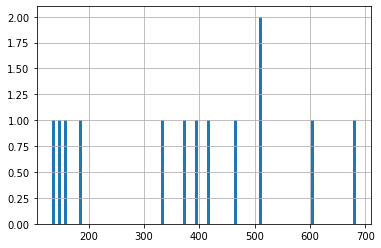

와룡동
(17, 18)


count      17.000000
mean      939.672112
std       402.773485
min       484.581498
25%       654.403962
50%       954.545455
75%      1136.368421
max      2112.727273
Name: 면적당가격, dtype: float64

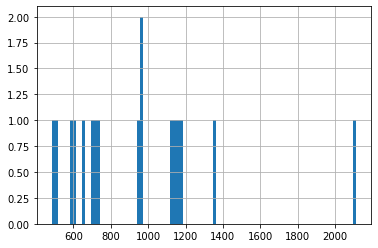

대현동
(134, 18)


count     134.000000
mean      851.912135
std       715.633888
min         9.326172
25%       412.517445
50%       640.611786
75%      1064.002834
max      3916.449086
Name: 면적당가격, dtype: float64

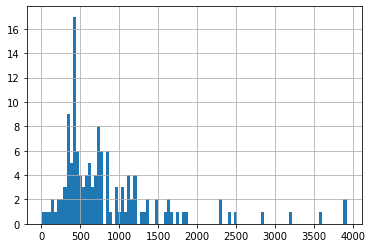

홍익동
(80, 18)


count      80.000000
mean      519.554779
std       264.603810
min        43.735409
25%       432.439490
50%       474.478795
75%       544.817073
max      1865.338983
Name: 면적당가격, dtype: float64

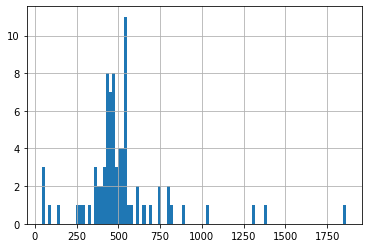

동소문동7가
(62, 18)


count     62.000000
mean     248.703486
std      103.937287
min       19.193858
25%      206.919275
50%      214.559159
75%      300.916981
max      549.973262
Name: 면적당가격, dtype: float64

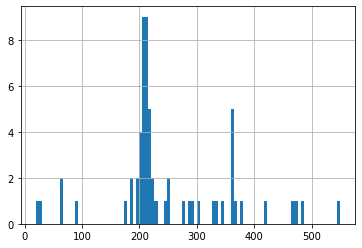

삼각동
(199, 18)


count     199.000000
mean     2544.550212
std      1731.999884
min       875.500000
25%       898.255126
50%      3026.086957
75%      3783.439196
max      8795.625000
Name: 면적당가격, dtype: float64

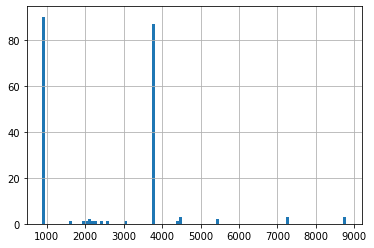

동교동
(120, 18)


count     120.000000
mean     2105.058278
std      1499.904510
min       102.591793
25%       904.331271
50%      1925.129870
75%      2865.200261
max      8182.080292
Name: 면적당가격, dtype: float64

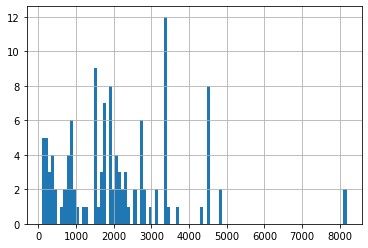

평동
(101, 18)


count     101.000000
mean      761.907723
std       438.093904
min       199.076923
25%       532.837838
50%       640.821918
75%       826.481481
max      2319.486170
Name: 면적당가격, dtype: float64

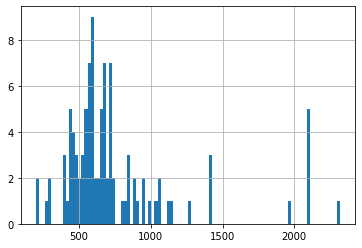

안암동5가
(97, 18)


count      97.000000
mean      440.173967
std       361.125149
min        18.181818
25%       132.283465
50%       375.000000
75%       724.000000
max      2193.548387
Name: 면적당가격, dtype: float64

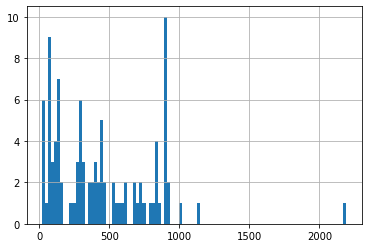

신문로1가
(52, 18)


count      52.000000
mean     2391.385312
std      1265.188489
min       544.496767
25%      1652.434171
50%      2075.000000
75%      3084.723119
max      5391.483254
Name: 면적당가격, dtype: float64

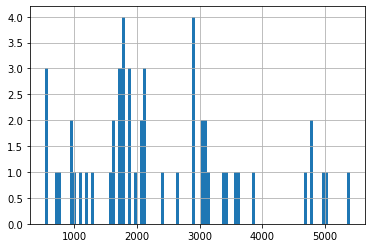

연건동
(25, 18)


count      25.000000
mean      565.584384
std       373.831179
min        68.965517
25%       211.512027
50%       475.882353
75%       950.000000
max      1305.882353
Name: 면적당가격, dtype: float64

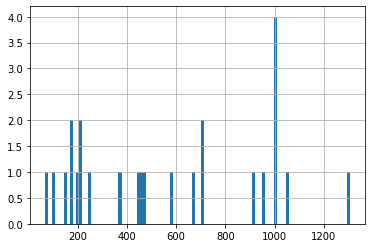

회현동3가
(25, 18)


count      25.000000
mean     1035.741235
std       613.663853
min       404.515522
25%       580.046404
50%       816.718750
75%      1760.544554
max      2539.682540
Name: 면적당가격, dtype: float64

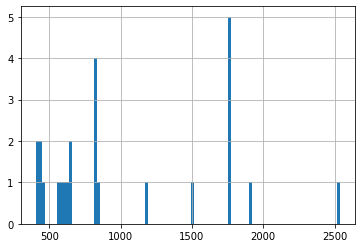

영등포동
(97, 18)


count      97.000000
mean      356.859924
std       217.122862
min        25.974026
25%       214.285714
50%       303.600000
75%       453.000000
max      1250.945776
Name: 면적당가격, dtype: float64

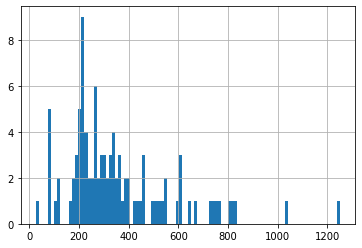

적선동
(1, 18)


count      1.000000
mean     757.062147
std             NaN
min      757.062147
25%      757.062147
50%      757.062147
75%      757.062147
max      757.062147
Name: 면적당가격, dtype: float64

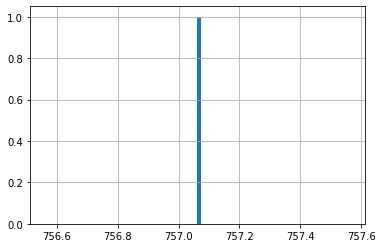

문래동3가
(66, 18)


count      66.000000
mean      625.684772
std       379.199760
min         9.523810
25%       325.010265
50%       603.171235
75%       846.993000
max      1587.804878
Name: 면적당가격, dtype: float64

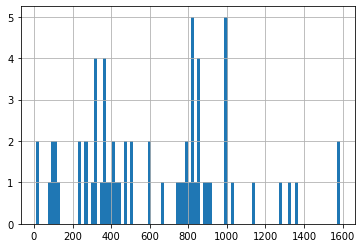

회현동2가
(82, 18)


count      82.000000
mean     1897.118857
std      1525.431379
min        98.039216
25%      1159.445428
50%      1760.564282
75%      1760.570786
max      6963.709677
Name: 면적당가격, dtype: float64

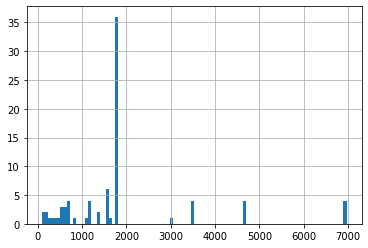

수서동
(64, 18)


count      64.000000
mean      362.124418
std       715.886074
min        11.805556
25%        68.976032
50%        82.011050
75%       161.823665
max      3123.373243
Name: 면적당가격, dtype: float64

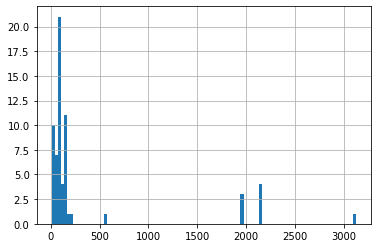

능동
(68, 18)


count      68.000000
mean      419.821393
std       227.776439
min        90.322581
25%       270.775479
50%       400.965428
75%       481.610544
max      1421.487603
Name: 면적당가격, dtype: float64

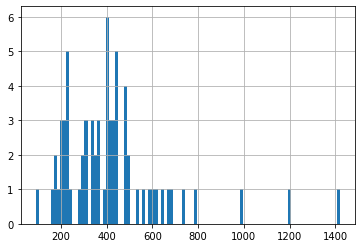

봉익동
(27, 18)


count      27.000000
mean      615.412645
std       594.102880
min        45.121263
25%        68.484848
50%       547.368421
75%       896.448798
max      1926.605505
Name: 면적당가격, dtype: float64

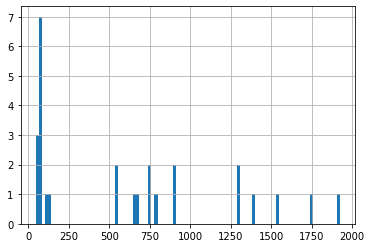

인현동2가
(76, 18)


count      76.000000
mean     1571.967692
std       663.816726
min       567.107750
25%      1042.970073
50%      1532.992424
75%      1873.142888
max      4155.124654
Name: 면적당가격, dtype: float64

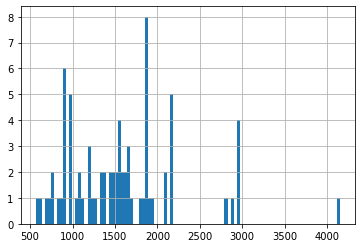

문래동5가
(6, 18)


count      6.000000
mean     371.203800
std       93.859612
min      213.043478
25%      327.411590
50%      419.891667
75%      434.815574
max      438.020883
Name: 면적당가격, dtype: float64

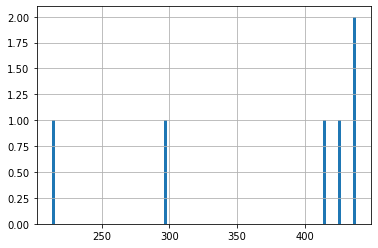

신촌동
(44, 18)


count     44.000000
mean     175.719584
std       82.929682
min       95.108696
25%      114.145814
50%      119.304896
75%      221.012013
max      374.331551
Name: 면적당가격, dtype: float64

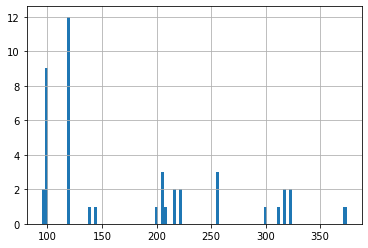

가회동
(55, 18)


count      55.000000
mean      536.047781
std       464.946497
min         9.375000
25%       217.594937
50%       468.000000
75%       726.109894
max      1833.333333
Name: 면적당가격, dtype: float64

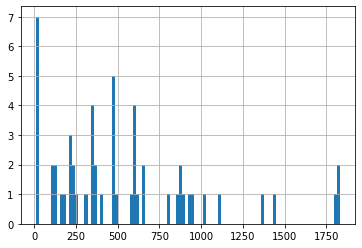

대신동
(10, 18)


count      10.000000
mean      418.407453
std       380.308769
min         4.807692
25%       238.075578
50%       291.367754
75%       459.978486
max      1247.619048
Name: 면적당가격, dtype: float64

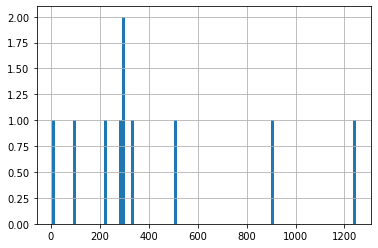

여의도동
(26, 18)


count      26.000000
mean     1399.607481
std      1460.318019
min       159.595960
25%       628.962704
50%       701.481868
75%      1749.485483
max      6892.307692
Name: 면적당가격, dtype: float64

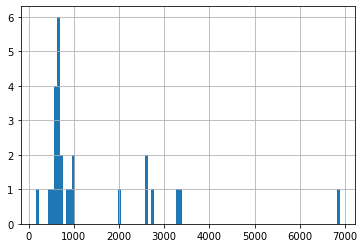

예지동
(56, 18)


count      56.000000
mean     1313.488514
std       845.180687
min        60.362173
25%       669.642857
50%      1163.983740
75%      1687.232911
max      3339.162162
Name: 면적당가격, dtype: float64

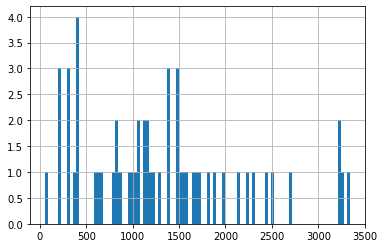

문래동6가
(5, 18)


count      5.000000
mean     385.092493
std      243.643293
min       98.214286
25%      196.428571
50%      398.386283
75%      537.028443
max      695.404880
Name: 면적당가격, dtype: float64

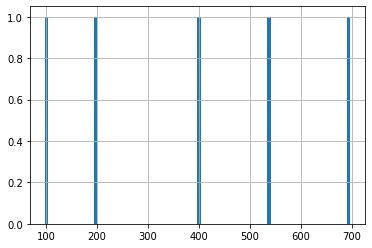

만리동1가
(51, 18)


count      51.000000
mean      724.208014
std       624.851538
min       159.744409
25%       542.468579
50%       572.727273
75%       700.622217
max      4036.144578
Name: 면적당가격, dtype: float64

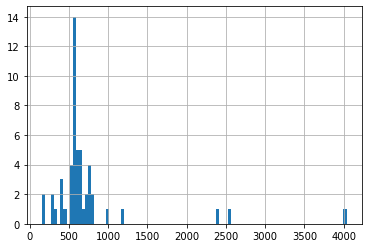

산천동
(11, 18)


count      11.000000
mean      544.471040
std       621.473405
min        74.074074
25%       261.084404
50%       337.815126
75%       516.623366
max      2358.878505
Name: 면적당가격, dtype: float64

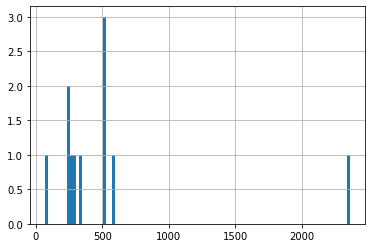

교북동
(49, 18)


count      49.000000
mean      715.476561
std       380.913482
min        25.740026
25%       461.982759
50%       697.674419
75%      1074.475806
max      1587.333333
Name: 면적당가격, dtype: float64

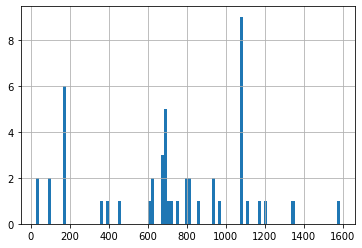

다동
(40, 18)


count      40.000000
mean     2459.506267
std      1213.252343
min       403.225806
25%      1779.731587
50%      2335.022285
75%      2897.120506
max      6190.650110
Name: 면적당가격, dtype: float64

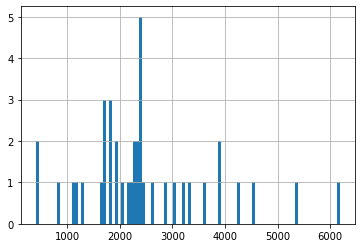

압구정동
(6, 18)


count       6.000000
mean      619.698694
std       894.122312
min         0.262055
25%         2.407358
50%        88.372214
75%      1335.134383
max      1816.711500
Name: 면적당가격, dtype: float64

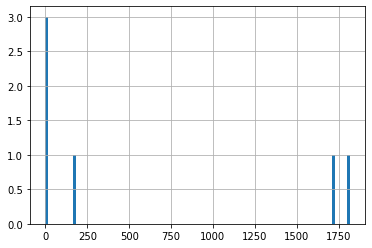

재동
(4, 18)


count      4.000000
mean     576.052189
std      213.252049
min      440.000000
25%      442.386364
50%      487.331650
75%      620.997475
max      889.545455
Name: 면적당가격, dtype: float64

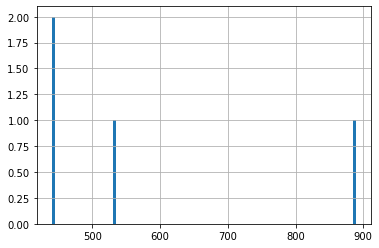

연지동
(25, 18)


count      25.000000
mean     1177.374098
std       572.079866
min       311.526480
25%       918.367347
50%      1047.629500
75%      1331.719128
max      3041.893939
Name: 면적당가격, dtype: float64

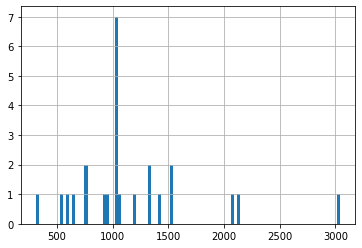

영등포동8가
(47, 18)


count     47.000000
mean     476.337672
std      197.689322
min      119.047619
25%      329.950344
50%      423.000000
75%      628.418803
max      942.982456
Name: 면적당가격, dtype: float64

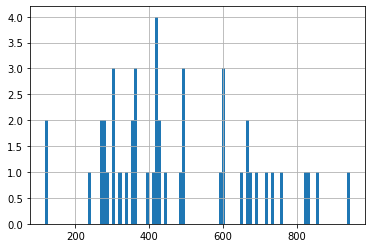

체부동
(20, 18)


count      20.000000
mean      545.269354
std       403.459400
min       151.515152
25%       334.168065
50%       489.598131
75%       606.521138
max      2077.691652
Name: 면적당가격, dtype: float64

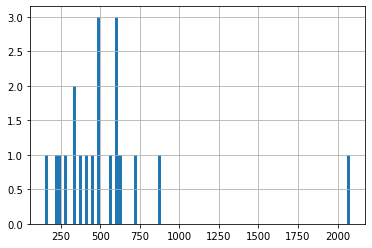

누하동
(26, 18)


count      26.000000
mean      570.186652
std       226.410122
min       178.571429
25%       464.489865
50%       578.480392
75%       621.416540
max      1210.084034
Name: 면적당가격, dtype: float64

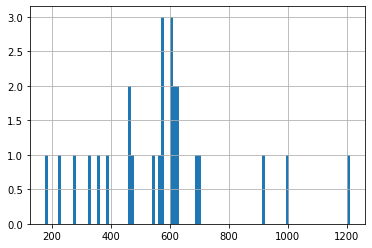

응봉동
(38, 18)


count     38.000000
mean     129.834112
std      100.095950
min       14.534884
25%       55.769951
50%      117.290886
75%      170.020072
max      583.333333
Name: 면적당가격, dtype: float64

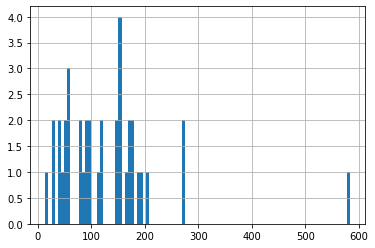

돈의동
(63, 18)


count      63.000000
mean      714.578058
std       451.006078
min       123.076923
25%       392.980701
50%       683.414634
75%       899.800357
max      2340.378165
Name: 면적당가격, dtype: float64

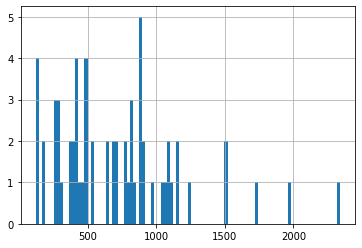

도원동
(21, 18)


count      21.000000
mean      493.273068
std       981.089505
min       162.000000
25%       189.010309
50%       200.563380
75%       215.000000
max      4587.409551
Name: 면적당가격, dtype: float64

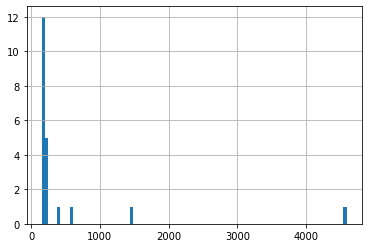

낙원동
(56, 18)


count      56.000000
mean     1077.702990
std       858.067894
min        65.000000
25%       434.339921
50%       774.832916
75%      1607.888745
max      4161.209068
Name: 면적당가격, dtype: float64

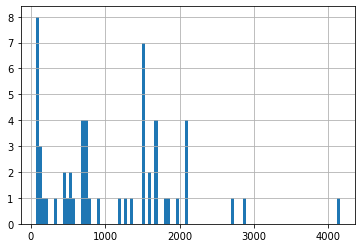

청파동3가
(101, 18)


count     101.000000
mean      525.371696
std       347.591683
min        32.786885
25%       280.000000
50%       400.000000
75%       711.009174
max      1498.453608
Name: 면적당가격, dtype: float64

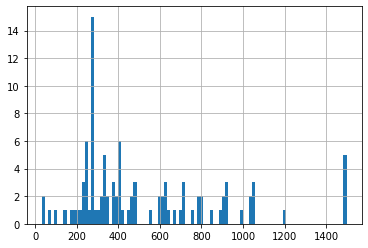

을지로3가
(94, 18)


count      94.000000
mean     1641.743819
std      1053.378467
min       200.445434
25%       776.445576
50%      1414.416092
75%      1792.028986
max      4675.609756
Name: 면적당가격, dtype: float64

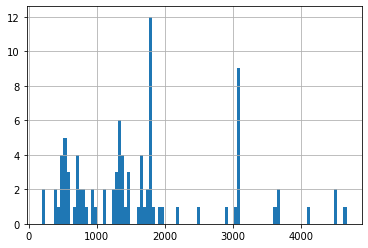

광희동2가
(45, 18)


count      45.000000
mean      814.207196
std       548.961880
min       204.968944
25%       482.333333
50%       617.021277
75%      1008.645533
max      2529.511278
Name: 면적당가격, dtype: float64

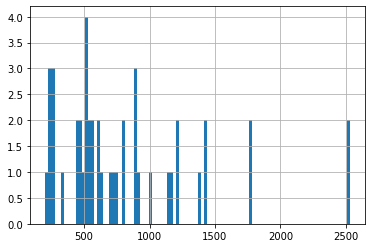

안암동3가
(31, 18)


count     31.000000
mean     249.293058
std      116.717761
min       21.052632
25%      169.561419
50%      252.173913
75%      289.760520
max      475.367329
Name: 면적당가격, dtype: float64

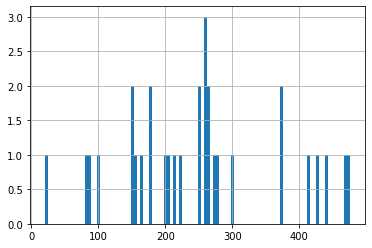

장지동
(25, 18)


count      25.000000
mean      534.921747
std       648.092288
min        50.417661
25%       136.054422
50%       300.429185
75%       532.506850
max      2333.333333
Name: 면적당가격, dtype: float64

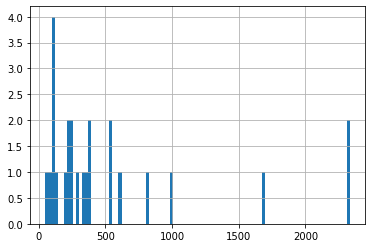

토정동
(12, 18)


count     12.000000
mean     386.770593
std      253.424777
min       96.096096
25%      117.022837
50%      376.393026
75%      543.847732
max      836.820084
Name: 면적당가격, dtype: float64

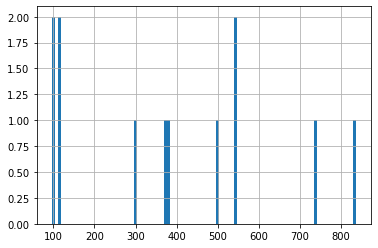

누상동
(21, 18)


count     21.000000
mean     260.212926
std      132.424145
min      100.000000
25%      158.682635
50%      238.191489
75%      315.555556
max      532.000000
Name: 면적당가격, dtype: float64

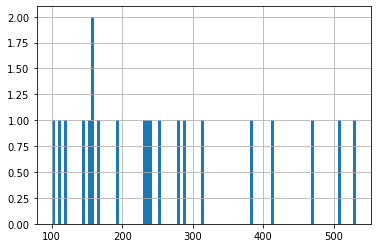

동소문동6가
(27, 18)


count     27.000000
mean     388.620671
std      272.329176
min       56.410256
25%       88.336850
50%      513.849765
75%      619.817004
max      817.815803
Name: 면적당가격, dtype: float64

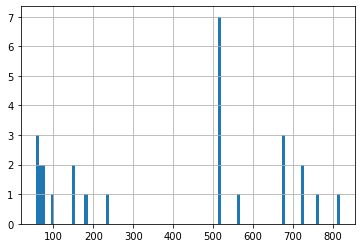

창성동
(11, 18)


count     11.000000
mean     451.564991
std      121.170813
min      272.252346
25%      375.911746
50%      457.333333
75%      520.947368
max      629.696970
Name: 면적당가격, dtype: float64

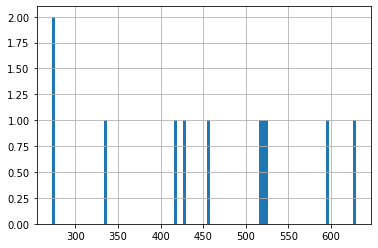

장충동1가
(133, 18)


count     133.000000
mean      803.343814
std       526.031400
min       222.222222
25%       506.808199
50%       720.871863
75%       965.971223
max      3024.595745
Name: 면적당가격, dtype: float64

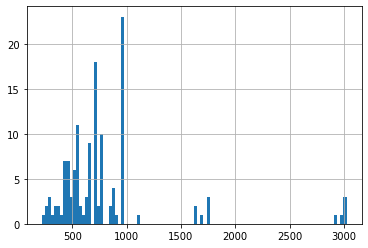

남대문로1가
(2, 18)


count       2.000000
mean     1178.571429
std      1161.675426
min       357.142857
25%       767.857143
50%      1178.571429
75%      1589.285714
max      2000.000000
Name: 면적당가격, dtype: float64

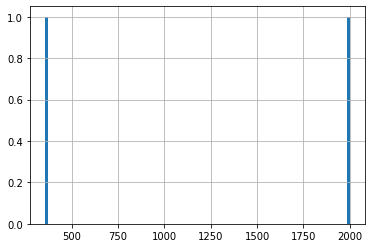

영등포동1가
(126, 18)


count      126.000000
mean       894.884929
std       1336.101354
min         88.082902
25%        435.826905
50%        633.342244
75%        858.510188
max      13694.183865
Name: 면적당가격, dtype: float64

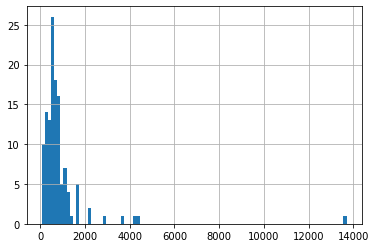

안암동1가
(10, 18)


count     10.000000
mean     492.374590
std      234.104561
min      167.958656
25%      332.281015
50%      533.284883
75%      551.008202
max      925.925926
Name: 면적당가격, dtype: float64

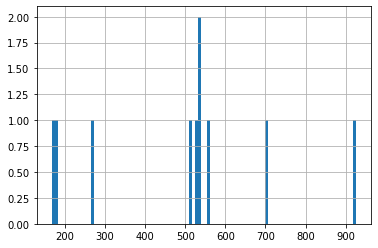

초동
(36, 18)


count      36.000000
mean     1393.008323
std       585.490737
min       214.583333
25%       963.921602
50%      1625.311402
75%      1936.496619
max      1967.599278
Name: 면적당가격, dtype: float64

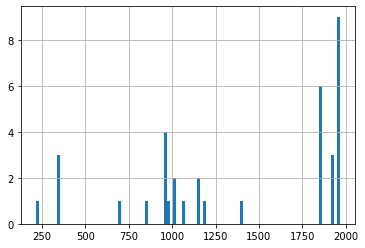

묘동
(7, 18)


count       7.000000
mean     1374.683138
std       811.662455
min         9.090909
25%       856.777494
50%      1816.240310
75%      1954.991359
max      2173.913043
Name: 면적당가격, dtype: float64

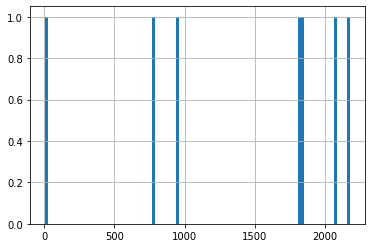

보문동3가
(119, 18)


count    119.000000
mean     275.989035
std      116.204078
min       45.454545
25%      218.000000
50%      280.166667
75%      305.647977
max      709.677419
Name: 면적당가격, dtype: float64

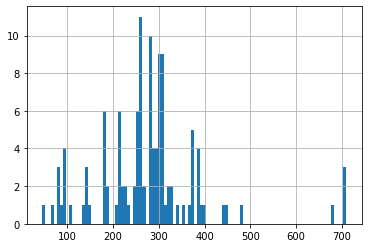

내수동
(6, 18)


count       6.000000
mean      952.473180
std       483.455171
min         4.081633
25%       956.781915
50%      1205.463830
75%      1208.822340
max      1216.000000
Name: 면적당가격, dtype: float64

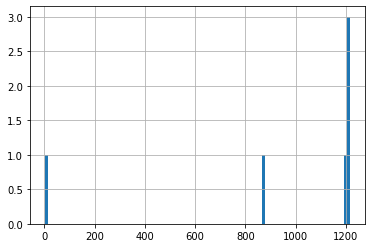

권농동
(15, 18)


count      15.000000
mean      698.866979
std       540.512603
min       263.598326
25%       336.923077
50%       360.000000
75%       909.584980
max      2129.032258
Name: 면적당가격, dtype: float64

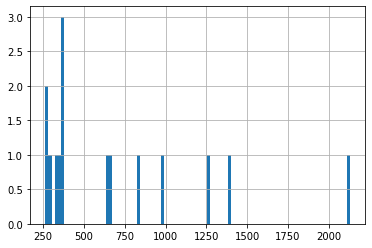

양평동5가
(41, 18)


count      41.000000
mean      684.905527
std       354.369307
min       144.230769
25%       544.178794
50%       625.849057
75%       733.557130
max      2042.253521
Name: 면적당가격, dtype: float64

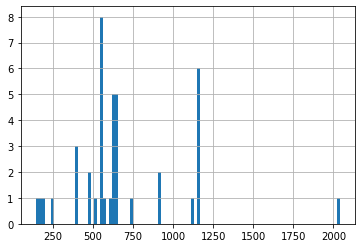

예관동
(34, 18)


count      34.000000
mean     1775.072771
std       877.266406
min       605.187320
25%      1197.500000
50%      1772.908709
75%      2088.850302
max      5119.638826
Name: 면적당가격, dtype: float64

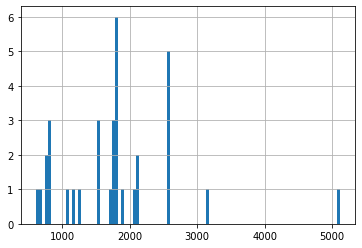

동선동1가
(19, 18)


count     19.000000
mean     567.788805
std      286.200127
min       39.603960
25%      393.912911
50%      508.974359
75%      884.479659
max      928.571429
Name: 면적당가격, dtype: float64

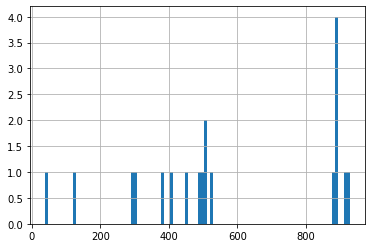

안국동
(15, 18)


count      15.000000
mean      617.438140
std       231.524906
min       402.097902
25%       471.774439
50%       506.329114
75%       657.500496
max      1193.293886
Name: 면적당가격, dtype: float64

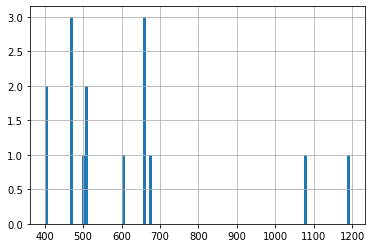

남영동
(15, 18)


count      15.000000
mean      647.207832
std       371.520580
min        75.757576
25%       342.137327
50%       687.230334
75%       941.076100
max      1236.363636
Name: 면적당가격, dtype: float64

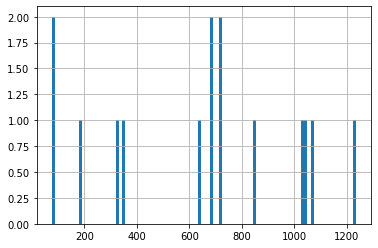

종로6가
(65, 18)


count      65.000000
mean      579.742293
std       545.717577
min         9.523810
25%        76.455026
50%       580.601093
75%       758.000000
max      2333.333333
Name: 면적당가격, dtype: float64

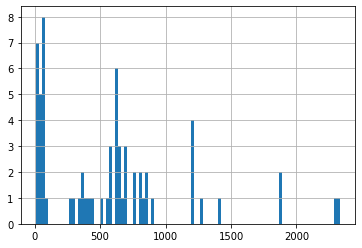

장교동
(42, 18)


count      42.000000
mean     3611.487368
std       764.267936
min      1984.700436
25%      2858.908147
50%      4063.111371
75%      4098.299558
max      4701.854978
Name: 면적당가격, dtype: float64

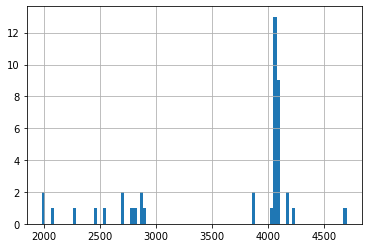

양평동1가
(90, 18)


count     90.000000
mean     533.727745
std      163.416021
min       15.873016
25%      455.513889
50%      527.573661
75%      634.393201
max      822.306238
Name: 면적당가격, dtype: float64

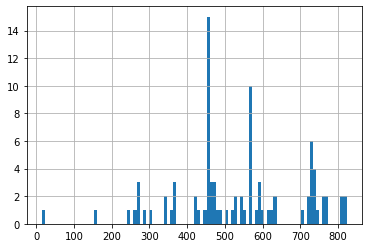

문래동2가
(124, 18)


count     124.000000
mean      558.289541
std       227.263497
min       151.515152
25%       406.250000
50%       560.036980
75%       719.696970
max      1076.923077
Name: 면적당가격, dtype: float64

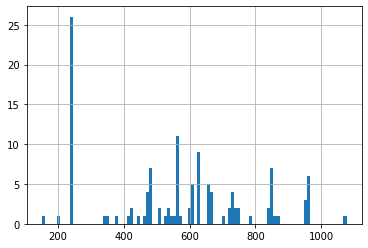

안암동4가
(13, 18)


count     13.000000
mean     311.085453
std      243.169043
min        4.360465
25%       78.369906
50%      246.478873
75%      500.000000
max      777.988615
Name: 면적당가격, dtype: float64

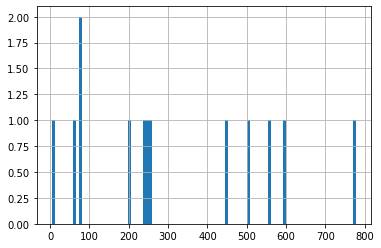

남산동1가
(7, 18)


count       7.000000
mean     1013.046014
std       373.466622
min       545.000000
25%       807.719129
50%       993.831391
75%      1111.775026
max      1713.502399
Name: 면적당가격, dtype: float64

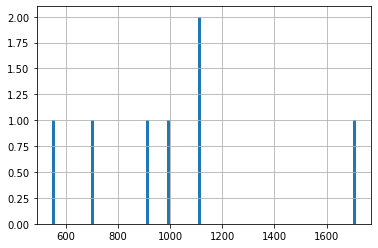

중동
(41, 18)


count     41.000000
mean     264.550842
std      148.903414
min       20.402685
25%       78.823529
50%      300.000000
75%      377.622378
max      571.428571
Name: 면적당가격, dtype: float64

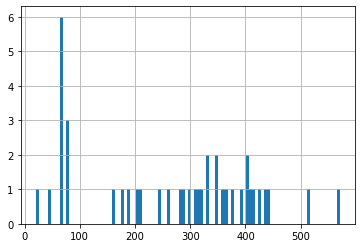

동선동3가
(5, 18)


count      5.000000
mean     473.634819
std      327.873338
min       93.485247
25%      271.293375
50%      454.258675
75%      597.014925
max      952.121872
Name: 면적당가격, dtype: float64

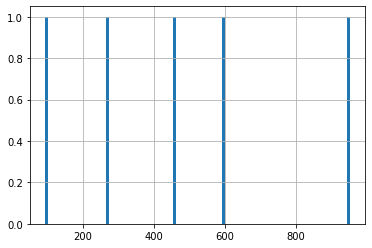

보문동5가
(4, 18)


count      4.000000
mean     403.752557
std      175.222529
min      167.706422
25%      322.009593
50%      455.178368
75%      536.921332
max      536.947072
Name: 면적당가격, dtype: float64

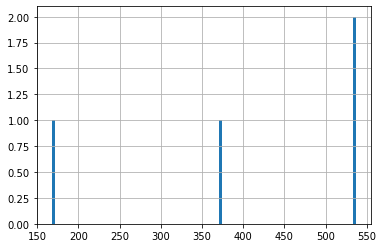

저동1가
(53, 18)


count       53.000000
mean      3673.379340
std       2944.148261
min        166.666667
25%       2260.000000
50%       2775.346939
75%       3855.507868
max      17241.379310
Name: 면적당가격, dtype: float64

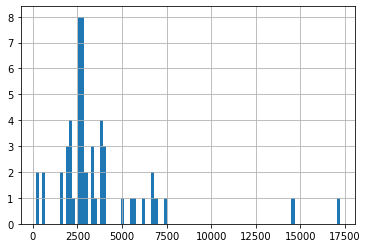

봉래동1가
(16, 18)


count      16.000000
mean     1340.918612
std       515.003702
min       446.130536
25%      1094.782166
50%      1149.421510
75%      1695.662741
max      2356.495468
Name: 면적당가격, dtype: float64

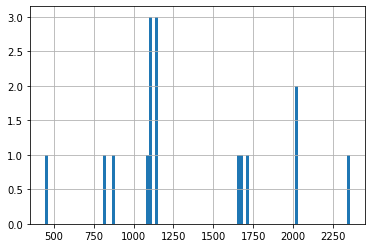

수송동
(18, 18)


count      18.000000
mean     1097.182002
std       437.590660
min       260.869565
25%       822.726097
50%       938.943438
75%      1411.814384
max      2021.903960
Name: 면적당가격, dtype: float64

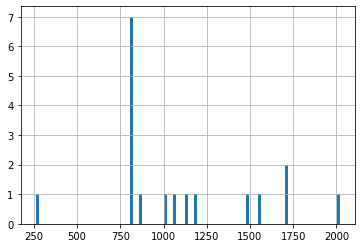

동소문동4가
(6, 18)


count      6.000000
mean     266.713421
std       70.942024
min      176.991150
25%      221.310242
50%      254.964710
75%      322.149871
max      358.722946
Name: 면적당가격, dtype: float64

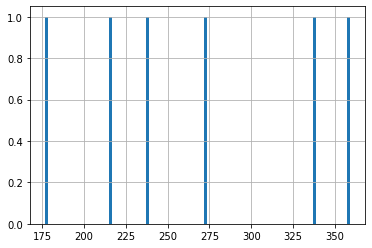

수하동
(264, 18)


count     264.000000
mean     2314.920207
std      1434.082637
min       875.384615
25%       898.243112
50%      1785.095983
75%      3743.503922
max      5089.308756
Name: 면적당가격, dtype: float64

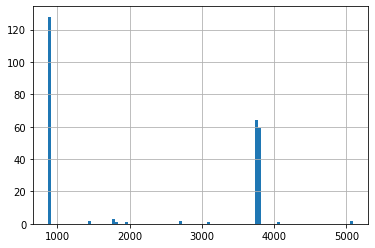

을지로7가
(10, 18)


count      10.000000
mean      666.355089
std       344.007440
min       329.032258
25%       334.458210
50%       683.196485
75%       859.612111
max      1356.800000
Name: 면적당가격, dtype: float64

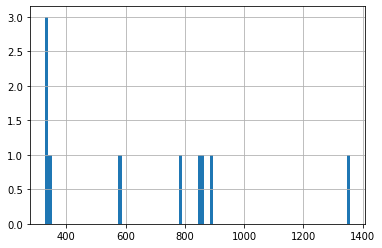

효제동
(46, 18)


count      46.000000
mean     1130.363511
std       921.379360
min        23.448491
25%       576.872478
50%       772.629852
75%      1171.021635
max      3142.857143
Name: 면적당가격, dtype: float64

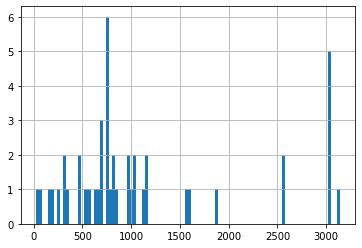

입정동
(107, 18)


count     107.000000
mean     2059.876601
std      1305.386679
min       452.471264
25%      1260.569715
50%      1870.403226
75%      2647.464286
max      9235.294118
Name: 면적당가격, dtype: float64

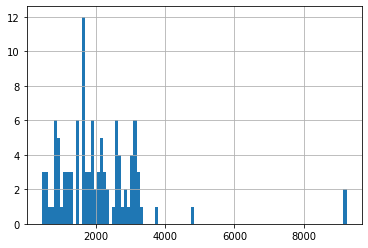

명륜4가
(38, 18)


count      38.000000
mean      572.490678
std       472.522365
min        85.757576
25%       282.525897
50%       430.842881
75%       749.393204
max      2325.581395
Name: 면적당가격, dtype: float64

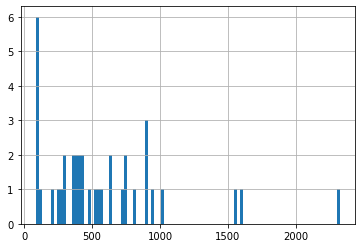

영등포동2가
(75, 18)


count      75.000000
mean      717.136257
std       751.558875
min       200.000000
25%       414.580838
50%       580.720093
75%       725.855363
max      4947.368421
Name: 면적당가격, dtype: float64

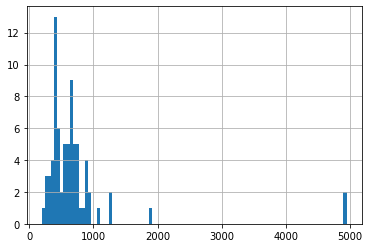

양평동4가
(42, 18)


count      42.000000
mean      499.879953
std       313.952722
min        63.011972
25%       255.937623
50%       454.146682
75%       671.493234
max      1109.085384
Name: 면적당가격, dtype: float64

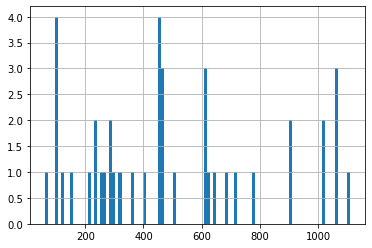

묵정동
(18, 18)


count      18.000000
mean     1110.249552
std       672.134086
min       323.573333
25%       476.127451
50%      1180.103473
75%      1687.141489
max      2464.646465
Name: 면적당가격, dtype: float64

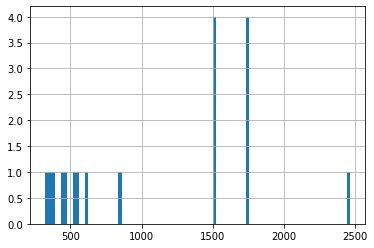

동선동4가
(35, 18)


count      35.000000
mean      526.422777
std       295.293605
min        56.338028
25%       294.093469
50%       481.614573
75%       807.299811
max      1077.266928
Name: 면적당가격, dtype: float64

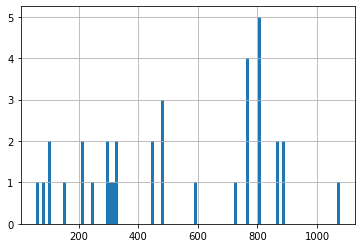

견지동
(7, 18)


count       7.000000
mean     1667.165639
std      1268.068979
min       205.434062
25%       803.581911
50%      1126.573890
75%      2493.766100
max      3743.455497
Name: 면적당가격, dtype: float64

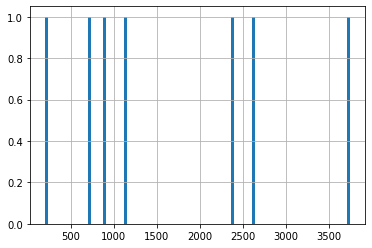

동선동2가
(10, 18)


count     10.000000
mean     500.764368
std      155.676944
min      212.765957
25%      427.924945
50%      518.989874
75%      614.773583
max      708.382527
Name: 면적당가격, dtype: float64

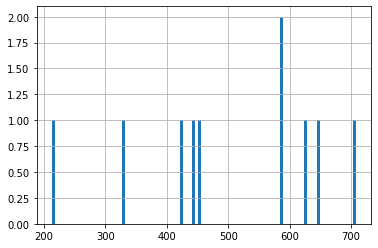

상월곡동
(86, 18)


count     86.000000
mean     199.917294
std      115.480287
min       22.727273
25%      129.585440
50%      165.434783
75%      250.923645
max      660.000000
Name: 면적당가격, dtype: float64

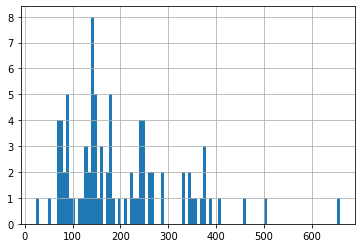

영등포동3가
(70, 18)


count      70.000000
mean     1323.147084
std       593.336373
min       200.427350
25%       957.853252
50%      1426.781258
75%      1614.174131
max      3028.985507
Name: 면적당가격, dtype: float64

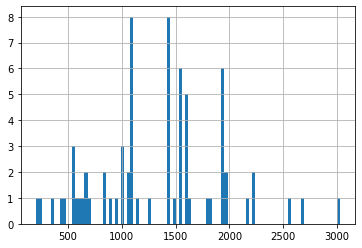

동선동5가
(18, 18)


count     18.000000
mean     302.602829
std      220.314423
min       57.725322
25%      153.579060
50%      265.099979
75%      385.583409
max      943.396226
Name: 면적당가격, dtype: float64

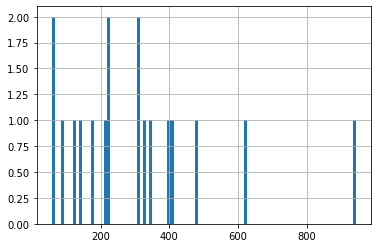

봉원동
(8, 18)


count      8.000000
mean     138.477844
std       92.501068
min       61.538462
25%       63.572343
50%      105.907407
75%      185.589623
max      300.000000
Name: 면적당가격, dtype: float64

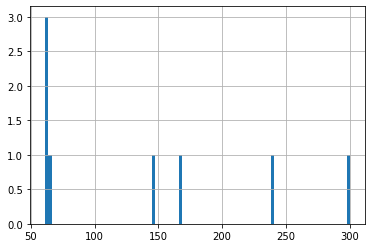

보문동2가
(4, 18)


count      4.000000
mean     314.447305
std       99.882454
min      205.385669
25%      264.304600
50%      303.744148
75%      353.886852
max      444.915254
Name: 면적당가격, dtype: float64

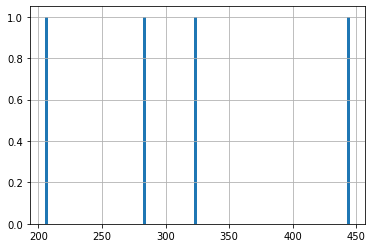

충무로1가
(7, 18)


count        7.000000
mean      7463.297656
std       5351.598297
min       1409.722222
25%       4119.950530
50%       8292.745098
75%       8292.801428
max      17715.112360
Name: 면적당가격, dtype: float64

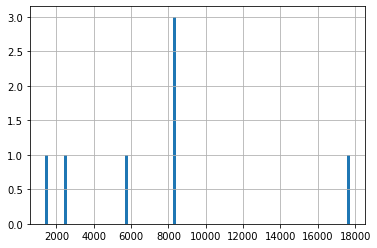

예장동
(22, 18)


count      22.000000
mean      449.024942
std       247.069124
min        48.951049
25%       305.755195
50%       391.853979
75%       615.701337
max      1029.807692
Name: 면적당가격, dtype: float64

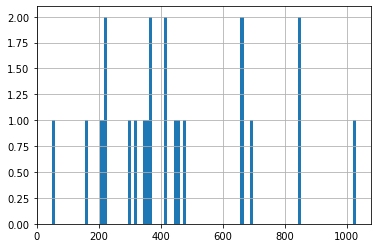

신교동
(12, 18)


count     12.000000
mean     296.352099
std      138.613789
min      153.846154
25%      231.263103
50%      262.500000
75%      291.403891
max      631.000991
Name: 면적당가격, dtype: float64

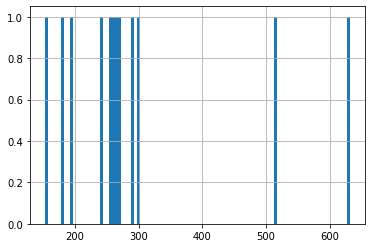

서소문동
(37, 18)


count      37.000000
mean     2667.194428
std      1332.825260
min       789.534884
25%      1539.250898
50%      2343.625378
75%      3327.868852
max      5413.027102
Name: 면적당가격, dtype: float64

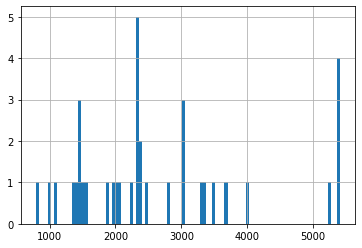

무학동
(2, 18)


count       2.000000
mean      961.861226
std       739.028391
min       439.289240
25%       700.575233
50%       961.861226
75%      1223.147220
max      1484.433213
Name: 면적당가격, dtype: float64

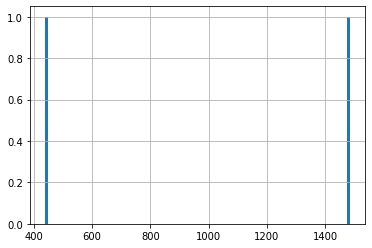

인현동1가
(35, 18)


count      35.000000
mean     1028.363765
std       507.891967
min        85.606061
25%       751.922207
50%       952.121212
75%      1276.342450
max      2535.885167
Name: 면적당가격, dtype: float64

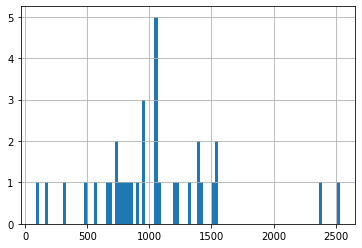

종로1가
(17, 18)


count      17.000000
mean     5520.263879
std      1999.438853
min      1223.546454
25%      3981.340872
50%      5827.308917
75%      6181.512915
max      9046.060606
Name: 면적당가격, dtype: float64

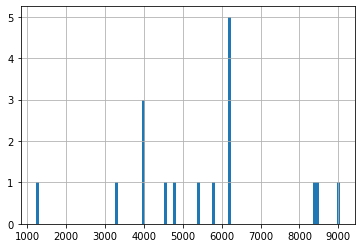

종로3가
(9, 18)


count       9.000000
mean     2868.711717
std      1188.221309
min      1642.036125
25%      2266.944444
50%      2442.748092
75%      2826.646091
max      5357.142857
Name: 면적당가격, dtype: float64

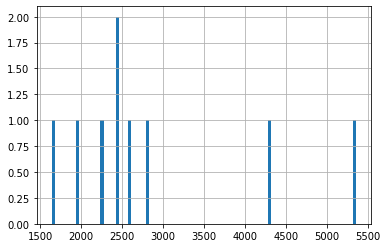

광희동1가
(18, 18)


count      18.000000
mean     1240.076724
std       900.811218
min        27.777778
25%       726.607143
50%       948.722826
75%      1817.858594
max      3404.448479
Name: 면적당가격, dtype: float64

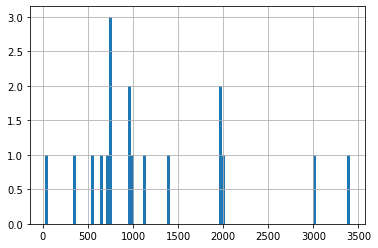

충정로1가
(2, 18)


count      2.000000
mean     442.705100
std      173.531216
min      320.000000
25%      381.352550
50%      442.705100
75%      504.057650
max      565.410200
Name: 면적당가격, dtype: float64

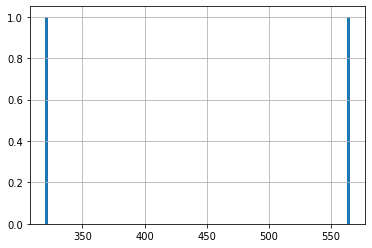

정동
(16, 18)


count      16.000000
mean      992.181322
std       535.141458
min       430.210325
25%       509.508259
50%       854.178779
75%      1314.465474
max      1844.712182
Name: 면적당가격, dtype: float64

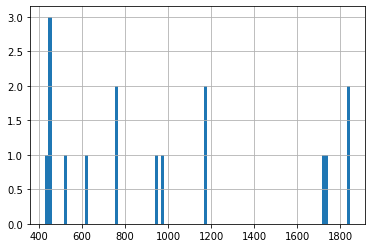

남대문로4가
(9, 18)


count       9.000000
mean     2449.159628
std       844.763842
min      1694.249649
25%      1862.068966
50%      2189.873418
75%      2678.571429
max      3821.796760
Name: 면적당가격, dtype: float64

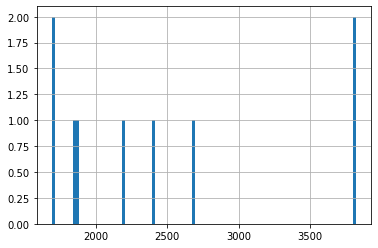

동소문동1가
(6, 18)


count      6.000000
mean     262.500620
std      119.692024
min       36.101083
25%      243.828829
50%      318.947980
75%      336.016448
max      340.511628
Name: 면적당가격, dtype: float64

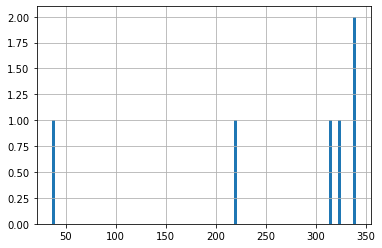

관훈동
(57, 18)


count      57.000000
mean     1021.174991
std       808.678403
min        47.017338
25%       380.067568
50%       816.000000
75%      1187.809798
max      2623.743280
Name: 면적당가격, dtype: float64

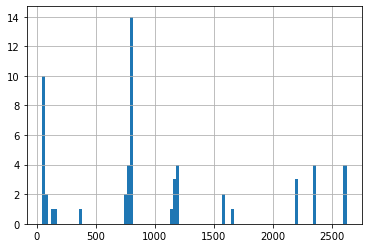

을지로5가
(35, 18)


count      35.000000
mean     1660.217109
std       713.774415
min       416.370107
25%       998.936641
50%      1489.361702
75%      2385.839216
max      2823.719242
Name: 면적당가격, dtype: float64

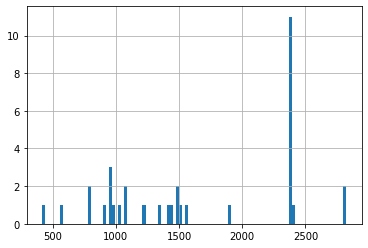

을지로1가
(2, 18)


count       2.000000
mean     2073.214423
std       942.899503
min      1406.483791
25%      1739.849107
50%      2073.214423
75%      2406.579739
max      2739.945055
Name: 면적당가격, dtype: float64

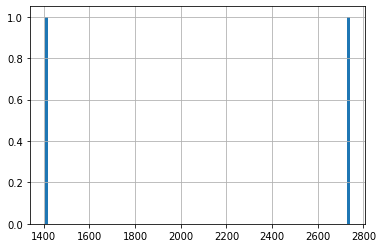

충무로3가
(6, 18)


count       6.000000
mean     1181.586481
std       264.075336
min       817.032967
25%       989.935304
50%      1246.929134
75%      1410.000000
max      1410.000000
Name: 면적당가격, dtype: float64

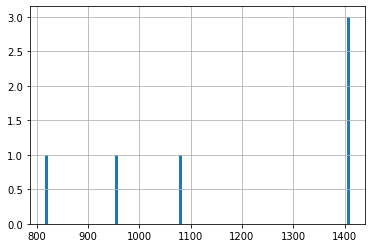

남산동3가
(15, 18)


count      15.000000
mean      721.929836
std       312.315956
min       365.517241
25%       538.794237
50%       663.546167
75%       911.432030
max      1313.000000
Name: 면적당가격, dtype: float64

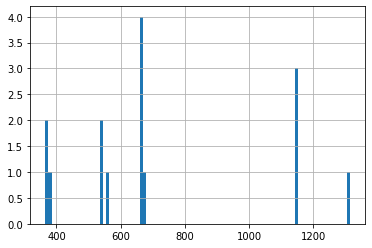

봉래동2가
(2, 18)


count      2.000000
mean     539.523488
std      234.115992
min      373.978482
25%      456.750985
50%      539.523488
75%      622.295990
max      705.068493
Name: 면적당가격, dtype: float64

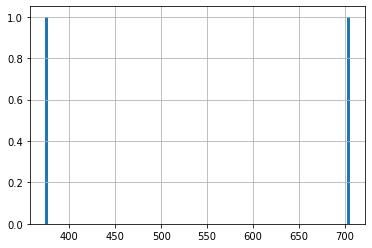

양평동3가
(33, 18)


count      33.000000
mean      571.971620
std       354.112557
min       121.061065
25%       312.330827
50%       446.380876
75%      1047.400000
max      1074.718526
Name: 면적당가격, dtype: float64

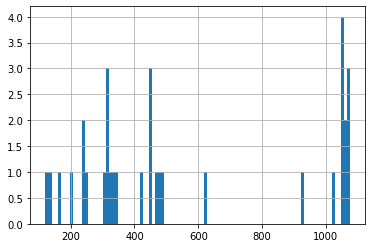

문래동1가
(24, 18)


count      24.000000
mean      428.692133
std       267.881051
min        99.505155
25%       249.743773
50%       355.582333
75%       554.119876
max      1103.264095
Name: 면적당가격, dtype: float64

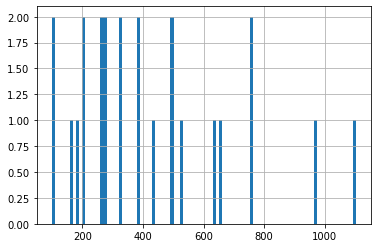

송현동
(22, 18)


count      22.000000
mean      814.869081
std       379.071747
min       484.848485
25%       768.927321
50%       768.930559
75%       768.985516
max      2462.302071
Name: 면적당가격, dtype: float64

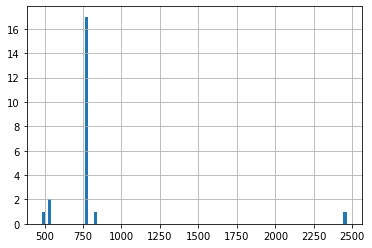

사간동
(23, 18)


count     23.000000
mean     665.307359
std      210.707241
min      210.117647
25%      652.324059
50%      768.929610
75%      768.932829
max      824.175824
Name: 면적당가격, dtype: float64

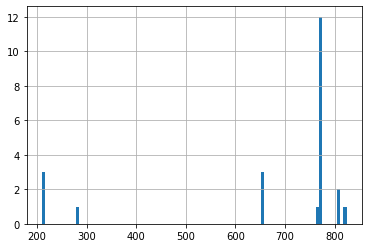

삼선동5가
(22, 18)


count      22.000000
mean      463.110172
std       279.132823
min        90.909091
25%       323.755139
50%       454.201034
75%       578.226372
max      1290.322581
Name: 면적당가격, dtype: float64

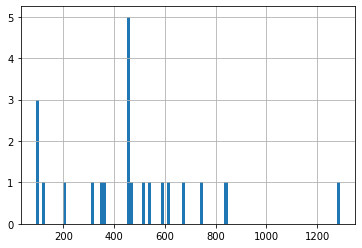

운니동
(15, 18)


count      15.000000
mean      632.452894
std       300.718597
min       292.020202
25%       451.684492
50%       544.401544
75%       609.895480
max      1401.947149
Name: 면적당가격, dtype: float64

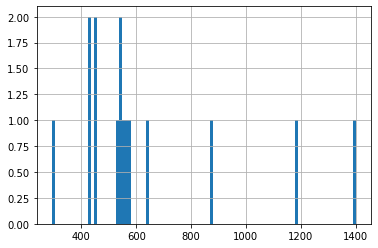

종로2가
(6, 18)


count        6.000000
mean      9274.003540
std       5069.593723
min       2691.677019
25%       6098.743711
50%       8750.008990
75%      13528.296162
max      15116.279070
Name: 면적당가격, dtype: float64

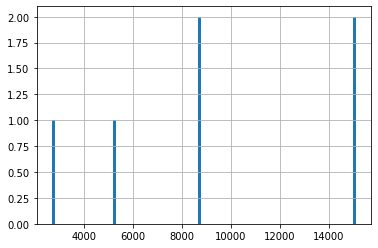

관철동
(7, 18)


count       7.000000
mean     2481.119381
std      1518.261043
min      1010.526316
25%      1518.853953
50%      2426.035503
75%      2644.282971
max      5605.000000
Name: 면적당가격, dtype: float64

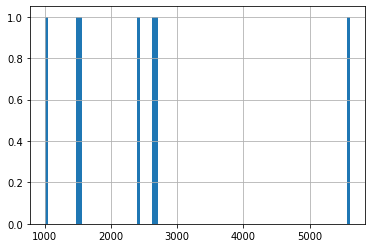

문래동4가
(5, 18)


count      5.000000
mean     564.314461
std      179.507383
min      298.026316
25%      558.718861
50%      565.836299
75%      596.052632
max      802.938197
Name: 면적당가격, dtype: float64

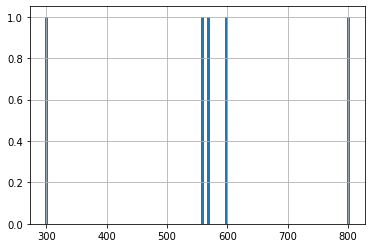

관수동
(15, 18)


count      15.000000
mean     1805.304037
std       946.075199
min       619.578686
25%       780.000000
50%      1734.417344
75%      2517.999720
max      3488.372093
Name: 면적당가격, dtype: float64

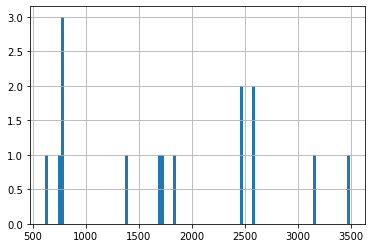

경운동
(6, 18)


count       6.000000
mean     1059.632783
std      1135.190312
min       287.500000
25%       305.464076
50%       362.293023
75%      1989.717046
max      2526.997840
Name: 면적당가격, dtype: float64

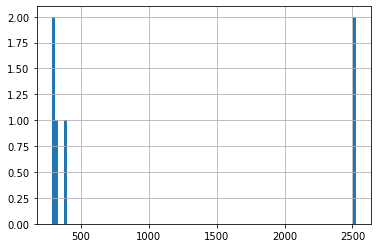

보문동4가
(1, 18)


count       1.000000
mean     1036.363636
std              NaN
min      1036.363636
25%      1036.363636
50%      1036.363636
75%      1036.363636
max      1036.363636
Name: 면적당가격, dtype: float64

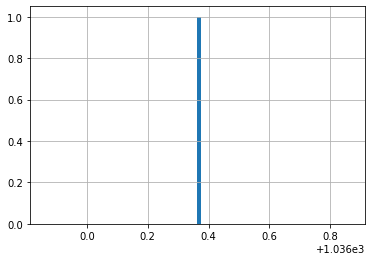

당산동2가
(8, 18)


count      8.000000
mean     275.214580
std      134.121067
min       98.280098
25%      143.027293
50%      328.282828
75%      384.706054
max      410.156250
Name: 면적당가격, dtype: float64

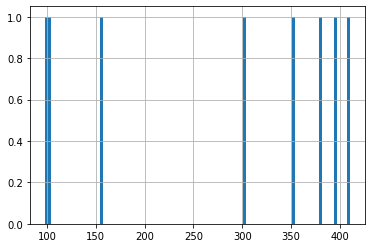

의주로1가
(2, 18)


count      2.000000
mean     917.266187
std       25.435496
min      899.280576
25%      908.273381
50%      917.266187
75%      926.258993
max      935.251799
Name: 면적당가격, dtype: float64

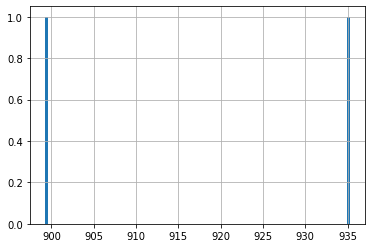

홍파동
(70, 18)


count     70.000000
mean     586.235923
std      144.366489
min      230.879865
25%      537.703287
50%      592.784567
75%      685.896481
max      813.045685
Name: 면적당가격, dtype: float64

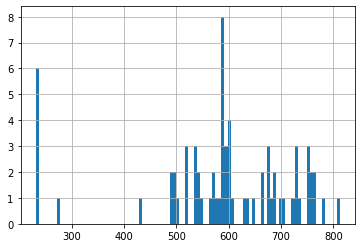

종로4가
(24, 18)


count      24.000000
mean     2119.122074
std       722.902783
min      1039.697543
25%      1537.532055
50%      1999.030261
75%      2627.884745
max      3297.911111
Name: 면적당가격, dtype: float64

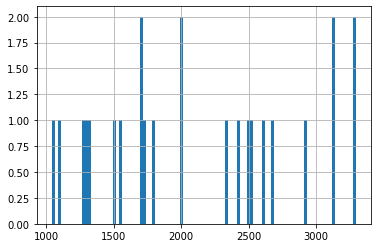

옥천동
(7, 18)


count      7.000000
mean     474.118165
std       76.075423
min      343.927393
25%      440.795160
50%      457.836538
75%      545.096189
max      545.280528
Name: 면적당가격, dtype: float64

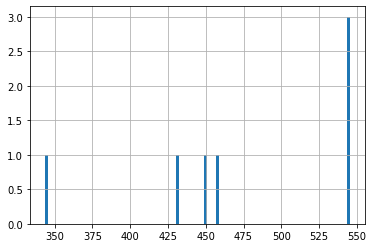

영천동
(19, 18)


count      19.000000
mean      531.638287
std       359.844240
min       108.991826
25%       322.873070
50%       494.000000
75%       645.862561
max      1775.000000
Name: 면적당가격, dtype: float64

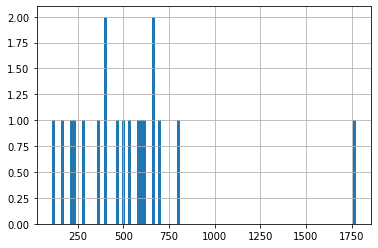

당인동
(10, 18)


count      10.000000
mean      703.123335
std       492.647723
min       199.468762
25%       278.000000
50%       491.256410
75%      1148.631435
max      1516.853933
Name: 면적당가격, dtype: float64

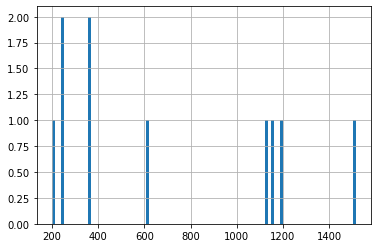

남대문로3가
(4, 18)


count       4.000000
mean     2570.035653
std       638.083582
min      2016.509434
25%      2082.215980
50%      2442.627400
75%      2930.447073
max      3378.378378
Name: 면적당가격, dtype: float64

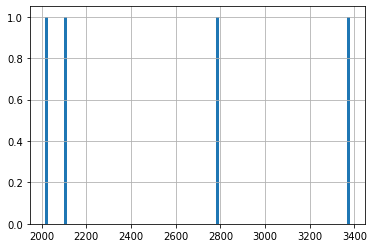

장사동
(29, 18)


count      29.000000
mean     1517.362113
std       851.866594
min       254.470426
25%       878.000000
50%      1509.433962
75%      2457.471264
max      3064.031008
Name: 면적당가격, dtype: float64

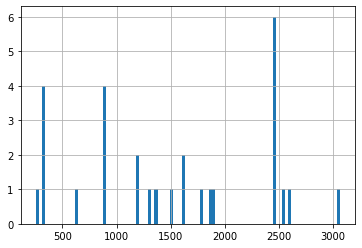

필동1가
(9, 18)


count       9.000000
mean     1175.069050
std      1131.603045
min       303.030303
25%       567.906977
50%       613.214286
75%      1171.496599
max      3647.608696
Name: 면적당가격, dtype: float64

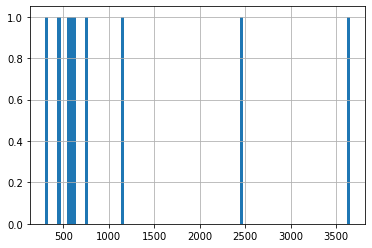

양화동
(3, 18)


count     3.000000
mean     55.673930
std       7.846726
min      46.620047
25%      53.259200
50%      59.898354
75%      60.200871
max      60.503388
Name: 면적당가격, dtype: float64

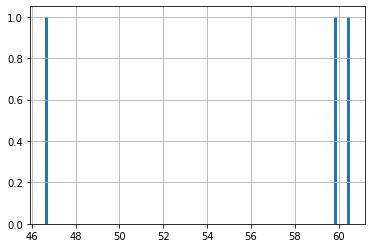

태평로1가
(1, 18)


count       1.0
mean     1000.0
std         NaN
min      1000.0
25%      1000.0
50%      1000.0
75%      1000.0
max      1000.0
Name: 면적당가격, dtype: float64

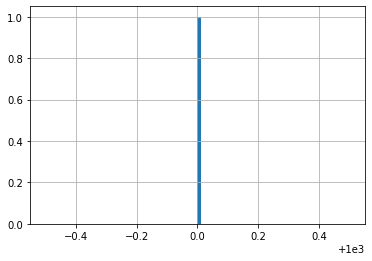

궁정동
(6, 18)


count       6.000000
mean     1027.876835
std        89.057052
min       862.068966
25%      1012.005319
50%      1057.017857
75%      1087.138558
max      1096.976401
Name: 면적당가격, dtype: float64

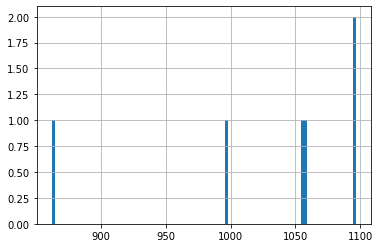

원서동
(12, 18)


count      12.000000
mean      731.208461
std       324.453503
min       355.573506
25%       498.040211
50%       630.253623
75%       937.288623
max      1464.572018
Name: 면적당가격, dtype: float64

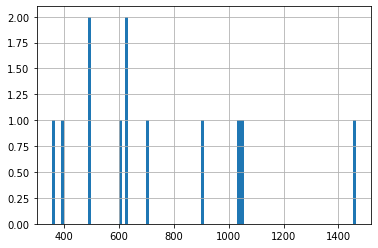

남학동
(4, 18)


count       4.000000
mean      763.295012
std       222.072045
min       582.750000
25%       582.791159
50%       716.402439
75%       896.906292
max      1037.625169
Name: 면적당가격, dtype: float64

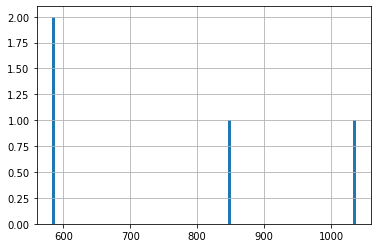

서린동
(4, 18)


count       4.000000
mean     2324.917155
std       839.291694
min      1562.500000
25%      1652.565947
50%      2226.142449
75%      2898.493658
max      3284.883721
Name: 면적당가격, dtype: float64

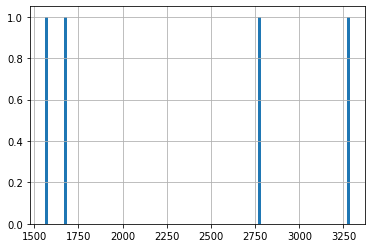

무교동
(2, 18)


count       2.000000
mean     2034.615385
std       658.153235
min      1569.230769
25%      1801.923077
50%      2034.615385
75%      2267.307692
max      2500.000000
Name: 면적당가격, dtype: float64

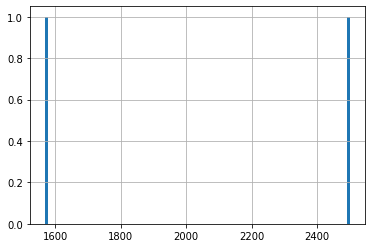

청암동
(5, 18)


count      5.000000
mean     530.709290
std       83.333630
min      391.307692
25%      522.249051
50%      554.359526
75%      592.812500
max      592.817680
Name: 면적당가격, dtype: float64

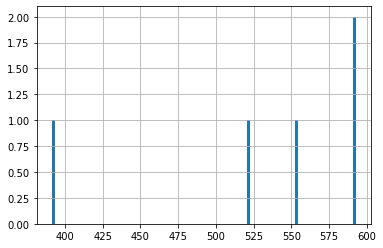

태평로2가
(1, 18)


count       1.0
mean     6800.0
std         NaN
min      6800.0
25%      6800.0
50%      6800.0
75%      6800.0
max      6800.0
Name: 면적당가격, dtype: float64

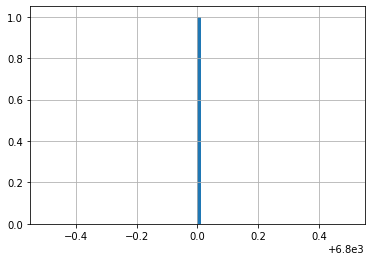

세종로
(2, 18)


count       2.0
mean     7000.0
std         0.0
min      7000.0
25%      7000.0
50%      7000.0
75%      7000.0
max      7000.0
Name: 면적당가격, dtype: float64

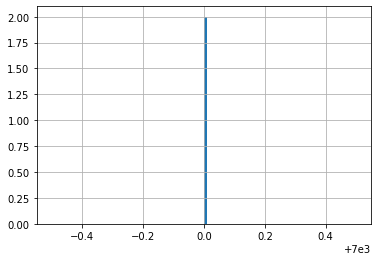

<Figure size 432x288 with 0 Axes>

In [100]:
for dong in concat_df['동'].unique():
    dong_df = concat_df[concat_df['동'] == dong]
    print(dong)
    print(dong_df.shape)
    display(dong_df['면적당가격'].describe())
    dong_df['면적당가격'].hist(bins=100)
    plt.show()
    plt.clf()

In [108]:
idx_to_drop = []
for dong in tqdm(concat_df['동'].unique()):
    dong_df = concat_df[concat_df['동'] == dong]
    q1 = dong_df['면적당가격'].quantile(0.25)
    q3 = dong_df['면적당가격'].quantile(0.75)
    iqr = q3 - q1
    outlier_step = 1.5 * iqr
    
    to_drop_df = dong_df[(dong_df['면적당가격'] < q1 - outlier_step)|(dong_df['면적당가격'] > q3 + outlier_step)]
    [idx_to_drop.append(idx) for idx in to_drop_df.index]

100%|███████████████████████████████████████████████████████████████████████████████| 458/458 [00:02<00:00, 159.94it/s]


In [109]:
len(idx_to_drop)

7884

In [169]:
cat_cols.remove('동')

In [170]:
idx_to_drop = []
for col in cat_cols:
    for dong in tqdm(concat_df[col].unique()):
        dong_df = concat_df[concat_df[col] == dong]
        q1 = dong_df['면적당가격'].quantile(0.25)
        q3 = dong_df['면적당가격'].quantile(0.75)
        iqr = q3 - q1
        outlier_step = 1.5 * iqr

        to_drop_df = dong_df[(dong_df['면적당가격'] < q1 - outlier_step)|(dong_df['면적당가격'] > q3 + outlier_step)]
        [idx_to_drop.append(idx) for idx in to_drop_df.index]

100%|███████████████████████████████████████████████████████████████████████████████| 358/358 [00:02<00:00, 153.48it/s]


In [171]:
len(set(idx_to_drop))

18705

In [172]:
concat_df.shape

(110710, 18)

In [173]:
no_outliers_df = concat_df.drop(idx_to_drop)
print(no_outliers_df.shape)

(92005, 18)


In [174]:
training_data_df = no_outliers_df.drop(columns=cat_cols + ['계약면적(㎡)', '거래금액(만원)'])
print(training_data_df.shape)
training_data_df.head()

(92005, 10)


,time_linear,month_cos,month_sin,지목_mapped,용도지역_mapped,도로조건_mapped,지분구분_mapped,구_mapped,면적당가격,동2_mapped
0,0.000000,1.0,0.0,0,0,0,0,0,81.676750,0
1,0.002740,1.0,0.0,1,1,1,1,1,55.076923,1
2,0.002740,1.0,0.0,0,1,0,0,2,680.778032,2
3,0.002740,1.0,0.0,2,2,0,0,3,78.684211,3
4,0.005479,1.0,0.0,1,1,1,1,1,55.208333,1


In [175]:
training_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92005 entries, 0 to 110709
Data columns (total 10 columns):
time_linear    92005 non-null float64
month_cos      92005 non-null float64
month_sin      92005 non-null float64
지목_mapped      92005 non-null int64
용도지역_mapped    92005 non-null int64
도로조건_mapped    92005 non-null int64
지분구분_mapped    92005 non-null int64
구_mapped       92005 non-null int64
면적당가격          92005 non-null float64
동2_mapped      92005 non-null int64
dtypes: float64(4), int64(6)
memory usage: 7.7 MB


In [76]:
usage_map_df = pd.read_csv(basedir + '용도지역_map.csv')
usage_map_df

,category,map
0,제2종일반주거지역,0
1,제3종일반주거지역,1
2,개발제한구역,2
3,제1종일반주거지역,3
4,자연녹지지역,4
5,준주거지역,5
6,일반상업지역,6
7,기타,7
8,준공업지역,8
9,전용주거지역,9


In [176]:
cat_cols_mapped = [col+'_mapped' for col in cat_cols]
cat_cols_mapped

['지목_mapped',
 '용도지역_mapped',
 '도로조건_mapped',
 '지분구분_mapped',
 '구_mapped',
 '동2_mapped']

In [177]:
test_data_df = training_data_df.sample(frac=0.2)
train_data_df = training_data_df.drop(test_data_df.index)
val_data_df = train_data_df.sample(frac=0.2)
train_data_df = train_data_df.drop(val_data_df.index)

In [178]:
target_col = '면적당가격'
x_test = test_data_df.drop(columns=target_col)
y_test = test_data_df[target_col]
x_train = train_data_df.drop(columns=target_col)
y_train = train_data_df[target_col]
x_val = val_data_df.drop(columns=target_col)
y_val = val_data_df[target_col]
print(x_test.shape)
print(x_train.shape)
print(x_val.shape)

(18401, 9)
(58883, 9)
(14721, 9)


In [179]:
y_train.describe()

count    58883.000000
mean       266.323390
std        194.327795
min          0.011494
25%        106.060606
50%        242.424242
75%        378.766852
max       1059.001513
Name: 면적당가격, dtype: float64

<AxesSubplot:>

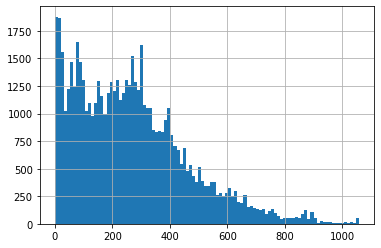

In [180]:
y_train.hist(bins=100)

In [181]:
import lightgbm as lgb

In [188]:
params = {
    'objective':'huber',
    'learning_rate': 0.03,
    'num_leaves': 31,
    'seed': 42,
    'max_depth': -1,
    'lambda_l2':0,
    'metric':'rmse'
}

In [189]:
train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols_mapped)
valid_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols_mapped)

In [190]:
# without 토지면적 log
num_rounds = 500000

bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[valid_dataset], early_stopping_rounds=100, verbose_eval=50)

c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 58883, number of used features: 9
[LightGBM] [Info] Start training from score 266.323390
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 194.356
[100]	valid_0's rmse: 193.783
[150]	valid_0's rmse: 193.212
[200]	valid_0's rmse: 192.643
[250]	valid_0's rmse: 192.08
[300]	valid_0's rmse: 191.523
[350]	valid_0's rmse: 190.969
[400]	valid_0's rmse: 190.418
[450]	valid_0's rmse: 189.871
[500]	valid_0's rmse: 189.325
[550]	valid_0's rmse: 188.781
[600]	valid_0's rmse: 188.241
[650]	valid_0's rmse: 187.706
[700]	valid_0's rmse: 187.171
[750]	valid_0's rmse: 186.641
[800]	valid_0's rmse: 186.113
[850]	valid_0's rmse: 185.611
[900]	valid_0's rmse:

[12500]	valid_0's rmse: 129.844
[12550]	valid_0's rmse: 129.769
[12600]	valid_0's rmse: 129.694
[12650]	valid_0's rmse: 129.617
[12700]	valid_0's rmse: 129.543
[12750]	valid_0's rmse: 129.469
[12800]	valid_0's rmse: 129.389
[12850]	valid_0's rmse: 129.314
[12900]	valid_0's rmse: 129.237
[12950]	valid_0's rmse: 129.16
[13000]	valid_0's rmse: 129.082
[13050]	valid_0's rmse: 129
[13100]	valid_0's rmse: 128.921
[13150]	valid_0's rmse: 128.843
[13200]	valid_0's rmse: 128.77
[13250]	valid_0's rmse: 128.695
[13300]	valid_0's rmse: 128.623
[13350]	valid_0's rmse: 128.55
[13400]	valid_0's rmse: 128.484
[13450]	valid_0's rmse: 128.414
[13500]	valid_0's rmse: 128.343
[13550]	valid_0's rmse: 128.275
[13600]	valid_0's rmse: 128.207
[13650]	valid_0's rmse: 128.143
[13700]	valid_0's rmse: 128.078
[13750]	valid_0's rmse: 128.01
[13800]	valid_0's rmse: 127.941
[13850]	valid_0's rmse: 127.877
[13900]	valid_0's rmse: 127.811
[13950]	valid_0's rmse: 127.743
[14000]	valid_0's rmse: 127.675
[14050]	valid_0'

[25350]	valid_0's rmse: 118.553
[25400]	valid_0's rmse: 118.531
[25450]	valid_0's rmse: 118.509
[25500]	valid_0's rmse: 118.487
[25550]	valid_0's rmse: 118.466
[25600]	valid_0's rmse: 118.446
[25650]	valid_0's rmse: 118.423
[25700]	valid_0's rmse: 118.402
[25750]	valid_0's rmse: 118.382
[25800]	valid_0's rmse: 118.362
[25850]	valid_0's rmse: 118.342
[25900]	valid_0's rmse: 118.322
[25950]	valid_0's rmse: 118.302
[26000]	valid_0's rmse: 118.283
[26050]	valid_0's rmse: 118.264
[26100]	valid_0's rmse: 118.244
[26150]	valid_0's rmse: 118.225
[26200]	valid_0's rmse: 118.204
[26250]	valid_0's rmse: 118.186
[26300]	valid_0's rmse: 118.168
[26350]	valid_0's rmse: 118.149
[26400]	valid_0's rmse: 118.13
[26450]	valid_0's rmse: 118.113
[26500]	valid_0's rmse: 118.095
[26550]	valid_0's rmse: 118.076
[26600]	valid_0's rmse: 118.058
[26650]	valid_0's rmse: 118.04
[26700]	valid_0's rmse: 118.02
[26750]	valid_0's rmse: 118.002
[26800]	valid_0's rmse: 117.983
[26850]	valid_0's rmse: 117.962
[26900]	val

[38300]	valid_0's rmse: 115.498
[38350]	valid_0's rmse: 115.492
[38400]	valid_0's rmse: 115.486
[38450]	valid_0's rmse: 115.479
[38500]	valid_0's rmse: 115.473
[38550]	valid_0's rmse: 115.466
[38600]	valid_0's rmse: 115.459
[38650]	valid_0's rmse: 115.453
[38700]	valid_0's rmse: 115.448
[38750]	valid_0's rmse: 115.442
[38800]	valid_0's rmse: 115.435
[38850]	valid_0's rmse: 115.428
[38900]	valid_0's rmse: 115.423
[38950]	valid_0's rmse: 115.418
[39000]	valid_0's rmse: 115.412
[39050]	valid_0's rmse: 115.407
[39100]	valid_0's rmse: 115.401
[39150]	valid_0's rmse: 115.397
[39200]	valid_0's rmse: 115.391
[39250]	valid_0's rmse: 115.386
[39300]	valid_0's rmse: 115.381
[39350]	valid_0's rmse: 115.376
[39400]	valid_0's rmse: 115.372
[39450]	valid_0's rmse: 115.367
[39500]	valid_0's rmse: 115.363
[39550]	valid_0's rmse: 115.357
[39600]	valid_0's rmse: 115.353
[39650]	valid_0's rmse: 115.349
[39700]	valid_0's rmse: 115.345
[39750]	valid_0's rmse: 115.34
[39800]	valid_0's rmse: 115.336
[39850]	v

[51250]	valid_0's rmse: 114.222
[51300]	valid_0's rmse: 114.219
[51350]	valid_0's rmse: 114.215
[51400]	valid_0's rmse: 114.212
[51450]	valid_0's rmse: 114.209
[51500]	valid_0's rmse: 114.206
[51550]	valid_0's rmse: 114.203
[51600]	valid_0's rmse: 114.2
[51650]	valid_0's rmse: 114.197
[51700]	valid_0's rmse: 114.195
[51750]	valid_0's rmse: 114.192
[51800]	valid_0's rmse: 114.19
[51850]	valid_0's rmse: 114.187
[51900]	valid_0's rmse: 114.184
[51950]	valid_0's rmse: 114.181
[52000]	valid_0's rmse: 114.179
[52050]	valid_0's rmse: 114.176
[52100]	valid_0's rmse: 114.174
[52150]	valid_0's rmse: 114.171
[52200]	valid_0's rmse: 114.168
[52250]	valid_0's rmse: 114.165
[52300]	valid_0's rmse: 114.162
[52350]	valid_0's rmse: 114.158
[52400]	valid_0's rmse: 114.154
[52450]	valid_0's rmse: 114.149
[52500]	valid_0's rmse: 114.144
[52550]	valid_0's rmse: 114.14
[52600]	valid_0's rmse: 114.136
[52650]	valid_0's rmse: 114.133
[52700]	valid_0's rmse: 114.13
[52750]	valid_0's rmse: 114.127
[52800]	valid

[64200]	valid_0's rmse: 113.315
[64250]	valid_0's rmse: 113.313
[64300]	valid_0's rmse: 113.311
[64350]	valid_0's rmse: 113.31
[64400]	valid_0's rmse: 113.309
[64450]	valid_0's rmse: 113.308
[64500]	valid_0's rmse: 113.307
[64550]	valid_0's rmse: 113.306
[64600]	valid_0's rmse: 113.305
[64650]	valid_0's rmse: 113.304
[64700]	valid_0's rmse: 113.302
[64750]	valid_0's rmse: 113.3
[64800]	valid_0's rmse: 113.299
[64850]	valid_0's rmse: 113.297
[64900]	valid_0's rmse: 113.293
[64950]	valid_0's rmse: 113.292
[65000]	valid_0's rmse: 113.289
[65050]	valid_0's rmse: 113.286
[65100]	valid_0's rmse: 113.283
[65150]	valid_0's rmse: 113.281
[65200]	valid_0's rmse: 113.278
[65250]	valid_0's rmse: 113.276
[65300]	valid_0's rmse: 113.274
[65350]	valid_0's rmse: 113.273
[65400]	valid_0's rmse: 113.271
[65450]	valid_0's rmse: 113.268
[65500]	valid_0's rmse: 113.264
[65550]	valid_0's rmse: 113.261
[65600]	valid_0's rmse: 113.258
[65650]	valid_0's rmse: 113.256
[65700]	valid_0's rmse: 113.253
[65750]	val

[77150]	valid_0's rmse: 112.62
[77200]	valid_0's rmse: 112.617
[77250]	valid_0's rmse: 112.615
[77300]	valid_0's rmse: 112.612
[77350]	valid_0's rmse: 112.609
[77400]	valid_0's rmse: 112.606
[77450]	valid_0's rmse: 112.603
[77500]	valid_0's rmse: 112.6
[77550]	valid_0's rmse: 112.598
[77600]	valid_0's rmse: 112.595
[77650]	valid_0's rmse: 112.592
[77700]	valid_0's rmse: 112.59
[77750]	valid_0's rmse: 112.588
[77800]	valid_0's rmse: 112.585
[77850]	valid_0's rmse: 112.582
[77900]	valid_0's rmse: 112.579
[77950]	valid_0's rmse: 112.577
[78000]	valid_0's rmse: 112.575
[78050]	valid_0's rmse: 112.572
[78100]	valid_0's rmse: 112.571
[78150]	valid_0's rmse: 112.569
[78200]	valid_0's rmse: 112.566
[78250]	valid_0's rmse: 112.565
[78300]	valid_0's rmse: 112.564
[78350]	valid_0's rmse: 112.562
[78400]	valid_0's rmse: 112.56
[78450]	valid_0's rmse: 112.558
[78500]	valid_0's rmse: 112.556
[78550]	valid_0's rmse: 112.553
[78600]	valid_0's rmse: 112.549
[78650]	valid_0's rmse: 112.546
[78700]	valid

[90200]	valid_0's rmse: 112.122
[90250]	valid_0's rmse: 112.121
[90300]	valid_0's rmse: 112.12
[90350]	valid_0's rmse: 112.119
[90400]	valid_0's rmse: 112.117
[90450]	valid_0's rmse: 112.116
[90500]	valid_0's rmse: 112.114
[90550]	valid_0's rmse: 112.112
[90600]	valid_0's rmse: 112.111
[90650]	valid_0's rmse: 112.109
[90700]	valid_0's rmse: 112.108
[90750]	valid_0's rmse: 112.106
[90800]	valid_0's rmse: 112.104
[90850]	valid_0's rmse: 112.102
[90900]	valid_0's rmse: 112.1
[90950]	valid_0's rmse: 112.098
[91000]	valid_0's rmse: 112.096
[91050]	valid_0's rmse: 112.096
[91100]	valid_0's rmse: 112.094
[91150]	valid_0's rmse: 112.092
[91200]	valid_0's rmse: 112.091
[91250]	valid_0's rmse: 112.089
[91300]	valid_0's rmse: 112.087
[91350]	valid_0's rmse: 112.085
[91400]	valid_0's rmse: 112.083
[91450]	valid_0's rmse: 112.082
[91500]	valid_0's rmse: 112.081
[91550]	valid_0's rmse: 112.079
[91600]	valid_0's rmse: 112.078
[91650]	valid_0's rmse: 112.076
[91700]	valid_0's rmse: 112.074
[91750]	val

[103050]	valid_0's rmse: 111.685
[103100]	valid_0's rmse: 111.683
[103150]	valid_0's rmse: 111.682
[103200]	valid_0's rmse: 111.681
[103250]	valid_0's rmse: 111.679
[103300]	valid_0's rmse: 111.678
[103350]	valid_0's rmse: 111.677
[103400]	valid_0's rmse: 111.676
[103450]	valid_0's rmse: 111.674
[103500]	valid_0's rmse: 111.673
[103550]	valid_0's rmse: 111.671
[103600]	valid_0's rmse: 111.669
[103650]	valid_0's rmse: 111.667
[103700]	valid_0's rmse: 111.665
[103750]	valid_0's rmse: 111.663
[103800]	valid_0's rmse: 111.661
[103850]	valid_0's rmse: 111.659
[103900]	valid_0's rmse: 111.657
[103950]	valid_0's rmse: 111.655
[104000]	valid_0's rmse: 111.654
[104050]	valid_0's rmse: 111.652
[104100]	valid_0's rmse: 111.651
[104150]	valid_0's rmse: 111.65
[104200]	valid_0's rmse: 111.649
[104250]	valid_0's rmse: 111.648
[104300]	valid_0's rmse: 111.646
[104350]	valid_0's rmse: 111.644
[104400]	valid_0's rmse: 111.642
[104450]	valid_0's rmse: 111.64
[104500]	valid_0's rmse: 111.639
[104550]	val

[115550]	valid_0's rmse: 111.245
[115600]	valid_0's rmse: 111.243
[115650]	valid_0's rmse: 111.24
[115700]	valid_0's rmse: 111.238
[115750]	valid_0's rmse: 111.236
[115800]	valid_0's rmse: 111.235
[115850]	valid_0's rmse: 111.233
[115900]	valid_0's rmse: 111.231
[115950]	valid_0's rmse: 111.229
[116000]	valid_0's rmse: 111.227
[116050]	valid_0's rmse: 111.226
[116100]	valid_0's rmse: 111.224
[116150]	valid_0's rmse: 111.222
[116200]	valid_0's rmse: 111.221
[116250]	valid_0's rmse: 111.219
[116300]	valid_0's rmse: 111.218
[116350]	valid_0's rmse: 111.217
[116400]	valid_0's rmse: 111.215
[116450]	valid_0's rmse: 111.214
[116500]	valid_0's rmse: 111.213
[116550]	valid_0's rmse: 111.212
[116600]	valid_0's rmse: 111.21
[116650]	valid_0's rmse: 111.209
[116700]	valid_0's rmse: 111.208
[116750]	valid_0's rmse: 111.207
[116800]	valid_0's rmse: 111.205
[116850]	valid_0's rmse: 111.203
[116900]	valid_0's rmse: 111.202
[116950]	valid_0's rmse: 111.2
[117000]	valid_0's rmse: 111.198
[117050]	valid

[128200]	valid_0's rmse: 110.85
[128250]	valid_0's rmse: 110.848
[128300]	valid_0's rmse: 110.846
[128350]	valid_0's rmse: 110.844
[128400]	valid_0's rmse: 110.842
[128450]	valid_0's rmse: 110.84
[128500]	valid_0's rmse: 110.838
[128550]	valid_0's rmse: 110.837
[128600]	valid_0's rmse: 110.835
[128650]	valid_0's rmse: 110.833
[128700]	valid_0's rmse: 110.831
[128750]	valid_0's rmse: 110.829
[128800]	valid_0's rmse: 110.827
[128850]	valid_0's rmse: 110.826
[128900]	valid_0's rmse: 110.824
[128950]	valid_0's rmse: 110.822
[129000]	valid_0's rmse: 110.821
[129050]	valid_0's rmse: 110.819
[129100]	valid_0's rmse: 110.817
[129150]	valid_0's rmse: 110.815
[129200]	valid_0's rmse: 110.813
[129250]	valid_0's rmse: 110.811
[129300]	valid_0's rmse: 110.809
[129350]	valid_0's rmse: 110.806
[129400]	valid_0's rmse: 110.803
[129450]	valid_0's rmse: 110.802
[129500]	valid_0's rmse: 110.801
[129550]	valid_0's rmse: 110.799
[129600]	valid_0's rmse: 110.797
[129650]	valid_0's rmse: 110.795
[129700]	val

[140700]	valid_0's rmse: 110.552
[140750]	valid_0's rmse: 110.551
[140800]	valid_0's rmse: 110.549
[140850]	valid_0's rmse: 110.547
[140900]	valid_0's rmse: 110.545
[140950]	valid_0's rmse: 110.542
[141000]	valid_0's rmse: 110.54
[141050]	valid_0's rmse: 110.539
[141100]	valid_0's rmse: 110.537
[141150]	valid_0's rmse: 110.535
[141200]	valid_0's rmse: 110.533
[141250]	valid_0's rmse: 110.532
[141300]	valid_0's rmse: 110.53
[141350]	valid_0's rmse: 110.529
[141400]	valid_0's rmse: 110.527
[141450]	valid_0's rmse: 110.526
[141500]	valid_0's rmse: 110.524
[141550]	valid_0's rmse: 110.522
[141600]	valid_0's rmse: 110.521
[141650]	valid_0's rmse: 110.52
[141700]	valid_0's rmse: 110.518
[141750]	valid_0's rmse: 110.517
[141800]	valid_0's rmse: 110.516
[141850]	valid_0's rmse: 110.515
[141900]	valid_0's rmse: 110.513
[141950]	valid_0's rmse: 110.512
[142000]	valid_0's rmse: 110.511
[142050]	valid_0's rmse: 110.51
[142100]	valid_0's rmse: 110.509
[142150]	valid_0's rmse: 110.508
[142200]	valid

[153150]	valid_0's rmse: 110.165
[153200]	valid_0's rmse: 110.162
[153250]	valid_0's rmse: 110.16
[153300]	valid_0's rmse: 110.158
[153350]	valid_0's rmse: 110.157
[153400]	valid_0's rmse: 110.155
[153450]	valid_0's rmse: 110.154
[153500]	valid_0's rmse: 110.152
[153550]	valid_0's rmse: 110.151
[153600]	valid_0's rmse: 110.149
[153650]	valid_0's rmse: 110.147
[153700]	valid_0's rmse: 110.146
[153750]	valid_0's rmse: 110.144
[153800]	valid_0's rmse: 110.143
[153850]	valid_0's rmse: 110.14
[153900]	valid_0's rmse: 110.139
[153950]	valid_0's rmse: 110.137
[154000]	valid_0's rmse: 110.135
[154050]	valid_0's rmse: 110.133
[154100]	valid_0's rmse: 110.132
[154150]	valid_0's rmse: 110.13
[154200]	valid_0's rmse: 110.129
[154250]	valid_0's rmse: 110.128
[154300]	valid_0's rmse: 110.126
[154350]	valid_0's rmse: 110.124
[154400]	valid_0's rmse: 110.123
[154450]	valid_0's rmse: 110.121
[154500]	valid_0's rmse: 110.12
[154550]	valid_0's rmse: 110.118
[154600]	valid_0's rmse: 110.117
[154650]	valid

In [191]:
preds = bst.predict(x_test, num_iteration=bst.best_iteration)

In [186]:
from sklearn.metrics import mean_squared_error

In [192]:
np.sqrt(mean_squared_error(y_test, preds))

111.43803701678661

In [149]:
compare_df = pd.DataFrame({'y_test':y_test, 'preds':preds})

In [151]:
compare_df.head(50)

,y_test,preds
20492,272.000000,312.612258
82860,210.356455,480.450802
17806,132.075472,127.877057
30145,196.000000,202.839903
3579,284.153846,272.799343
29887,434.482759,267.580670
82692,222.222222,206.633016
75560,454.206532,388.591737
80766,440.000000,452.327151
75680,272.000000,269.498042


In [200]:
compare_df['diff'] = np.absolute(compare_df.iloc[:,0] - compare_df.iloc[:,1])

In [201]:
compare_df.head(50)

,y_test,preds,diff
20492,272.000000,312.612258,40.612258
82860,210.356455,480.450802,270.094347
17806,132.075472,127.877057,4.198415
30145,196.000000,202.839903,6.839903
3579,284.153846,272.799343,11.354504
29887,434.482759,267.580670,166.902089
82692,222.222222,206.633016,15.589206
75560,454.206532,388.591737,65.614796
80766,440.000000,452.327151,12.327151
75680,272.000000,269.498042,2.501958


In [202]:
compare_df['diff'].describe()

count    18385.000000
mean        67.245297
std         75.842198
min          0.000557
25%         14.105262
50%         40.027143
75%         92.974240
max        807.532740
Name: diff, dtype: float64